# Steps
---
1. Data feature gathering
2. Understading data Dristribution
3. Oversampeling data target
4. standarize the data
5. Train model to predict normal or abnormal
6. K-mean clusterin to classifiy the model find types of abnormal
7. Pickel files 


---
# Machine Learning
---

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

In [5]:
dataset_org = pd.read_csv('./dataset/processed_data/slider_all.csv.xz')
dataset_org.head()

,dataset,machine,SNR,machine_id,wavefile,is_normal,T_rms_mean,T_rms_std,T_zcr_mean,T_zcr_std,...,F_mfcc_mean,F_mfcc_std,F_flatness_mean,F_flatness_std,F_bandwidth_mean,F_bandwidth_std,F_contrast_mean,F_contrast_std,F_rolloff_mean,F_rolloff_std
0,0_dB_slider.zip,slider,0,0,slider/id_00/abnormal/00000000.wav,0,0.007860,0.002074,0.102903,0.102903,...,0.802281,0.713340,0.053673,0.026076,2167.104576,229.808004,16.586721,3.283078,4715.355431,904.356103
1,0_dB_slider.zip,slider,0,0,slider/id_00/abnormal/00000001.wav,0,0.008078,0.002118,0.099854,0.099854,...,0.792222,0.819079,0.050359,0.028720,2075.277426,331.266060,16.140419,3.103297,4427.216454,1135.671097
2,0_dB_slider.zip,slider,0,0,slider/id_00/abnormal/00000002.wav,0,0.008086,0.002081,0.097779,0.097779,...,0.754520,0.851026,0.048603,0.028079,2035.549836,383.531527,16.244304,2.986611,4330.945487,1236.717933
3,0_dB_slider.zip,slider,0,0,slider/id_00/abnormal/00000003.wav,0,0.007584,0.002217,0.115414,0.115414,...,0.671063,0.801823,0.068693,0.025997,2124.175475,222.712141,15.834551,3.204681,4717.976238,804.476273
4,0_dB_slider.zip,slider,0,0,slider/id_00/abnormal/00000004.wav,0,0.007901,0.002068,0.106082,0.106082,...,0.803645,0.741051,0.056124,0.026007,2163.299179,224.286498,16.325567,3.181781,4720.746805,883.855629


In [6]:
dataset_org.columns[5:]

Index(['is_normal', 'T_rms_mean', 'T_rms_std', 'T_zcr_mean', 'T_zcr_std',
       'F_mel_mean', 'F_mel_std', 'F_mel_rms_mean', 'F_mel_rms_std',
       'F_mfcc_mean', 'F_mfcc_std', 'F_flatness_mean', 'F_flatness_std',
       'F_bandwidth_mean', 'F_bandwidth_std', 'F_contrast_mean',
       'F_contrast_std', 'F_rolloff_mean', 'F_rolloff_std'],
      dtype='object')

In [7]:
dataset = dataset_org.iloc[:,5:].copy()
dataset.head()

,is_normal,T_rms_mean,T_rms_std,T_zcr_mean,T_zcr_std,F_mel_mean,F_mel_std,F_mel_rms_mean,F_mel_rms_std,F_mfcc_mean,F_mfcc_std,F_flatness_mean,F_flatness_std,F_bandwidth_mean,F_bandwidth_std,F_contrast_mean,F_contrast_std,F_rolloff_mean,F_rolloff_std
0,0,0.007860,0.002074,0.102903,0.102903,0.019743,0.031406,0.004779,0.001395,0.802281,0.713340,0.053673,0.026076,2167.104576,229.808004,16.586721,3.283078,4715.355431,904.356103
1,0,0.008078,0.002118,0.099854,0.099854,0.021287,0.032543,0.004913,0.001418,0.792222,0.819079,0.050359,0.028720,2075.277426,331.266060,16.140419,3.103297,4427.216454,1135.671097
2,0,0.008086,0.002081,0.097779,0.097779,0.021716,0.032256,0.004922,0.001387,0.754520,0.851026,0.048603,0.028079,2035.549836,383.531527,16.244304,2.986611,4330.945487,1236.717933
3,0,0.007584,0.002217,0.115414,0.115414,0.020680,0.029519,0.004609,0.001474,0.671063,0.801823,0.068693,0.025997,2124.175475,222.712141,15.834551,3.204681,4717.976238,804.476273
4,0,0.007901,0.002068,0.106082,0.106082,0.020375,0.031433,0.004804,0.001385,0.803645,0.741051,0.056124,0.026007,2163.299179,224.286498,16.325567,3.181781,4720.746805,883.855629


## Analysis missing data

,Column Name,Missing Count,Missing data %
0,is_normal,0,0.0
1,F_mfcc_std,0,0.0
2,F_rolloff_mean,0,0.0
3,F_contrast_std,0,0.0
4,F_contrast_mean,0,0.0
5,F_bandwidth_std,0,0.0
6,F_bandwidth_mean,0,0.0
7,F_flatness_std,0,0.0
8,F_flatness_mean,0,0.0
9,F_mfcc_mean,0,0.0


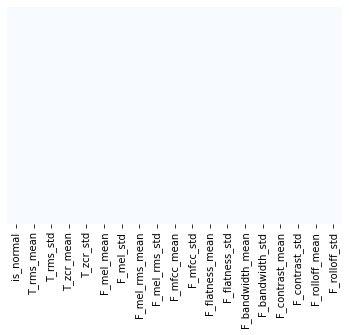

In [8]:
sn.heatmap(dataset.isnull(), yticklabels= False, cbar= False, cmap= 'Blues');

missing_df = dataset.isnull().sum(axis=0).reset_index()
missing_df.columns = ['Column Name', 'Missing Count']

# % of data present out of total
missing_df['Missing data %'] = round(missing_df['Missing Count'] / dataset.shape[0] * 100, 2)
missing_df = missing_df.sort_values('Missing data %',ascending=False).reset_index(drop = True)
missing_df

# Analysing data Distributions and majorities

<ipython-input-9-c84a2cb66e9a>:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(plt_row, plt_col, i + 1)


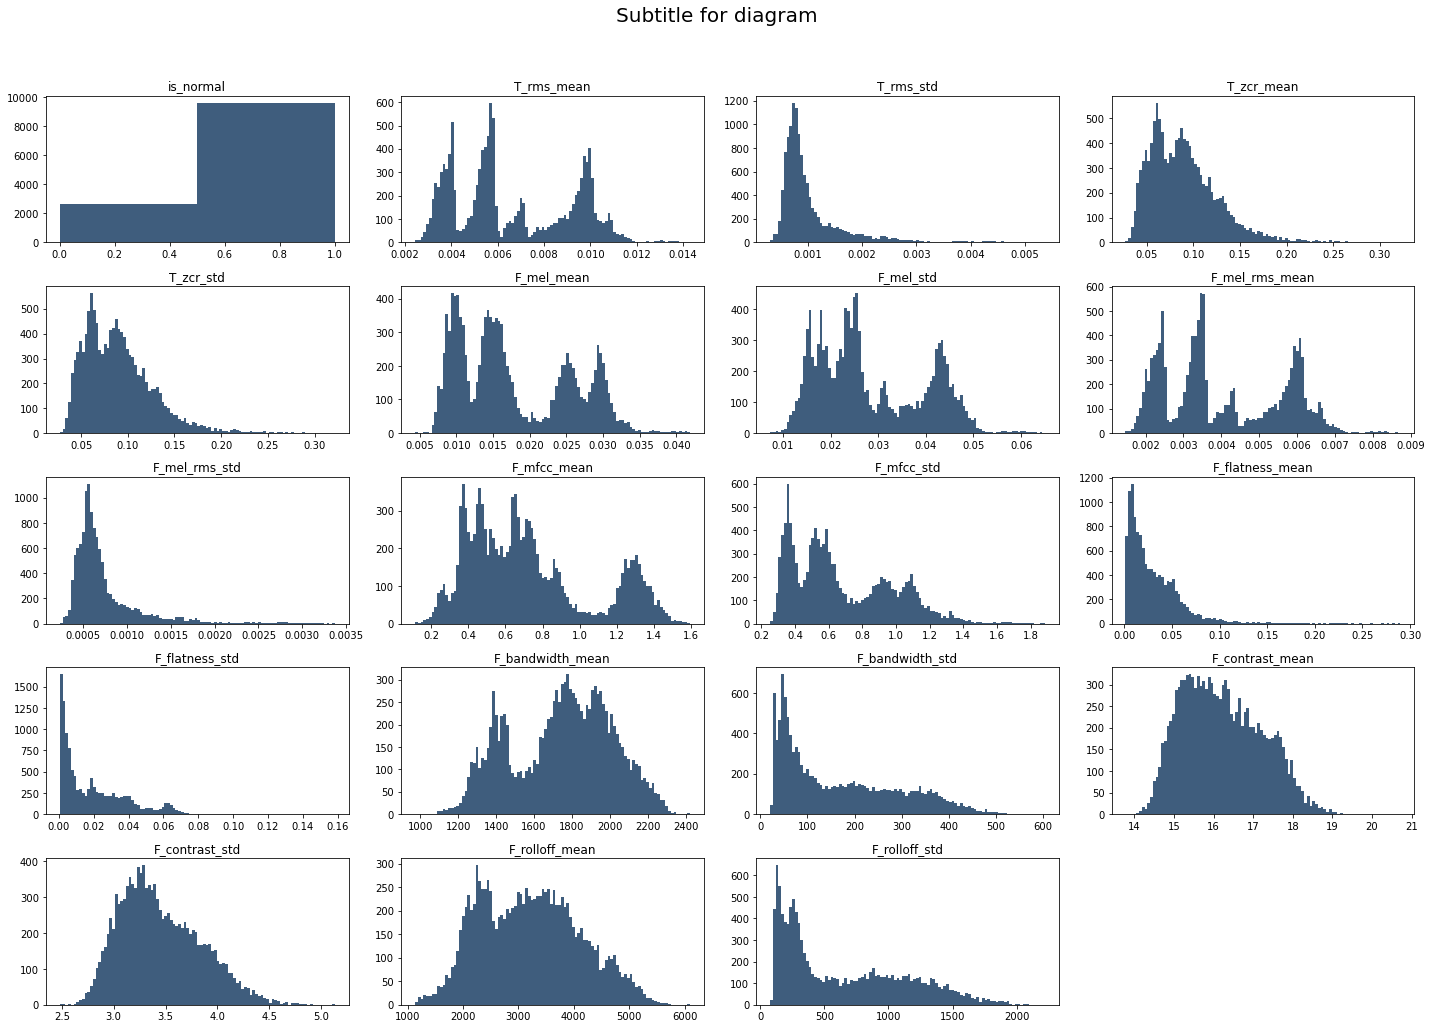

In [9]:
column_headers = dataset.columns
feature_col = dataset.shape[1]
plt_col = 4
plt_row = (len(column_headers)/plt_col) + 1

fig = plt.figure(figsize=(20, 15))
plt.suptitle('Subtitle for diagram', fontsize=20)

for i in range(feature_col):
    plt.subplot(plt_row, plt_col, i + 1)
    f = plt.gca()
    f.set_title(dataset.columns.values[i])

    vals = np.size(dataset.iloc[:, i].unique())
    
    # This help ploting process easier
    if vals >= 100:
        vals = 100
    
    plt.hist(dataset.iloc[:, i], bins=vals, color='#3F5D7D');
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

<ipython-input-7-e54bcefb2c00>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


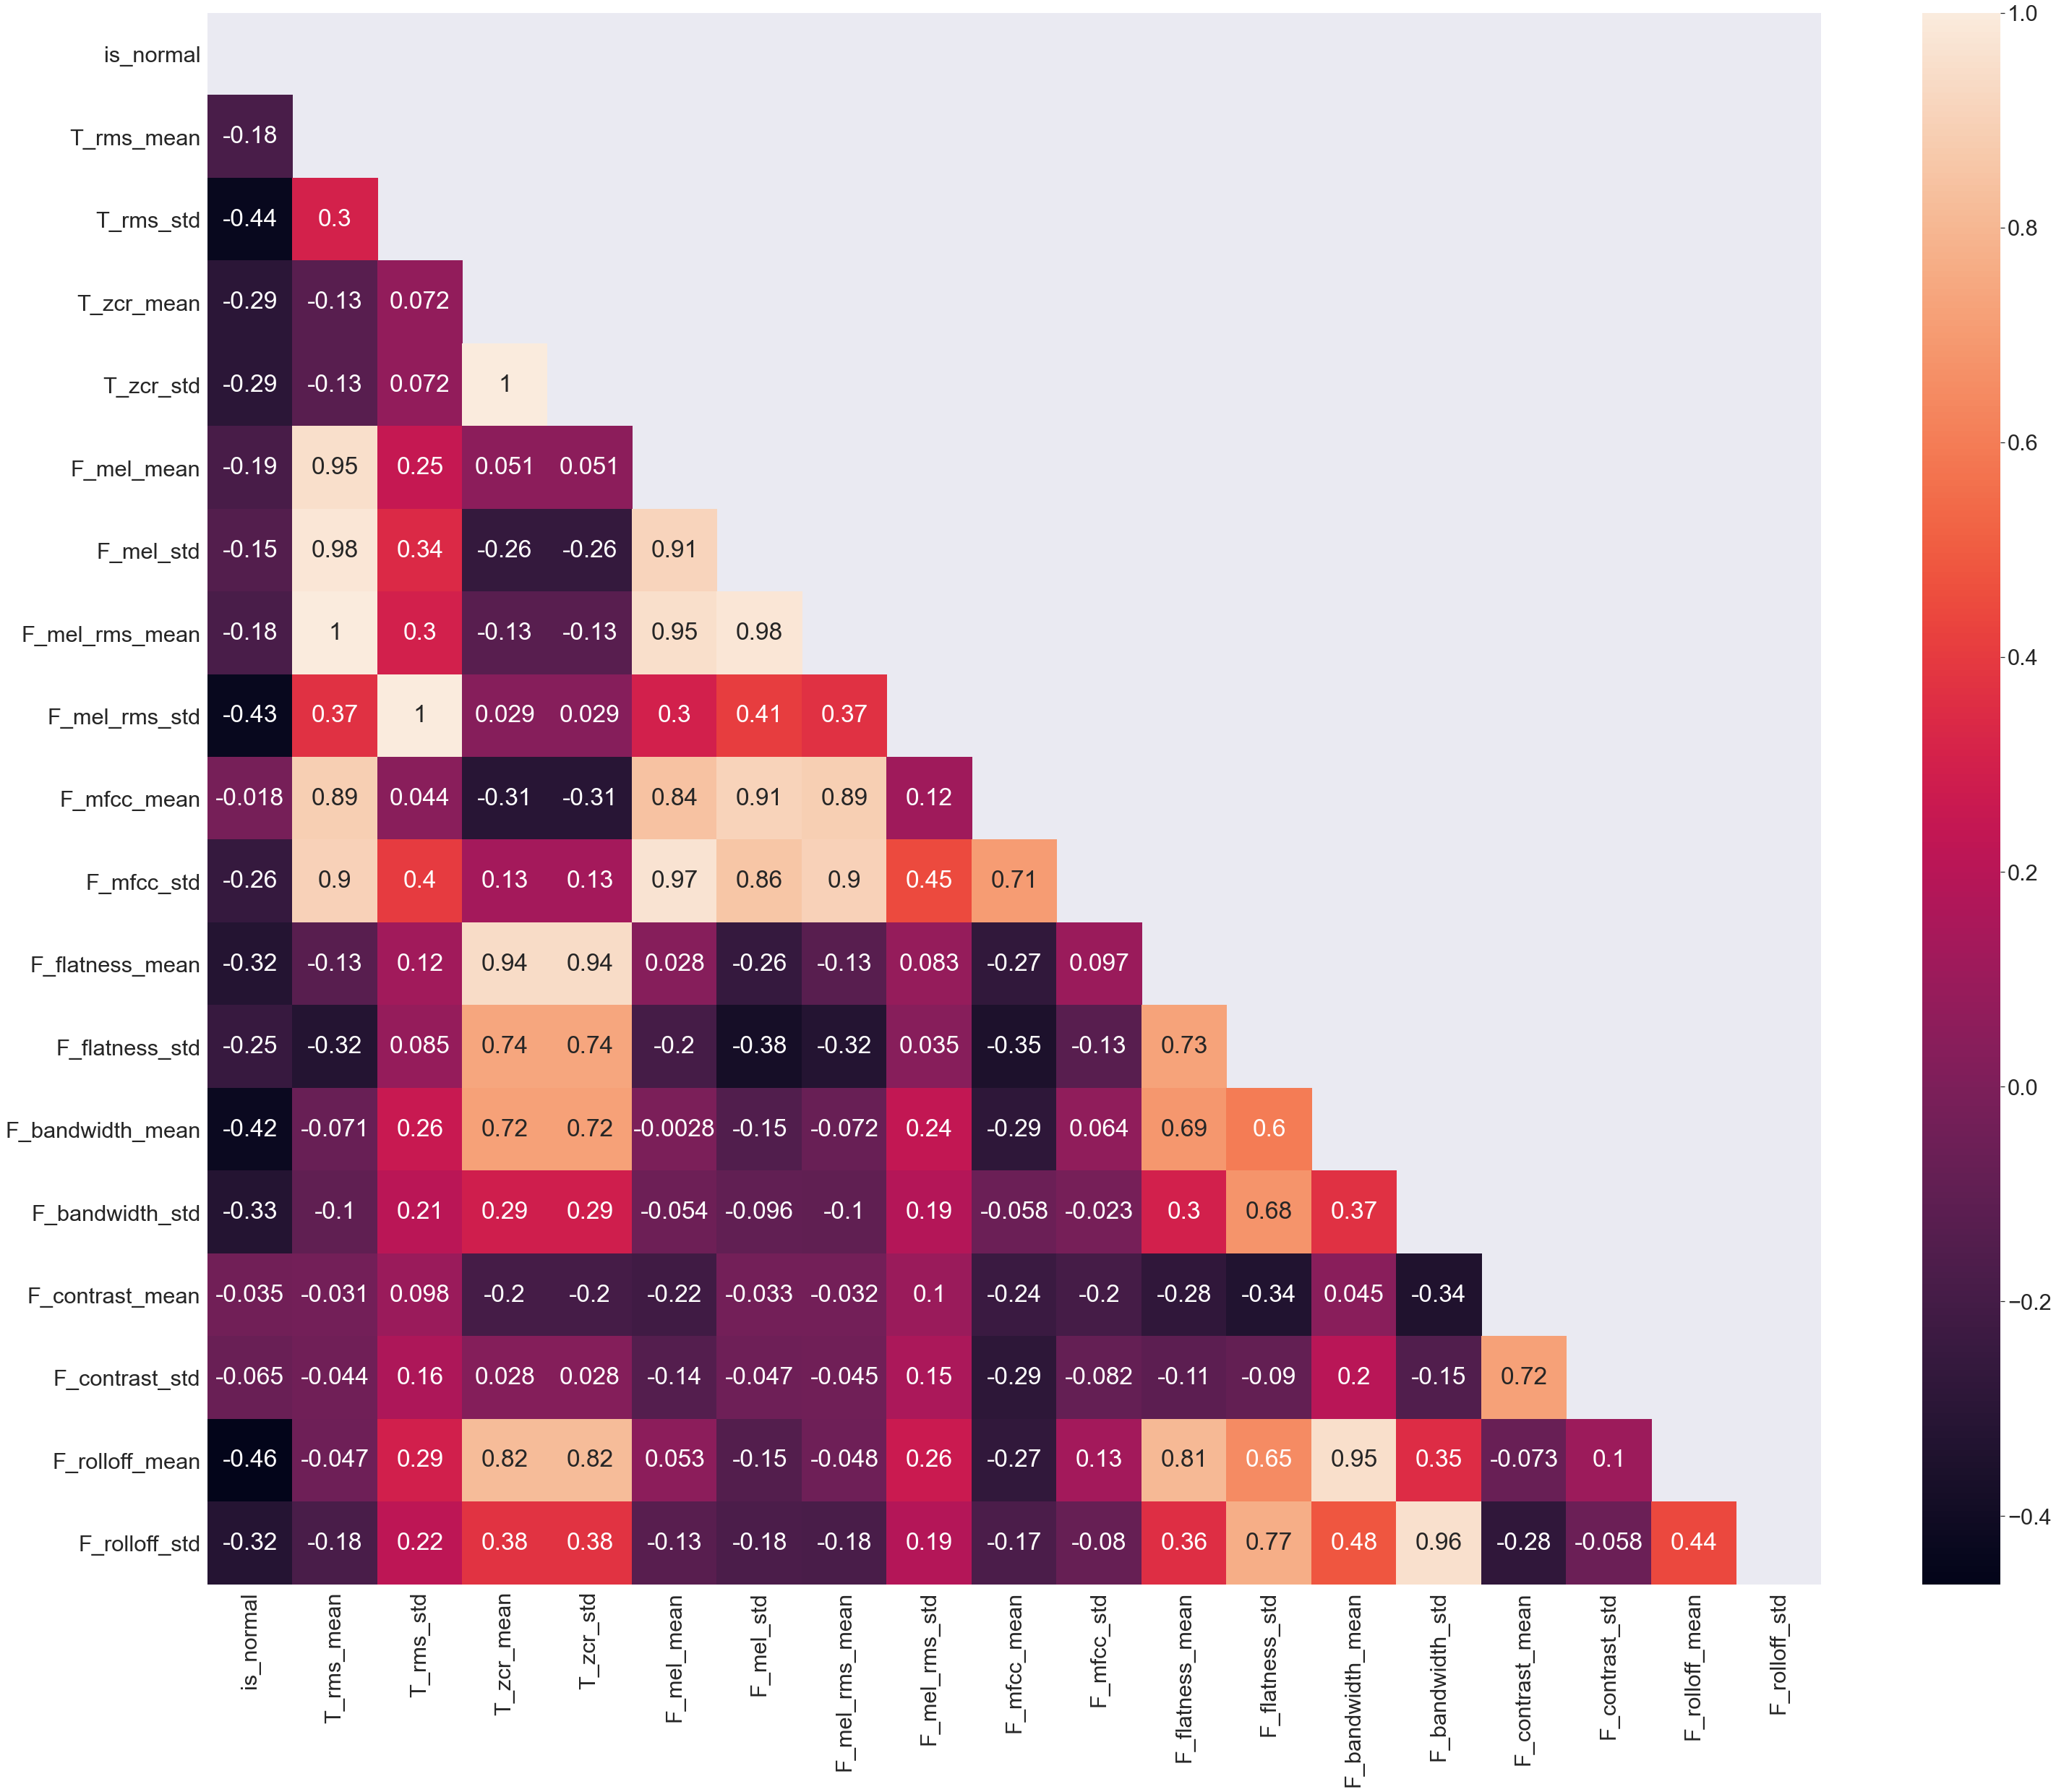

In [7]:
corr = dataset.corr()
sn.set(font_scale=2.8)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (50,40))
sn.heatmap(corr, annot=True,mask=mask);

## Funnel the dataset 

In [10]:
important_col =['is_normal', 'T_rms_mean', 'T_rms_std', 'T_zcr_mean',
                       'F_mel_mean', 'F_mel_std', 'F_mel_rms_mean', 'F_mel_rms_std',
                       'F_mfcc_mean', 'F_mfcc_std', 'F_flatness_mean',
                       'F_bandwidth_mean', 'F_bandwidth_std', 'F_contrast_mean',
                       'F_rolloff_mean', 'F_rolloff_std']
dataset = dataset_org[important_col]

## Split data

In [11]:
X = dataset.drop("is_normal", axis=1)
y = dataset["is_normal"]

from sklearn.model_selection import train_test_split

X_model, X_val, y_model, y_val  = train_test_split(X, y, test_size=0.1, random_state=1) # 0.25 x 0.8 = 0.2

In [12]:
print(X_model.shape)
print(y_model.shape)

(11053, 15)
(11053,)


## Resample over sample

In [13]:
from imblearn.over_sampling import BorderlineSMOTE
X_resample, y_resample = BorderlineSMOTE().fit_resample(X_model, y_model.ravel())

y_resample = pd.DataFrame(y_resample)
X_resample = pd.DataFrame(X_resample)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size=0.2, random_state=1)

## Feature Scaling 

In [14]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
# reassingn index and columns
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values
X_train_scaled = X_train2

X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values
X_test_scaled = X_test2

## Data visualization after feature manupulation

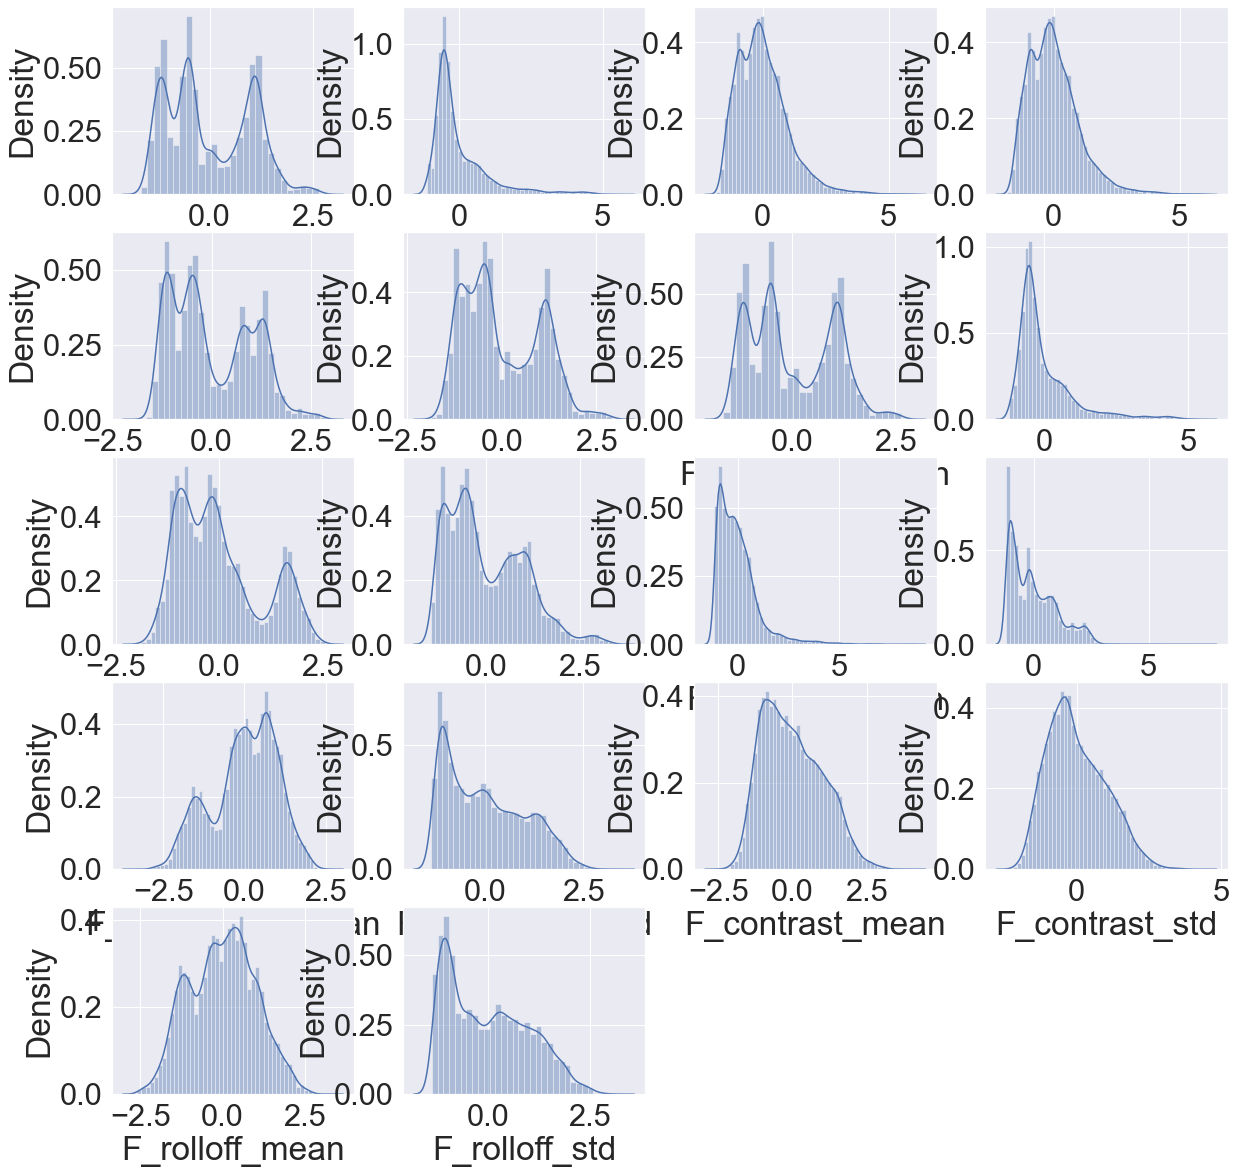

In [13]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

column_headers = X_train_scaled.columns
plt_col = 4
plt_row = int(len(column_headers)/plt_col) + 1 

i = 1
fig, ax = plt.subplots(2, plt_col, figsize = (20, 20))

for column_header in column_headers:
    plt.subplot(plt_row,plt_col,i)
    sn.distplot(X_train_scaled[column_header])
    i = i + 1

In [ ]:
sn.pairplot(dataset, hue="is_normal");

## Standarized the data point

In [ ]:
## Correlation every feature

corr = X_train_scaled.corr()
sn.set(font_scale=2.8)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (50,40))
sn.heatmap(corr, annot=True,mask=mask);

## Function to check perfomance

In [15]:
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, classification_report

def perfomance_check(name: str):
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, pos_label='positive',
                                           average='micro')
    rec = recall_score(y_test, y_pred, pos_label='positive',
                                           average='micro')
    f1 = f1_score(y_test, y_pred, pos_label='positive',
                                           average='micro')

    model_results = pd.DataFrame([[name, acc, prec, rec, f1]],
                   columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
    
    return results.append(model_results, ignore_index = True)

def class_report(y_test, y_pred):

    # This is the script to compare result with prediction
    comparision = pd.DataFrame(columns = ['Result', 'Prediction'])
    
    if type(y_pred) == list:
        comparision.Prediction = y_pred

    else:
        try:
            comparision.Prediction = y_pred.tolist() #pd.Series(y_pred)
        except:
            comparision.Prediction = pd.Series(y_pred.reshape(len(y_pred),))
    comparision.Result = pd.Series(y_test.values.reshape(len(y_test),))
    
    target_names = []
    for i in y.unique():
        target_names.append(f"class {i}")
    y_true = comparision.Result.tolist()
    y_pred = comparision.Prediction.tolist()
    print(classification_report(y_true, y_pred, target_names=target_names))

results = pd.DataFrame(columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

## Logical Regression (Default)

In [16]:
from sklearn.linear_model import LogisticRegression
LR_classifier = LogisticRegression(random_state = 0)
LR_classifier.fit(X_train_scaled, y_train.values.ravel())

y_pred = LR_classifier.predict(X_test_scaled)

results = perfomance_check('Logical Regression (Default)')

class_report(y_test, y_pred)

              precision    recall  f1-score   support

     class 0       0.75      0.83      0.79      1736
     class 1       0.81      0.73      0.77      1725

    accuracy                           0.78      3461
   macro avg       0.78      0.78      0.78      3461
weighted avg       0.78      0.78      0.78      3461



## Logical Regression

In [16]:
from sklearn.linear_model import LogisticRegression
LR_classifier = LogisticRegression(random_state = 0, penalty = 'l1', solver='saga')
LR_classifier.fit(X_train_scaled, y_train.values.ravel())

y_pred = LR_classifier.predict(X_test_scaled)

results = perfomance_check('Logical Regression (Lasso)')

class_report(y_test, y_pred)

              precision    recall  f1-score   support

     class 0       0.76      0.84      0.80      1736
     class 1       0.82      0.74      0.78      1725

    accuracy                           0.79      3461
   macro avg       0.79      0.79      0.79      3461
weighted avg       0.79      0.79      0.79      3461



## KNN (K-Nearest Neighbours)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
no_neighbor = 5
for i in range(2,no_neighbor+1):
    KNN_classifier = KNeighborsClassifier(n_neighbors = i, metric = 'minkowski', p = 2)
    KNN_classifier.fit(X_train_scaled, y_train.values.ravel())

    y_pred = KNN_classifier.predict(X_test_scaled)

    results = perfomance_check(f'K-Nearest Neighbours {i}')
    
    class_report(y_test, y_pred)

              precision    recall  f1-score   support

     class 0       0.89      0.99      0.94      1736
     class 1       0.99      0.88      0.93      1725

    accuracy                           0.94      3461
   macro avg       0.94      0.94      0.94      3461
weighted avg       0.94      0.94      0.94      3461

              precision    recall  f1-score   support

     class 0       0.92      0.98      0.95      1736
     class 1       0.98      0.92      0.95      1725

    accuracy                           0.95      3461
   macro avg       0.95      0.95      0.95      3461
weighted avg       0.95      0.95      0.95      3461

              precision    recall  f1-score   support

     class 0       0.89      0.99      0.94      1736
     class 1       0.99      0.88      0.93      1725

    accuracy                           0.93      3461
   macro avg       0.94      0.93      0.93      3461
weighted avg       0.94      0.93      0.93      3461

              preci

## SVM

from sklearn.svm import SVC
SVML_classifier = SVC(random_state = 0, kernel = 'linear')
SVML_classifier.fit(X_train_scaled, y_train.values.ravel())

y_pred = SVML_classifier.predict(X_test_scaled)

results = perfomance_check('SVM (Linear)')

class_report(y_pred)

## Kernal SVM

In [18]:
from sklearn.svm import SVC
K_SVM_classifier = SVC(random_state=0, kernel = 'rbf')
K_SVM_classifier.fit(X_train_scaled, y_train.values.ravel())

y_pred = K_SVM_classifier.predict(X_test_scaled)

results = perfomance_check('SVM (RBF)')

class_report(y_test, y_pred)

              precision    recall  f1-score   support

     class 0       0.88      0.94      0.91      1736
     class 1       0.93      0.87      0.90      1725

    accuracy                           0.90      3461
   macro avg       0.90      0.90      0.90      3461
weighted avg       0.90      0.90      0.90      3461



## Naive Bayes

In [19]:
from sklearn.naive_bayes import GaussianNB
NB_classifier = GaussianNB()
NB_classifier.fit(X_train, y_train.values.ravel())

y_pred = NB_classifier.predict(X_test_scaled)

results = perfomance_check('Naive Bayes')

class_report(y_test, y_pred)

              precision    recall  f1-score   support

     class 0       0.87      0.28      0.43      1736
     class 1       0.57      0.96      0.72      1725

    accuracy                           0.62      3461
   macro avg       0.72      0.62      0.57      3461
weighted avg       0.72      0.62      0.57      3461



## Decision Tree Classification

In [20]:
from sklearn.tree import DecisionTreeClassifier
DTC_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DTC_classifier.fit(X_train, y_train.values.ravel())

y_pred = DTC_classifier.predict(X_test)

results = perfomance_check('Decision Tree Classification')

class_report(y_test, y_pred)

              precision    recall  f1-score   support

     class 0       0.92      0.94      0.93      1736
     class 1       0.94      0.92      0.93      1725

    accuracy                           0.93      3461
   macro avg       0.93      0.93      0.93      3461
weighted avg       0.93      0.93      0.93      3461



## Random Forest Classification

In [31]:
from sklearn.ensemble import RandomForestClassifier

no_estimators = 100

RF_classifier = RandomForestClassifier(random_state = 0, n_estimators = no_estimators, criterion = 'entropy')
RF_classifier.fit(X_train, y_train.values.ravel())
y_pred = RF_classifier.predict(X_test)

results = perfomance_check(f'Random Forest (n={no_estimators})')

class_report(y_test, y_pred)

              precision    recall  f1-score   support

     class 0       0.94      0.97      0.95      1736
     class 1       0.97      0.93      0.95      1725

    accuracy                           0.95      3461
   macro avg       0.95      0.95      0.95      3461
weighted avg       0.95      0.95      0.95      3461



## XGBoost Classifier

In [22]:
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train.values.ravel())

y_pred = xgb_classifier.predict(X_test)

results = perfomance_check('XGBoost ')

class_report(y_test, y_pred)

[12:20:17] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

     class 0       0.94      0.97      0.96      1736
     class 1       0.97      0.94      0.96      1725

    accuracy                           0.96      3461
   macro avg       0.96      0.96      0.96      3461
weighted avg       0.96      0.96      0.96      3461



## CatBoost Classifier

In [23]:
from catboost import CatBoostClassifier
CB_classifier = CatBoostClassifier()
CB_classifier.fit(X_train, y_train.values.ravel())

y_pred = CB_classifier.predict(X_test)

results = perfomance_check('CatBoost')

class_report(y_test, y_pred)

Learning rate set to 0.031638
0:	learn: 0.6700069	total: 184ms	remaining: 3m 4s
1:	learn: 0.6495590	total: 209ms	remaining: 1m 44s
2:	learn: 0.6289694	total: 231ms	remaining: 1m 16s
3:	learn: 0.6101393	total: 249ms	remaining: 1m 2s
4:	learn: 0.5917417	total: 269ms	remaining: 53.6s
5:	learn: 0.5758052	total: 283ms	remaining: 46.9s
6:	learn: 0.5633770	total: 301ms	remaining: 42.8s
7:	learn: 0.5499779	total: 321ms	remaining: 39.8s
8:	learn: 0.5359552	total: 339ms	remaining: 37.4s
9:	learn: 0.5245126	total: 354ms	remaining: 35s
10:	learn: 0.5124933	total: 371ms	remaining: 33.4s
11:	learn: 0.5015548	total: 403ms	remaining: 33.2s
12:	learn: 0.4919621	total: 420ms	remaining: 31.9s
13:	learn: 0.4819432	total: 438ms	remaining: 30.8s
14:	learn: 0.4725908	total: 454ms	remaining: 29.8s
15:	learn: 0.4671281	total: 468ms	remaining: 28.8s
16:	learn: 0.4604977	total: 490ms	remaining: 28.3s
17:	learn: 0.4530367	total: 505ms	remaining: 27.5s
18:	learn: 0.4483479	total: 520ms	remaining: 26.9s
19:	learn: 

168:	learn: 0.2398836	total: 3.06s	remaining: 15s
169:	learn: 0.2393426	total: 3.08s	remaining: 15s
170:	learn: 0.2388412	total: 3.09s	remaining: 15s
171:	learn: 0.2384439	total: 3.11s	remaining: 15s
172:	learn: 0.2379529	total: 3.12s	remaining: 14.9s
173:	learn: 0.2374633	total: 3.14s	remaining: 14.9s
174:	learn: 0.2371420	total: 3.15s	remaining: 14.9s
175:	learn: 0.2365327	total: 3.17s	remaining: 14.9s
176:	learn: 0.2361086	total: 3.19s	remaining: 14.8s
177:	learn: 0.2358995	total: 3.2s	remaining: 14.8s
178:	learn: 0.2353016	total: 3.21s	remaining: 14.7s
179:	learn: 0.2347729	total: 3.23s	remaining: 14.7s
180:	learn: 0.2342486	total: 3.25s	remaining: 14.7s
181:	learn: 0.2337580	total: 3.27s	remaining: 14.7s
182:	learn: 0.2332482	total: 3.28s	remaining: 14.7s
183:	learn: 0.2326151	total: 3.3s	remaining: 14.7s
184:	learn: 0.2320580	total: 3.32s	remaining: 14.6s
185:	learn: 0.2315955	total: 3.34s	remaining: 14.6s
186:	learn: 0.2312041	total: 3.35s	remaining: 14.6s
187:	learn: 0.2306654	

329:	learn: 0.1780171	total: 5.67s	remaining: 11.5s
330:	learn: 0.1776116	total: 5.69s	remaining: 11.5s
331:	learn: 0.1773281	total: 5.71s	remaining: 11.5s
332:	learn: 0.1771414	total: 5.72s	remaining: 11.5s
333:	learn: 0.1769193	total: 5.74s	remaining: 11.4s
334:	learn: 0.1766881	total: 5.75s	remaining: 11.4s
335:	learn: 0.1765023	total: 5.77s	remaining: 11.4s
336:	learn: 0.1761469	total: 5.79s	remaining: 11.4s
337:	learn: 0.1759280	total: 5.8s	remaining: 11.4s
338:	learn: 0.1756752	total: 5.81s	remaining: 11.3s
339:	learn: 0.1753333	total: 5.84s	remaining: 11.3s
340:	learn: 0.1751679	total: 5.85s	remaining: 11.3s
341:	learn: 0.1749915	total: 5.88s	remaining: 11.3s
342:	learn: 0.1745800	total: 5.89s	remaining: 11.3s
343:	learn: 0.1741816	total: 5.91s	remaining: 11.3s
344:	learn: 0.1738622	total: 5.93s	remaining: 11.3s
345:	learn: 0.1734326	total: 5.95s	remaining: 11.2s
346:	learn: 0.1730099	total: 5.96s	remaining: 11.2s
347:	learn: 0.1726120	total: 5.98s	remaining: 11.2s
348:	learn: 0

489:	learn: 0.1378531	total: 8.06s	remaining: 8.39s
490:	learn: 0.1376278	total: 8.08s	remaining: 8.38s
491:	learn: 0.1373990	total: 8.1s	remaining: 8.36s
492:	learn: 0.1372674	total: 8.11s	remaining: 8.34s
493:	learn: 0.1371032	total: 8.12s	remaining: 8.32s
494:	learn: 0.1369295	total: 8.14s	remaining: 8.3s
495:	learn: 0.1368150	total: 8.15s	remaining: 8.28s
496:	learn: 0.1366018	total: 8.16s	remaining: 8.26s
497:	learn: 0.1364644	total: 8.18s	remaining: 8.24s
498:	learn: 0.1362253	total: 8.19s	remaining: 8.22s
499:	learn: 0.1359507	total: 8.21s	remaining: 8.21s
500:	learn: 0.1357282	total: 8.22s	remaining: 8.19s
501:	learn: 0.1355323	total: 8.23s	remaining: 8.17s
502:	learn: 0.1353901	total: 8.25s	remaining: 8.15s
503:	learn: 0.1351876	total: 8.26s	remaining: 8.13s
504:	learn: 0.1350189	total: 8.28s	remaining: 8.12s
505:	learn: 0.1348263	total: 8.3s	remaining: 8.1s
506:	learn: 0.1346531	total: 8.31s	remaining: 8.08s
507:	learn: 0.1344828	total: 8.32s	remaining: 8.06s
508:	learn: 0.13

650:	learn: 0.1121103	total: 10.4s	remaining: 5.59s
651:	learn: 0.1120070	total: 10.4s	remaining: 5.58s
652:	learn: 0.1118543	total: 10.5s	remaining: 5.56s
653:	learn: 0.1117053	total: 10.5s	remaining: 5.54s
654:	learn: 0.1116189	total: 10.5s	remaining: 5.52s
655:	learn: 0.1115064	total: 10.5s	remaining: 5.51s
656:	learn: 0.1113787	total: 10.5s	remaining: 5.49s
657:	learn: 0.1112731	total: 10.5s	remaining: 5.47s
658:	learn: 0.1111827	total: 10.5s	remaining: 5.45s
659:	learn: 0.1110393	total: 10.6s	remaining: 5.44s
660:	learn: 0.1108719	total: 10.6s	remaining: 5.43s
661:	learn: 0.1107380	total: 10.6s	remaining: 5.41s
662:	learn: 0.1105969	total: 10.6s	remaining: 5.39s
663:	learn: 0.1104423	total: 10.6s	remaining: 5.38s
664:	learn: 0.1103414	total: 10.6s	remaining: 5.36s
665:	learn: 0.1101473	total: 10.7s	remaining: 5.34s
666:	learn: 0.1099950	total: 10.7s	remaining: 5.33s
667:	learn: 0.1099249	total: 10.7s	remaining: 5.31s
668:	learn: 0.1097806	total: 10.7s	remaining: 5.29s
669:	learn: 

818:	learn: 0.0931391	total: 13s	remaining: 2.87s
819:	learn: 0.0929951	total: 13s	remaining: 2.86s
820:	learn: 0.0928517	total: 13s	remaining: 2.84s
821:	learn: 0.0927806	total: 13s	remaining: 2.83s
822:	learn: 0.0927234	total: 13.1s	remaining: 2.81s
823:	learn: 0.0925596	total: 13.1s	remaining: 2.79s
824:	learn: 0.0924776	total: 13.1s	remaining: 2.78s
825:	learn: 0.0923120	total: 13.1s	remaining: 2.76s
826:	learn: 0.0922602	total: 13.1s	remaining: 2.75s
827:	learn: 0.0921628	total: 13.1s	remaining: 2.73s
828:	learn: 0.0920413	total: 13.2s	remaining: 2.71s
829:	learn: 0.0919281	total: 13.2s	remaining: 2.7s
830:	learn: 0.0918036	total: 13.2s	remaining: 2.68s
831:	learn: 0.0917243	total: 13.2s	remaining: 2.67s
832:	learn: 0.0916185	total: 13.2s	remaining: 2.65s
833:	learn: 0.0915623	total: 13.2s	remaining: 2.63s
834:	learn: 0.0914473	total: 13.2s	remaining: 2.62s
835:	learn: 0.0913071	total: 13.3s	remaining: 2.6s
836:	learn: 0.0912584	total: 13.3s	remaining: 2.59s
837:	learn: 0.0911876	

978:	learn: 0.0786367	total: 15.4s	remaining: 331ms
979:	learn: 0.0785213	total: 15.5s	remaining: 315ms
980:	learn: 0.0784667	total: 15.5s	remaining: 300ms
981:	learn: 0.0783712	total: 15.5s	remaining: 284ms
982:	learn: 0.0782808	total: 15.5s	remaining: 268ms
983:	learn: 0.0782379	total: 15.5s	remaining: 252ms
984:	learn: 0.0781657	total: 15.5s	remaining: 237ms
985:	learn: 0.0780727	total: 15.6s	remaining: 221ms
986:	learn: 0.0780177	total: 15.6s	remaining: 205ms
987:	learn: 0.0779206	total: 15.6s	remaining: 189ms
988:	learn: 0.0778813	total: 15.6s	remaining: 173ms
989:	learn: 0.0778250	total: 15.6s	remaining: 158ms
990:	learn: 0.0777809	total: 15.6s	remaining: 142ms
991:	learn: 0.0776872	total: 15.6s	remaining: 126ms
992:	learn: 0.0775948	total: 15.7s	remaining: 110ms
993:	learn: 0.0775359	total: 15.7s	remaining: 94.7ms
994:	learn: 0.0774500	total: 15.7s	remaining: 78.9ms
995:	learn: 0.0773695	total: 15.7s	remaining: 63.1ms
996:	learn: 0.0772807	total: 15.7s	remaining: 47.3ms
997:	lea

In [24]:
class_report(y_test, y_pred)

              precision    recall  f1-score   support

     class 0       0.93      0.98      0.95      1736
     class 1       0.97      0.93      0.95      1725

    accuracy                           0.95      3461
   macro avg       0.95      0.95      0.95      3461
weighted avg       0.95      0.95      0.95      3461



In [25]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logical Regression (Default),0.785033,0.785033,0.785033,0.785033
1,Logical Regression (Lasso),0.787056,0.787056,0.787056,0.787056
2,K-Nearest Neighbours 2,0.936723,0.936723,0.936723,0.936723
3,K-Nearest Neighbours 3,0.947992,0.947992,0.947992,0.947992
4,K-Nearest Neighbours 4,0.934990,0.934990,0.934990,0.934990
5,K-Nearest Neighbours 5,0.937879,0.937879,0.937879,0.937879
6,SVM (RBF),0.902051,0.902051,0.902051,0.902051
7,Naive Bayes,0.619474,0.619474,0.619474,0.619474
8,Decision Tree Classification,0.928633,0.928633,0.928633,0.928633
9,Random Forest (n=100),0.958971,0.958971,0.958971,0.958971


---
# MODEL SELECTION
---

### K-fold Cross Validation
---
* Conside which model perform the best

In [26]:
from sklearn.model_selection import cross_val_score
model_lst = [LR_classifier,    # 0
             KNN_classifier,   # 1
             K_SVM_classifier, # 2
             NB_classifier,    # 3
             DTC_classifier,   # 4
             RF_classifier,    # 5
             xgb_classifier,   # 6
             CB_classifier]    # 7
#              SVML_classifier,  # 8
msg = []
for i in range(len(model_lst)):
    accuracies = cross_val_score(estimator =model_lst[i] , X = X_train, y = y_train, cv = 10)
    msg.append(f"Model Accuracy {i}: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))
    
for i in msg:
    print(i)    

[12:24:25] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:24:28] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:24:31] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:24:34] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

117:	learn: 0.2755709	total: 1.78s	remaining: 13.3s
118:	learn: 0.2747253	total: 1.8s	remaining: 13.3s
119:	learn: 0.2740959	total: 1.81s	remaining: 13.3s
120:	learn: 0.2734685	total: 1.82s	remaining: 13.2s
121:	learn: 0.2727947	total: 1.84s	remaining: 13.2s
122:	learn: 0.2723296	total: 1.85s	remaining: 13.2s
123:	learn: 0.2715424	total: 1.87s	remaining: 13.2s
124:	learn: 0.2708757	total: 1.88s	remaining: 13.2s
125:	learn: 0.2700012	total: 1.9s	remaining: 13.2s
126:	learn: 0.2692816	total: 1.92s	remaining: 13.2s
127:	learn: 0.2683765	total: 1.93s	remaining: 13.2s
128:	learn: 0.2677107	total: 1.95s	remaining: 13.2s
129:	learn: 0.2670745	total: 1.96s	remaining: 13.1s
130:	learn: 0.2664471	total: 1.98s	remaining: 13.2s
131:	learn: 0.2657415	total: 2s	remaining: 13.2s
132:	learn: 0.2647522	total: 2.02s	remaining: 13.1s
133:	learn: 0.2639612	total: 2.03s	remaining: 13.1s
134:	learn: 0.2635405	total: 2.04s	remaining: 13.1s
135:	learn: 0.2629338	total: 2.06s	remaining: 13.1s
136:	learn: 0.262

277:	learn: 0.1987619	total: 4.18s	remaining: 10.9s
278:	learn: 0.1984025	total: 4.19s	remaining: 10.8s
279:	learn: 0.1979672	total: 4.21s	remaining: 10.8s
280:	learn: 0.1976120	total: 4.22s	remaining: 10.8s
281:	learn: 0.1972522	total: 4.24s	remaining: 10.8s
282:	learn: 0.1968705	total: 4.26s	remaining: 10.8s
283:	learn: 0.1965408	total: 4.27s	remaining: 10.8s
284:	learn: 0.1962228	total: 4.28s	remaining: 10.8s
285:	learn: 0.1958514	total: 4.3s	remaining: 10.7s
286:	learn: 0.1956031	total: 4.32s	remaining: 10.7s
287:	learn: 0.1953706	total: 4.33s	remaining: 10.7s
288:	learn: 0.1949350	total: 4.36s	remaining: 10.7s
289:	learn: 0.1946508	total: 4.38s	remaining: 10.7s
290:	learn: 0.1942620	total: 4.39s	remaining: 10.7s
291:	learn: 0.1938844	total: 4.41s	remaining: 10.7s
292:	learn: 0.1935965	total: 4.42s	remaining: 10.7s
293:	learn: 0.1932932	total: 4.44s	remaining: 10.7s
294:	learn: 0.1928044	total: 4.45s	remaining: 10.6s
295:	learn: 0.1923404	total: 4.47s	remaining: 10.6s
296:	learn: 0

450:	learn: 0.1491658	total: 6.77s	remaining: 8.25s
451:	learn: 0.1488702	total: 6.79s	remaining: 8.23s
452:	learn: 0.1487056	total: 6.8s	remaining: 8.22s
453:	learn: 0.1483932	total: 6.82s	remaining: 8.2s
454:	learn: 0.1481317	total: 6.83s	remaining: 8.18s
455:	learn: 0.1479786	total: 6.84s	remaining: 8.16s
456:	learn: 0.1477966	total: 6.86s	remaining: 8.15s
457:	learn: 0.1476158	total: 6.87s	remaining: 8.13s
458:	learn: 0.1473840	total: 6.89s	remaining: 8.12s
459:	learn: 0.1471408	total: 6.9s	remaining: 8.1s
460:	learn: 0.1468902	total: 6.92s	remaining: 8.09s
461:	learn: 0.1467066	total: 6.94s	remaining: 8.08s
462:	learn: 0.1464548	total: 6.98s	remaining: 8.1s
463:	learn: 0.1462464	total: 7s	remaining: 8.09s
464:	learn: 0.1460194	total: 7.02s	remaining: 8.07s
465:	learn: 0.1458740	total: 7.03s	remaining: 8.06s
466:	learn: 0.1456264	total: 7.05s	remaining: 8.05s
467:	learn: 0.1453214	total: 7.06s	remaining: 8.03s
468:	learn: 0.1451218	total: 7.08s	remaining: 8.01s
469:	learn: 0.144829

612:	learn: 0.1190009	total: 9.15s	remaining: 5.78s
613:	learn: 0.1188603	total: 9.16s	remaining: 5.76s
614:	learn: 0.1186884	total: 9.18s	remaining: 5.75s
615:	learn: 0.1184579	total: 9.2s	remaining: 5.73s
616:	learn: 0.1183212	total: 9.21s	remaining: 5.72s
617:	learn: 0.1182083	total: 9.22s	remaining: 5.7s
618:	learn: 0.1180512	total: 9.24s	remaining: 5.68s
619:	learn: 0.1179540	total: 9.25s	remaining: 5.67s
620:	learn: 0.1178242	total: 9.27s	remaining: 5.65s
621:	learn: 0.1176682	total: 9.28s	remaining: 5.64s
622:	learn: 0.1175936	total: 9.29s	remaining: 5.62s
623:	learn: 0.1174654	total: 9.3s	remaining: 5.61s
624:	learn: 0.1173345	total: 9.32s	remaining: 5.59s
625:	learn: 0.1172640	total: 9.33s	remaining: 5.57s
626:	learn: 0.1171349	total: 9.34s	remaining: 5.56s
627:	learn: 0.1170159	total: 9.36s	remaining: 5.54s
628:	learn: 0.1168390	total: 9.38s	remaining: 5.53s
629:	learn: 0.1166809	total: 9.39s	remaining: 5.52s
630:	learn: 0.1165941	total: 9.41s	remaining: 5.5s
631:	learn: 0.11

778:	learn: 0.0982597	total: 11.5s	remaining: 3.27s
779:	learn: 0.0981534	total: 11.5s	remaining: 3.25s
780:	learn: 0.0980077	total: 11.6s	remaining: 3.24s
781:	learn: 0.0978452	total: 11.6s	remaining: 3.22s
782:	learn: 0.0977178	total: 11.6s	remaining: 3.21s
783:	learn: 0.0975410	total: 11.6s	remaining: 3.19s
784:	learn: 0.0974449	total: 11.6s	remaining: 3.18s
785:	learn: 0.0973183	total: 11.6s	remaining: 3.16s
786:	learn: 0.0972557	total: 11.6s	remaining: 3.15s
787:	learn: 0.0971387	total: 11.7s	remaining: 3.13s
788:	learn: 0.0970122	total: 11.7s	remaining: 3.12s
789:	learn: 0.0968985	total: 11.7s	remaining: 3.1s
790:	learn: 0.0968053	total: 11.7s	remaining: 3.09s
791:	learn: 0.0967226	total: 11.7s	remaining: 3.07s
792:	learn: 0.0966055	total: 11.7s	remaining: 3.06s
793:	learn: 0.0964921	total: 11.7s	remaining: 3.05s
794:	learn: 0.0964058	total: 11.8s	remaining: 3.03s
795:	learn: 0.0963000	total: 11.8s	remaining: 3.02s
796:	learn: 0.0961828	total: 11.8s	remaining: 3s
797:	learn: 0.09

947:	learn: 0.0820109	total: 13.9s	remaining: 763ms
948:	learn: 0.0819556	total: 13.9s	remaining: 748ms
949:	learn: 0.0818489	total: 13.9s	remaining: 734ms
950:	learn: 0.0817519	total: 13.9s	remaining: 719ms
951:	learn: 0.0816967	total: 14s	remaining: 704ms
952:	learn: 0.0815945	total: 14s	remaining: 689ms
953:	learn: 0.0815320	total: 14s	remaining: 675ms
954:	learn: 0.0814487	total: 14s	remaining: 660ms
955:	learn: 0.0813805	total: 14s	remaining: 645ms
956:	learn: 0.0812850	total: 14s	remaining: 630ms
957:	learn: 0.0812119	total: 14s	remaining: 616ms
958:	learn: 0.0811545	total: 14.1s	remaining: 601ms
959:	learn: 0.0810715	total: 14.1s	remaining: 586ms
960:	learn: 0.0809923	total: 14.1s	remaining: 572ms
961:	learn: 0.0809330	total: 14.1s	remaining: 557ms
962:	learn: 0.0808674	total: 14.1s	remaining: 542ms
963:	learn: 0.0807731	total: 14.1s	remaining: 528ms
964:	learn: 0.0806985	total: 14.1s	remaining: 513ms
965:	learn: 0.0806441	total: 14.2s	remaining: 499ms
966:	learn: 0.0805585	tota

110:	learn: 0.2794143	total: 1.59s	remaining: 12.7s
111:	learn: 0.2787866	total: 1.61s	remaining: 12.8s
112:	learn: 0.2776142	total: 1.62s	remaining: 12.7s
113:	learn: 0.2767789	total: 1.64s	remaining: 12.7s
114:	learn: 0.2761961	total: 1.65s	remaining: 12.7s
115:	learn: 0.2756165	total: 1.66s	remaining: 12.7s
116:	learn: 0.2750790	total: 1.68s	remaining: 12.7s
117:	learn: 0.2743594	total: 1.69s	remaining: 12.6s
118:	learn: 0.2736717	total: 1.7s	remaining: 12.6s
119:	learn: 0.2729270	total: 1.72s	remaining: 12.6s
120:	learn: 0.2722513	total: 1.73s	remaining: 12.6s
121:	learn: 0.2715506	total: 1.74s	remaining: 12.5s
122:	learn: 0.2709372	total: 1.75s	remaining: 12.5s
123:	learn: 0.2704226	total: 1.77s	remaining: 12.5s
124:	learn: 0.2699113	total: 1.79s	remaining: 12.5s
125:	learn: 0.2692627	total: 1.8s	remaining: 12.5s
126:	learn: 0.2686033	total: 1.82s	remaining: 12.5s
127:	learn: 0.2678404	total: 1.83s	remaining: 12.5s
128:	learn: 0.2670904	total: 1.84s	remaining: 12.4s
129:	learn: 0.

275:	learn: 0.1989943	total: 3.96s	remaining: 10.4s
276:	learn: 0.1986742	total: 3.97s	remaining: 10.4s
277:	learn: 0.1983513	total: 3.99s	remaining: 10.4s
278:	learn: 0.1980159	total: 4s	remaining: 10.3s
279:	learn: 0.1975262	total: 4.01s	remaining: 10.3s
280:	learn: 0.1972888	total: 4.04s	remaining: 10.3s
281:	learn: 0.1968743	total: 4.05s	remaining: 10.3s
282:	learn: 0.1965644	total: 4.07s	remaining: 10.3s
283:	learn: 0.1962395	total: 4.08s	remaining: 10.3s
284:	learn: 0.1960480	total: 4.09s	remaining: 10.3s
285:	learn: 0.1956521	total: 4.11s	remaining: 10.3s
286:	learn: 0.1954041	total: 4.13s	remaining: 10.3s
287:	learn: 0.1951874	total: 4.14s	remaining: 10.2s
288:	learn: 0.1948327	total: 4.16s	remaining: 10.2s
289:	learn: 0.1944956	total: 4.17s	remaining: 10.2s
290:	learn: 0.1940990	total: 4.19s	remaining: 10.2s
291:	learn: 0.1938047	total: 4.2s	remaining: 10.2s
292:	learn: 0.1935626	total: 4.21s	remaining: 10.2s
293:	learn: 0.1932256	total: 4.23s	remaining: 10.2s
294:	learn: 0.19

437:	learn: 0.1508823	total: 6.33s	remaining: 8.13s
438:	learn: 0.1506488	total: 6.35s	remaining: 8.11s
439:	learn: 0.1503955	total: 6.37s	remaining: 8.1s
440:	learn: 0.1502257	total: 6.38s	remaining: 8.09s
441:	learn: 0.1499602	total: 6.39s	remaining: 8.07s
442:	learn: 0.1497579	total: 6.41s	remaining: 8.05s
443:	learn: 0.1495939	total: 6.42s	remaining: 8.04s
444:	learn: 0.1493219	total: 6.43s	remaining: 8.02s
445:	learn: 0.1491590	total: 6.45s	remaining: 8.01s
446:	learn: 0.1488792	total: 6.46s	remaining: 7.99s
447:	learn: 0.1486397	total: 6.47s	remaining: 7.98s
448:	learn: 0.1483806	total: 6.49s	remaining: 7.96s
449:	learn: 0.1481937	total: 6.5s	remaining: 7.95s
450:	learn: 0.1480605	total: 6.51s	remaining: 7.93s
451:	learn: 0.1478101	total: 6.53s	remaining: 7.92s
452:	learn: 0.1475283	total: 6.55s	remaining: 7.9s
453:	learn: 0.1471601	total: 6.56s	remaining: 7.89s
454:	learn: 0.1469025	total: 6.58s	remaining: 7.88s
455:	learn: 0.1467195	total: 6.59s	remaining: 7.86s
456:	learn: 0.1

604:	learn: 0.1200556	total: 8.69s	remaining: 5.67s
605:	learn: 0.1198786	total: 8.7s	remaining: 5.66s
606:	learn: 0.1197351	total: 8.71s	remaining: 5.64s
607:	learn: 0.1196444	total: 8.73s	remaining: 5.63s
608:	learn: 0.1194703	total: 8.74s	remaining: 5.61s
609:	learn: 0.1192882	total: 8.75s	remaining: 5.6s
610:	learn: 0.1191036	total: 8.77s	remaining: 5.58s
611:	learn: 0.1189006	total: 8.78s	remaining: 5.57s
612:	learn: 0.1187612	total: 8.8s	remaining: 5.56s
613:	learn: 0.1186647	total: 8.82s	remaining: 5.54s
614:	learn: 0.1184820	total: 8.83s	remaining: 5.53s
615:	learn: 0.1183830	total: 8.84s	remaining: 5.51s
616:	learn: 0.1182945	total: 8.86s	remaining: 5.5s
617:	learn: 0.1181200	total: 8.87s	remaining: 5.48s
618:	learn: 0.1179362	total: 8.88s	remaining: 5.47s
619:	learn: 0.1177756	total: 8.9s	remaining: 5.46s
620:	learn: 0.1176200	total: 8.91s	remaining: 5.44s
621:	learn: 0.1175018	total: 8.93s	remaining: 5.42s
622:	learn: 0.1173886	total: 8.94s	remaining: 5.41s
623:	learn: 0.117

769:	learn: 0.0992004	total: 11.1s	remaining: 3.3s
770:	learn: 0.0990935	total: 11.1s	remaining: 3.29s
771:	learn: 0.0990161	total: 11.1s	remaining: 3.28s
772:	learn: 0.0989403	total: 11.1s	remaining: 3.26s
773:	learn: 0.0988725	total: 11.1s	remaining: 3.25s
774:	learn: 0.0987102	total: 11.2s	remaining: 3.24s
775:	learn: 0.0986036	total: 11.2s	remaining: 3.22s
776:	learn: 0.0985322	total: 11.2s	remaining: 3.21s
777:	learn: 0.0984506	total: 11.2s	remaining: 3.19s
778:	learn: 0.0983903	total: 11.2s	remaining: 3.18s
779:	learn: 0.0982646	total: 11.2s	remaining: 3.16s
780:	learn: 0.0981555	total: 11.2s	remaining: 3.15s
781:	learn: 0.0980512	total: 11.2s	remaining: 3.13s
782:	learn: 0.0979124	total: 11.3s	remaining: 3.12s
783:	learn: 0.0978261	total: 11.3s	remaining: 3.11s
784:	learn: 0.0976891	total: 11.3s	remaining: 3.09s
785:	learn: 0.0976031	total: 11.3s	remaining: 3.08s
786:	learn: 0.0975029	total: 11.3s	remaining: 3.06s
787:	learn: 0.0974327	total: 11.3s	remaining: 3.05s
788:	learn: 0

937:	learn: 0.0833227	total: 13.4s	remaining: 888ms
938:	learn: 0.0832641	total: 13.5s	remaining: 874ms
939:	learn: 0.0831430	total: 13.5s	remaining: 860ms
940:	learn: 0.0830707	total: 13.5s	remaining: 845ms
941:	learn: 0.0830002	total: 13.5s	remaining: 831ms
942:	learn: 0.0829353	total: 13.5s	remaining: 817ms
943:	learn: 0.0827822	total: 13.5s	remaining: 803ms
944:	learn: 0.0826918	total: 13.5s	remaining: 788ms
945:	learn: 0.0825781	total: 13.6s	remaining: 774ms
946:	learn: 0.0824169	total: 13.6s	remaining: 760ms
947:	learn: 0.0823094	total: 13.6s	remaining: 745ms
948:	learn: 0.0822237	total: 13.6s	remaining: 731ms
949:	learn: 0.0821387	total: 13.6s	remaining: 717ms
950:	learn: 0.0820423	total: 13.6s	remaining: 702ms
951:	learn: 0.0819843	total: 13.7s	remaining: 688ms
952:	learn: 0.0819167	total: 13.7s	remaining: 674ms
953:	learn: 0.0818453	total: 13.7s	remaining: 659ms
954:	learn: 0.0817601	total: 13.7s	remaining: 645ms
955:	learn: 0.0816714	total: 13.7s	remaining: 631ms
956:	learn: 

101:	learn: 0.2863757	total: 1.41s	remaining: 12.5s
102:	learn: 0.2854497	total: 1.43s	remaining: 12.5s
103:	learn: 0.2842919	total: 1.45s	remaining: 12.5s
104:	learn: 0.2835443	total: 1.46s	remaining: 12.4s
105:	learn: 0.2830196	total: 1.47s	remaining: 12.4s
106:	learn: 0.2821626	total: 1.49s	remaining: 12.4s
107:	learn: 0.2809365	total: 1.5s	remaining: 12.4s
108:	learn: 0.2802045	total: 1.52s	remaining: 12.4s
109:	learn: 0.2793109	total: 1.53s	remaining: 12.4s
110:	learn: 0.2787747	total: 1.54s	remaining: 12.4s
111:	learn: 0.2778706	total: 1.56s	remaining: 12.3s
112:	learn: 0.2767658	total: 1.57s	remaining: 12.3s
113:	learn: 0.2761444	total: 1.58s	remaining: 12.3s
114:	learn: 0.2755626	total: 1.6s	remaining: 12.3s
115:	learn: 0.2750121	total: 1.62s	remaining: 12.3s
116:	learn: 0.2743510	total: 1.64s	remaining: 12.3s
117:	learn: 0.2736839	total: 1.65s	remaining: 12.3s
118:	learn: 0.2730484	total: 1.66s	remaining: 12.3s
119:	learn: 0.2723119	total: 1.67s	remaining: 12.3s
120:	learn: 0.

262:	learn: 0.2045956	total: 3.6s	remaining: 10.1s
263:	learn: 0.2041911	total: 3.62s	remaining: 10.1s
264:	learn: 0.2038290	total: 3.64s	remaining: 10.1s
265:	learn: 0.2035258	total: 3.65s	remaining: 10.1s
266:	learn: 0.2032666	total: 3.67s	remaining: 10.1s
267:	learn: 0.2030735	total: 3.68s	remaining: 10.1s
268:	learn: 0.2028261	total: 3.69s	remaining: 10s
269:	learn: 0.2025791	total: 3.71s	remaining: 10s
270:	learn: 0.2023249	total: 3.73s	remaining: 10s
271:	learn: 0.2020227	total: 3.74s	remaining: 10s
272:	learn: 0.2016648	total: 3.75s	remaining: 10s
273:	learn: 0.2012350	total: 3.77s	remaining: 9.98s
274:	learn: 0.2007919	total: 3.78s	remaining: 9.97s
275:	learn: 0.2004052	total: 3.8s	remaining: 9.98s
276:	learn: 0.2001590	total: 3.81s	remaining: 9.96s
277:	learn: 0.1997399	total: 3.83s	remaining: 9.94s
278:	learn: 0.1993404	total: 3.84s	remaining: 9.93s
279:	learn: 0.1988879	total: 3.85s	remaining: 9.91s
280:	learn: 0.1984979	total: 3.87s	remaining: 9.89s
281:	learn: 0.1981671	to

430:	learn: 0.1566750	total: 6s	remaining: 7.92s
431:	learn: 0.1563898	total: 6.01s	remaining: 7.91s
432:	learn: 0.1561488	total: 6.03s	remaining: 7.9s
433:	learn: 0.1560167	total: 6.04s	remaining: 7.88s
434:	learn: 0.1557744	total: 6.07s	remaining: 7.88s
435:	learn: 0.1555219	total: 6.08s	remaining: 7.87s
436:	learn: 0.1552928	total: 6.1s	remaining: 7.85s
437:	learn: 0.1550917	total: 6.12s	remaining: 7.86s
438:	learn: 0.1549611	total: 6.14s	remaining: 7.84s
439:	learn: 0.1547154	total: 6.15s	remaining: 7.83s
440:	learn: 0.1544476	total: 6.16s	remaining: 7.81s
441:	learn: 0.1541893	total: 6.18s	remaining: 7.8s
442:	learn: 0.1539154	total: 6.21s	remaining: 7.8s
443:	learn: 0.1535720	total: 6.22s	remaining: 7.79s
444:	learn: 0.1534566	total: 6.24s	remaining: 7.78s
445:	learn: 0.1532924	total: 6.25s	remaining: 7.76s
446:	learn: 0.1530654	total: 6.26s	remaining: 7.75s
447:	learn: 0.1527745	total: 6.28s	remaining: 7.74s
448:	learn: 0.1525414	total: 6.29s	remaining: 7.72s
449:	learn: 0.15231

595:	learn: 0.1239430	total: 8.35s	remaining: 5.66s
596:	learn: 0.1237536	total: 8.38s	remaining: 5.66s
597:	learn: 0.1235915	total: 8.4s	remaining: 5.65s
598:	learn: 0.1234586	total: 8.43s	remaining: 5.64s
599:	learn: 0.1232884	total: 8.44s	remaining: 5.63s
600:	learn: 0.1230826	total: 8.46s	remaining: 5.62s
601:	learn: 0.1229323	total: 8.47s	remaining: 5.6s
602:	learn: 0.1227142	total: 8.49s	remaining: 5.59s
603:	learn: 0.1225401	total: 8.5s	remaining: 5.57s
604:	learn: 0.1223131	total: 8.51s	remaining: 5.56s
605:	learn: 0.1221360	total: 8.53s	remaining: 5.54s
606:	learn: 0.1219727	total: 8.54s	remaining: 5.53s
607:	learn: 0.1218858	total: 8.55s	remaining: 5.51s
608:	learn: 0.1217837	total: 8.57s	remaining: 5.5s
609:	learn: 0.1216087	total: 8.58s	remaining: 5.48s
610:	learn: 0.1214367	total: 8.59s	remaining: 5.47s
611:	learn: 0.1213155	total: 8.61s	remaining: 5.46s
612:	learn: 0.1211126	total: 8.62s	remaining: 5.44s
613:	learn: 0.1209346	total: 8.64s	remaining: 5.43s
614:	learn: 0.12

760:	learn: 0.1016416	total: 10.7s	remaining: 3.36s
761:	learn: 0.1015548	total: 10.7s	remaining: 3.35s
762:	learn: 0.1014863	total: 10.7s	remaining: 3.34s
763:	learn: 0.1013415	total: 10.8s	remaining: 3.32s
764:	learn: 0.1012117	total: 10.8s	remaining: 3.31s
765:	learn: 0.1010641	total: 10.8s	remaining: 3.29s
766:	learn: 0.1009573	total: 10.8s	remaining: 3.28s
767:	learn: 0.1008520	total: 10.8s	remaining: 3.27s
768:	learn: 0.1007862	total: 10.8s	remaining: 3.25s
769:	learn: 0.1006654	total: 10.8s	remaining: 3.24s
770:	learn: 0.1005662	total: 10.9s	remaining: 3.22s
771:	learn: 0.1004372	total: 10.9s	remaining: 3.21s
772:	learn: 0.1002963	total: 10.9s	remaining: 3.19s
773:	learn: 0.1002315	total: 10.9s	remaining: 3.18s
774:	learn: 0.1000959	total: 10.9s	remaining: 3.17s
775:	learn: 0.1000076	total: 10.9s	remaining: 3.15s
776:	learn: 0.0998895	total: 10.9s	remaining: 3.14s
777:	learn: 0.0998092	total: 10.9s	remaining: 3.12s
778:	learn: 0.0997513	total: 11s	remaining: 3.11s
779:	learn: 0.

925:	learn: 0.0846769	total: 13s	remaining: 1.04s
926:	learn: 0.0845794	total: 13.1s	remaining: 1.03s
927:	learn: 0.0845132	total: 13.1s	remaining: 1.01s
928:	learn: 0.0844490	total: 13.1s	remaining: 1s
929:	learn: 0.0843387	total: 13.1s	remaining: 986ms
930:	learn: 0.0842304	total: 13.1s	remaining: 972ms
931:	learn: 0.0841354	total: 13.1s	remaining: 958ms
932:	learn: 0.0840724	total: 13.1s	remaining: 944ms
933:	learn: 0.0839863	total: 13.2s	remaining: 930ms
934:	learn: 0.0838942	total: 13.2s	remaining: 916ms
935:	learn: 0.0838024	total: 13.2s	remaining: 902ms
936:	learn: 0.0837136	total: 13.2s	remaining: 887ms
937:	learn: 0.0836374	total: 13.2s	remaining: 873ms
938:	learn: 0.0835658	total: 13.2s	remaining: 860ms
939:	learn: 0.0835225	total: 13.2s	remaining: 846ms
940:	learn: 0.0834280	total: 13.3s	remaining: 832ms
941:	learn: 0.0833207	total: 13.3s	remaining: 818ms
942:	learn: 0.0832692	total: 13.3s	remaining: 803ms
943:	learn: 0.0831977	total: 13.3s	remaining: 789ms
944:	learn: 0.083

91:	learn: 0.2992824	total: 1.28s	remaining: 12.6s
92:	learn: 0.2985347	total: 1.29s	remaining: 12.6s
93:	learn: 0.2973698	total: 1.31s	remaining: 12.6s
94:	learn: 0.2962631	total: 1.32s	remaining: 12.6s
95:	learn: 0.2953347	total: 1.33s	remaining: 12.6s
96:	learn: 0.2940012	total: 1.35s	remaining: 12.6s
97:	learn: 0.2931986	total: 1.36s	remaining: 12.5s
98:	learn: 0.2923174	total: 1.38s	remaining: 12.5s
99:	learn: 0.2916106	total: 1.39s	remaining: 12.5s
100:	learn: 0.2909424	total: 1.4s	remaining: 12.5s
101:	learn: 0.2899949	total: 1.42s	remaining: 12.5s
102:	learn: 0.2892051	total: 1.44s	remaining: 12.5s
103:	learn: 0.2884994	total: 1.45s	remaining: 12.5s
104:	learn: 0.2875931	total: 1.46s	remaining: 12.5s
105:	learn: 0.2869542	total: 1.48s	remaining: 12.5s
106:	learn: 0.2858701	total: 1.5s	remaining: 12.5s
107:	learn: 0.2848052	total: 1.51s	remaining: 12.5s
108:	learn: 0.2838355	total: 1.52s	remaining: 12.4s
109:	learn: 0.2829148	total: 1.53s	remaining: 12.4s
110:	learn: 0.2824014	t

261:	learn: 0.2056945	total: 3.62s	remaining: 10.2s
262:	learn: 0.2052022	total: 3.63s	remaining: 10.2s
263:	learn: 0.2048193	total: 3.65s	remaining: 10.2s
264:	learn: 0.2045602	total: 3.66s	remaining: 10.2s
265:	learn: 0.2042665	total: 3.68s	remaining: 10.1s
266:	learn: 0.2040117	total: 3.69s	remaining: 10.1s
267:	learn: 0.2037467	total: 3.7s	remaining: 10.1s
268:	learn: 0.2036259	total: 3.72s	remaining: 10.1s
269:	learn: 0.2033600	total: 3.73s	remaining: 10.1s
270:	learn: 0.2028657	total: 3.74s	remaining: 10.1s
271:	learn: 0.2025453	total: 3.76s	remaining: 10.1s
272:	learn: 0.2021910	total: 3.77s	remaining: 10s
273:	learn: 0.2018434	total: 3.78s	remaining: 10s
274:	learn: 0.2015241	total: 3.8s	remaining: 10s
275:	learn: 0.2010705	total: 3.81s	remaining: 9.99s
276:	learn: 0.2007867	total: 3.83s	remaining: 9.99s
277:	learn: 0.2003826	total: 3.84s	remaining: 9.98s
278:	learn: 0.2000746	total: 3.85s	remaining: 9.96s
279:	learn: 0.1996496	total: 3.87s	remaining: 9.95s
280:	learn: 0.199414

431:	learn: 0.1559035	total: 5.98s	remaining: 7.86s
432:	learn: 0.1557767	total: 6s	remaining: 7.85s
433:	learn: 0.1554579	total: 6.01s	remaining: 7.84s
434:	learn: 0.1551979	total: 6.03s	remaining: 7.83s
435:	learn: 0.1549617	total: 6.04s	remaining: 7.82s
436:	learn: 0.1548148	total: 6.06s	remaining: 7.8s
437:	learn: 0.1546186	total: 6.07s	remaining: 7.79s
438:	learn: 0.1543937	total: 6.08s	remaining: 7.78s
439:	learn: 0.1541788	total: 6.1s	remaining: 7.76s
440:	learn: 0.1539109	total: 6.11s	remaining: 7.74s
441:	learn: 0.1536102	total: 6.12s	remaining: 7.73s
442:	learn: 0.1534119	total: 6.13s	remaining: 7.71s
443:	learn: 0.1531428	total: 6.15s	remaining: 7.7s
444:	learn: 0.1529042	total: 6.16s	remaining: 7.68s
445:	learn: 0.1527363	total: 6.18s	remaining: 7.67s
446:	learn: 0.1525158	total: 6.19s	remaining: 7.66s
447:	learn: 0.1522807	total: 6.21s	remaining: 7.65s
448:	learn: 0.1520696	total: 6.22s	remaining: 7.63s
449:	learn: 0.1518065	total: 6.24s	remaining: 7.62s
450:	learn: 0.1516

597:	learn: 0.1240666	total: 8.35s	remaining: 5.61s
598:	learn: 0.1239097	total: 8.36s	remaining: 5.6s
599:	learn: 0.1237627	total: 8.37s	remaining: 5.58s
600:	learn: 0.1235521	total: 8.39s	remaining: 5.57s
601:	learn: 0.1234238	total: 8.4s	remaining: 5.55s
602:	learn: 0.1232721	total: 8.41s	remaining: 5.54s
603:	learn: 0.1231467	total: 8.43s	remaining: 5.53s
604:	learn: 0.1229357	total: 8.44s	remaining: 5.51s
605:	learn: 0.1228424	total: 8.46s	remaining: 5.5s
606:	learn: 0.1226767	total: 8.47s	remaining: 5.49s
607:	learn: 0.1226186	total: 8.48s	remaining: 5.47s
608:	learn: 0.1225199	total: 8.5s	remaining: 5.46s
609:	learn: 0.1224184	total: 8.51s	remaining: 5.44s
610:	learn: 0.1223130	total: 8.53s	remaining: 5.43s
611:	learn: 0.1221498	total: 8.54s	remaining: 5.42s
612:	learn: 0.1220330	total: 8.56s	remaining: 5.4s
613:	learn: 0.1218448	total: 8.57s	remaining: 5.39s
614:	learn: 0.1216404	total: 8.59s	remaining: 5.38s
615:	learn: 0.1215706	total: 8.6s	remaining: 5.36s
616:	learn: 0.1214

761:	learn: 0.1024292	total: 10.7s	remaining: 3.35s
762:	learn: 0.1023442	total: 10.8s	remaining: 3.34s
763:	learn: 0.1022526	total: 10.8s	remaining: 3.33s
764:	learn: 0.1021446	total: 10.8s	remaining: 3.31s
765:	learn: 0.1020565	total: 10.8s	remaining: 3.3s
766:	learn: 0.1019640	total: 10.8s	remaining: 3.28s
767:	learn: 0.1018966	total: 10.8s	remaining: 3.27s
768:	learn: 0.1017622	total: 10.8s	remaining: 3.25s
769:	learn: 0.1016079	total: 10.8s	remaining: 3.24s
770:	learn: 0.1015166	total: 10.9s	remaining: 3.23s
771:	learn: 0.1014229	total: 10.9s	remaining: 3.21s
772:	learn: 0.1013185	total: 10.9s	remaining: 3.2s
773:	learn: 0.1011899	total: 10.9s	remaining: 3.18s
774:	learn: 0.1010767	total: 10.9s	remaining: 3.17s
775:	learn: 0.1009998	total: 10.9s	remaining: 3.15s
776:	learn: 0.1008838	total: 10.9s	remaining: 3.14s
777:	learn: 0.1007557	total: 11s	remaining: 3.13s
778:	learn: 0.1007080	total: 11s	remaining: 3.11s
779:	learn: 0.1006012	total: 11s	remaining: 3.1s
780:	learn: 0.1005178

932:	learn: 0.0853791	total: 13.2s	remaining: 944ms
933:	learn: 0.0853035	total: 13.2s	remaining: 931ms
934:	learn: 0.0851985	total: 13.2s	remaining: 917ms
935:	learn: 0.0850814	total: 13.2s	remaining: 902ms
936:	learn: 0.0850040	total: 13.2s	remaining: 888ms
937:	learn: 0.0849597	total: 13.2s	remaining: 874ms
938:	learn: 0.0848672	total: 13.2s	remaining: 860ms
939:	learn: 0.0847540	total: 13.2s	remaining: 846ms
940:	learn: 0.0846935	total: 13.3s	remaining: 831ms
941:	learn: 0.0846182	total: 13.3s	remaining: 817ms
942:	learn: 0.0844826	total: 13.3s	remaining: 803ms
943:	learn: 0.0843925	total: 13.3s	remaining: 789ms
944:	learn: 0.0843086	total: 13.3s	remaining: 775ms
945:	learn: 0.0842636	total: 13.3s	remaining: 761ms
946:	learn: 0.0842140	total: 13.3s	remaining: 747ms
947:	learn: 0.0841471	total: 13.4s	remaining: 733ms
948:	learn: 0.0840150	total: 13.4s	remaining: 719ms
949:	learn: 0.0839086	total: 13.4s	remaining: 705ms
950:	learn: 0.0838414	total: 13.4s	remaining: 690ms
951:	learn: 

99:	learn: 0.2896333	total: 1.41s	remaining: 12.7s
100:	learn: 0.2887413	total: 1.42s	remaining: 12.6s
101:	learn: 0.2880812	total: 1.43s	remaining: 12.6s
102:	learn: 0.2873499	total: 1.45s	remaining: 12.6s
103:	learn: 0.2865475	total: 1.46s	remaining: 12.6s
104:	learn: 0.2855590	total: 1.48s	remaining: 12.6s
105:	learn: 0.2846925	total: 1.49s	remaining: 12.6s
106:	learn: 0.2836899	total: 1.5s	remaining: 12.5s
107:	learn: 0.2825018	total: 1.51s	remaining: 12.5s
108:	learn: 0.2814393	total: 1.53s	remaining: 12.5s
109:	learn: 0.2805706	total: 1.54s	remaining: 12.5s
110:	learn: 0.2799563	total: 1.55s	remaining: 12.4s
111:	learn: 0.2793308	total: 1.56s	remaining: 12.4s
112:	learn: 0.2786155	total: 1.58s	remaining: 12.4s
113:	learn: 0.2778110	total: 1.59s	remaining: 12.4s
114:	learn: 0.2770503	total: 1.61s	remaining: 12.4s
115:	learn: 0.2757909	total: 1.63s	remaining: 12.4s
116:	learn: 0.2753047	total: 1.64s	remaining: 12.4s
117:	learn: 0.2748304	total: 1.65s	remaining: 12.3s
118:	learn: 0.

267:	learn: 0.2023541	total: 3.76s	remaining: 10.3s
268:	learn: 0.2022188	total: 3.77s	remaining: 10.2s
269:	learn: 0.2019172	total: 3.79s	remaining: 10.2s
270:	learn: 0.2015361	total: 3.8s	remaining: 10.2s
271:	learn: 0.2012322	total: 3.81s	remaining: 10.2s
272:	learn: 0.2009049	total: 3.83s	remaining: 10.2s
273:	learn: 0.2005712	total: 3.84s	remaining: 10.2s
274:	learn: 0.2001748	total: 3.85s	remaining: 10.2s
275:	learn: 0.1997908	total: 3.86s	remaining: 10.1s
276:	learn: 0.1995371	total: 3.88s	remaining: 10.1s
277:	learn: 0.1990125	total: 3.89s	remaining: 10.1s
278:	learn: 0.1986467	total: 3.91s	remaining: 10.1s
279:	learn: 0.1984121	total: 3.92s	remaining: 10.1s
280:	learn: 0.1980408	total: 3.94s	remaining: 10.1s
281:	learn: 0.1977833	total: 3.95s	remaining: 10.1s
282:	learn: 0.1974708	total: 3.97s	remaining: 10.1s
283:	learn: 0.1972016	total: 3.99s	remaining: 10.1s
284:	learn: 0.1969027	total: 4.01s	remaining: 10.1s
285:	learn: 0.1965767	total: 4.03s	remaining: 10.1s
286:	learn: 0

436:	learn: 0.1527780	total: 6.36s	remaining: 8.19s
437:	learn: 0.1525413	total: 6.38s	remaining: 8.19s
438:	learn: 0.1523757	total: 6.41s	remaining: 8.19s
439:	learn: 0.1520375	total: 6.42s	remaining: 8.17s
440:	learn: 0.1517483	total: 6.43s	remaining: 8.16s
441:	learn: 0.1515077	total: 6.45s	remaining: 8.14s
442:	learn: 0.1511820	total: 6.46s	remaining: 8.12s
443:	learn: 0.1508677	total: 6.47s	remaining: 8.1s
444:	learn: 0.1507017	total: 6.48s	remaining: 8.09s
445:	learn: 0.1505541	total: 6.5s	remaining: 8.07s
446:	learn: 0.1503243	total: 6.51s	remaining: 8.05s
447:	learn: 0.1501691	total: 6.52s	remaining: 8.03s
448:	learn: 0.1499629	total: 6.54s	remaining: 8.02s
449:	learn: 0.1497482	total: 6.55s	remaining: 8.01s
450:	learn: 0.1495160	total: 6.57s	remaining: 8s
451:	learn: 0.1493565	total: 6.59s	remaining: 7.99s
452:	learn: 0.1491083	total: 6.6s	remaining: 7.97s
453:	learn: 0.1487944	total: 6.62s	remaining: 7.96s
454:	learn: 0.1486426	total: 6.63s	remaining: 7.94s
455:	learn: 0.1484

601:	learn: 0.1210463	total: 8.72s	remaining: 5.77s
602:	learn: 0.1209108	total: 8.74s	remaining: 5.75s
603:	learn: 0.1208249	total: 8.75s	remaining: 5.74s
604:	learn: 0.1206971	total: 8.77s	remaining: 5.72s
605:	learn: 0.1205026	total: 8.78s	remaining: 5.71s
606:	learn: 0.1203041	total: 8.8s	remaining: 5.7s
607:	learn: 0.1201527	total: 8.81s	remaining: 5.68s
608:	learn: 0.1199500	total: 8.82s	remaining: 5.67s
609:	learn: 0.1197413	total: 8.84s	remaining: 5.65s
610:	learn: 0.1195790	total: 8.85s	remaining: 5.63s
611:	learn: 0.1193942	total: 8.86s	remaining: 5.62s
612:	learn: 0.1192365	total: 8.87s	remaining: 5.6s
613:	learn: 0.1191572	total: 8.89s	remaining: 5.59s
614:	learn: 0.1189877	total: 8.9s	remaining: 5.57s
615:	learn: 0.1188734	total: 8.91s	remaining: 5.55s
616:	learn: 0.1187240	total: 8.93s	remaining: 5.54s
617:	learn: 0.1185570	total: 8.94s	remaining: 5.53s
618:	learn: 0.1183745	total: 8.96s	remaining: 5.51s
619:	learn: 0.1182534	total: 8.97s	remaining: 5.5s
620:	learn: 0.118

769:	learn: 0.0989720	total: 11.1s	remaining: 3.32s
770:	learn: 0.0988560	total: 11.1s	remaining: 3.31s
771:	learn: 0.0987452	total: 11.2s	remaining: 3.3s
772:	learn: 0.0986002	total: 11.2s	remaining: 3.28s
773:	learn: 0.0984866	total: 11.2s	remaining: 3.27s
774:	learn: 0.0983613	total: 11.2s	remaining: 3.25s
775:	learn: 0.0982896	total: 11.2s	remaining: 3.24s
776:	learn: 0.0981748	total: 11.2s	remaining: 3.22s
777:	learn: 0.0980877	total: 11.2s	remaining: 3.21s
778:	learn: 0.0979935	total: 11.3s	remaining: 3.19s
779:	learn: 0.0979175	total: 11.3s	remaining: 3.18s
780:	learn: 0.0977980	total: 11.3s	remaining: 3.16s
781:	learn: 0.0977130	total: 11.3s	remaining: 3.15s
782:	learn: 0.0975595	total: 11.3s	remaining: 3.13s
783:	learn: 0.0974507	total: 11.3s	remaining: 3.12s
784:	learn: 0.0973971	total: 11.3s	remaining: 3.1s
785:	learn: 0.0973419	total: 11.3s	remaining: 3.09s
786:	learn: 0.0972909	total: 11.4s	remaining: 3.08s
787:	learn: 0.0971646	total: 11.4s	remaining: 3.06s
788:	learn: 0.

932:	learn: 0.0832273	total: 13.5s	remaining: 970ms
933:	learn: 0.0831868	total: 13.5s	remaining: 955ms
934:	learn: 0.0830924	total: 13.5s	remaining: 941ms
935:	learn: 0.0830425	total: 13.5s	remaining: 926ms
936:	learn: 0.0829593	total: 13.6s	remaining: 912ms
937:	learn: 0.0828545	total: 13.6s	remaining: 897ms
938:	learn: 0.0827184	total: 13.6s	remaining: 883ms
939:	learn: 0.0826115	total: 13.6s	remaining: 868ms
940:	learn: 0.0825538	total: 13.6s	remaining: 854ms
941:	learn: 0.0824641	total: 13.6s	remaining: 840ms
942:	learn: 0.0823440	total: 13.6s	remaining: 825ms
943:	learn: 0.0822721	total: 13.7s	remaining: 811ms
944:	learn: 0.0822050	total: 13.7s	remaining: 796ms
945:	learn: 0.0821006	total: 13.7s	remaining: 782ms
946:	learn: 0.0820399	total: 13.7s	remaining: 767ms
947:	learn: 0.0819689	total: 13.7s	remaining: 753ms
948:	learn: 0.0818775	total: 13.7s	remaining: 739ms
949:	learn: 0.0818216	total: 13.8s	remaining: 724ms
950:	learn: 0.0816907	total: 13.8s	remaining: 709ms
951:	learn: 

104:	learn: 0.2865831	total: 1.57s	remaining: 13.4s
105:	learn: 0.2856070	total: 1.59s	remaining: 13.4s
106:	learn: 0.2845098	total: 1.6s	remaining: 13.4s
107:	learn: 0.2834518	total: 1.62s	remaining: 13.3s
108:	learn: 0.2825944	total: 1.63s	remaining: 13.3s
109:	learn: 0.2816902	total: 1.64s	remaining: 13.3s
110:	learn: 0.2810359	total: 1.66s	remaining: 13.3s
111:	learn: 0.2803848	total: 1.67s	remaining: 13.2s
112:	learn: 0.2794568	total: 1.69s	remaining: 13.2s
113:	learn: 0.2787948	total: 1.7s	remaining: 13.2s
114:	learn: 0.2780198	total: 1.71s	remaining: 13.2s
115:	learn: 0.2771386	total: 1.73s	remaining: 13.2s
116:	learn: 0.2764559	total: 1.74s	remaining: 13.2s
117:	learn: 0.2755853	total: 1.76s	remaining: 13.1s
118:	learn: 0.2748462	total: 1.77s	remaining: 13.1s
119:	learn: 0.2741015	total: 1.79s	remaining: 13.1s
120:	learn: 0.2732526	total: 1.8s	remaining: 13.1s
121:	learn: 0.2726329	total: 1.82s	remaining: 13.1s
122:	learn: 0.2719897	total: 1.83s	remaining: 13.1s
123:	learn: 0.2

265:	learn: 0.2024478	total: 3.93s	remaining: 10.8s
266:	learn: 0.2021865	total: 3.94s	remaining: 10.8s
267:	learn: 0.2019854	total: 3.96s	remaining: 10.8s
268:	learn: 0.2016102	total: 3.97s	remaining: 10.8s
269:	learn: 0.2012383	total: 3.98s	remaining: 10.8s
270:	learn: 0.2010174	total: 4s	remaining: 10.8s
271:	learn: 0.2006835	total: 4.01s	remaining: 10.7s
272:	learn: 0.2004046	total: 4.02s	remaining: 10.7s
273:	learn: 0.1999851	total: 4.04s	remaining: 10.7s
274:	learn: 0.1996722	total: 4.05s	remaining: 10.7s
275:	learn: 0.1993501	total: 4.06s	remaining: 10.7s
276:	learn: 0.1991002	total: 4.07s	remaining: 10.6s
277:	learn: 0.1987857	total: 4.08s	remaining: 10.6s
278:	learn: 0.1984074	total: 4.1s	remaining: 10.6s
279:	learn: 0.1979692	total: 4.11s	remaining: 10.6s
280:	learn: 0.1975515	total: 4.13s	remaining: 10.6s
281:	learn: 0.1972006	total: 4.14s	remaining: 10.6s
282:	learn: 0.1969796	total: 4.16s	remaining: 10.5s
283:	learn: 0.1966190	total: 4.17s	remaining: 10.5s
284:	learn: 0.19

435:	learn: 0.1526131	total: 6.31s	remaining: 8.16s
436:	learn: 0.1524137	total: 6.32s	remaining: 8.15s
437:	learn: 0.1522207	total: 6.34s	remaining: 8.13s
438:	learn: 0.1519815	total: 6.35s	remaining: 8.12s
439:	learn: 0.1516162	total: 6.37s	remaining: 8.11s
440:	learn: 0.1513367	total: 6.38s	remaining: 8.09s
441:	learn: 0.1510908	total: 6.39s	remaining: 8.07s
442:	learn: 0.1507469	total: 6.41s	remaining: 8.06s
443:	learn: 0.1505771	total: 6.42s	remaining: 8.04s
444:	learn: 0.1503777	total: 6.44s	remaining: 8.03s
445:	learn: 0.1500606	total: 6.45s	remaining: 8.01s
446:	learn: 0.1498063	total: 6.46s	remaining: 7.99s
447:	learn: 0.1494900	total: 6.47s	remaining: 7.98s
448:	learn: 0.1492179	total: 6.49s	remaining: 7.96s
449:	learn: 0.1490075	total: 6.5s	remaining: 7.94s
450:	learn: 0.1488024	total: 6.51s	remaining: 7.93s
451:	learn: 0.1484356	total: 6.53s	remaining: 7.92s
452:	learn: 0.1481713	total: 6.55s	remaining: 7.9s
453:	learn: 0.1478902	total: 6.56s	remaining: 7.89s
454:	learn: 0.

608:	learn: 0.1196058	total: 8.69s	remaining: 5.58s
609:	learn: 0.1195001	total: 8.71s	remaining: 5.57s
610:	learn: 0.1193181	total: 8.72s	remaining: 5.55s
611:	learn: 0.1191983	total: 8.74s	remaining: 5.54s
612:	learn: 0.1190800	total: 8.75s	remaining: 5.52s
613:	learn: 0.1189545	total: 8.76s	remaining: 5.51s
614:	learn: 0.1188111	total: 8.78s	remaining: 5.49s
615:	learn: 0.1187126	total: 8.79s	remaining: 5.48s
616:	learn: 0.1186272	total: 8.8s	remaining: 5.46s
617:	learn: 0.1184678	total: 8.82s	remaining: 5.45s
618:	learn: 0.1183749	total: 8.83s	remaining: 5.43s
619:	learn: 0.1182068	total: 8.84s	remaining: 5.42s
620:	learn: 0.1180258	total: 8.86s	remaining: 5.4s
621:	learn: 0.1178867	total: 8.87s	remaining: 5.39s
622:	learn: 0.1177473	total: 8.89s	remaining: 5.38s
623:	learn: 0.1175430	total: 8.9s	remaining: 5.37s
624:	learn: 0.1173431	total: 8.92s	remaining: 5.35s
625:	learn: 0.1171638	total: 8.93s	remaining: 5.34s
626:	learn: 0.1170138	total: 8.95s	remaining: 5.32s
627:	learn: 0.1

770:	learn: 0.0988861	total: 11.1s	remaining: 3.3s
771:	learn: 0.0987583	total: 11.1s	remaining: 3.29s
772:	learn: 0.0986869	total: 11.2s	remaining: 3.27s
773:	learn: 0.0985267	total: 11.2s	remaining: 3.26s
774:	learn: 0.0984311	total: 11.2s	remaining: 3.25s
775:	learn: 0.0983230	total: 11.2s	remaining: 3.23s
776:	learn: 0.0981736	total: 11.2s	remaining: 3.22s
777:	learn: 0.0980335	total: 11.2s	remaining: 3.21s
778:	learn: 0.0979703	total: 11.3s	remaining: 3.19s
779:	learn: 0.0978163	total: 11.3s	remaining: 3.18s
780:	learn: 0.0976832	total: 11.3s	remaining: 3.17s
781:	learn: 0.0975662	total: 11.3s	remaining: 3.15s
782:	learn: 0.0974388	total: 11.3s	remaining: 3.14s
783:	learn: 0.0973407	total: 11.3s	remaining: 3.12s
784:	learn: 0.0971775	total: 11.4s	remaining: 3.11s
785:	learn: 0.0971307	total: 11.4s	remaining: 3.1s
786:	learn: 0.0970056	total: 11.4s	remaining: 3.08s
787:	learn: 0.0968654	total: 11.4s	remaining: 3.07s
788:	learn: 0.0967700	total: 11.4s	remaining: 3.06s
789:	learn: 0.

933:	learn: 0.0826855	total: 13.5s	remaining: 953ms
934:	learn: 0.0825849	total: 13.5s	remaining: 939ms
935:	learn: 0.0824830	total: 13.5s	remaining: 925ms
936:	learn: 0.0824231	total: 13.5s	remaining: 910ms
937:	learn: 0.0823715	total: 13.6s	remaining: 896ms
938:	learn: 0.0822520	total: 13.6s	remaining: 881ms
939:	learn: 0.0821572	total: 13.6s	remaining: 867ms
940:	learn: 0.0821187	total: 13.6s	remaining: 852ms
941:	learn: 0.0820422	total: 13.6s	remaining: 838ms
942:	learn: 0.0819529	total: 13.6s	remaining: 823ms
943:	learn: 0.0818597	total: 13.6s	remaining: 809ms
944:	learn: 0.0818195	total: 13.6s	remaining: 794ms
945:	learn: 0.0817290	total: 13.7s	remaining: 780ms
946:	learn: 0.0816548	total: 13.7s	remaining: 765ms
947:	learn: 0.0815826	total: 13.7s	remaining: 751ms
948:	learn: 0.0814942	total: 13.7s	remaining: 737ms
949:	learn: 0.0814004	total: 13.7s	remaining: 722ms
950:	learn: 0.0813005	total: 13.7s	remaining: 708ms
951:	learn: 0.0812312	total: 13.8s	remaining: 694ms
952:	learn: 

98:	learn: 0.2883285	total: 1.38s	remaining: 12.6s
99:	learn: 0.2877036	total: 1.4s	remaining: 12.6s
100:	learn: 0.2870181	total: 1.41s	remaining: 12.6s
101:	learn: 0.2860893	total: 1.43s	remaining: 12.6s
102:	learn: 0.2851720	total: 1.45s	remaining: 12.6s
103:	learn: 0.2845293	total: 1.46s	remaining: 12.6s
104:	learn: 0.2834726	total: 1.48s	remaining: 12.6s
105:	learn: 0.2828475	total: 1.49s	remaining: 12.6s
106:	learn: 0.2819658	total: 1.51s	remaining: 12.6s
107:	learn: 0.2809440	total: 1.54s	remaining: 12.7s
108:	learn: 0.2801536	total: 1.55s	remaining: 12.7s
109:	learn: 0.2793951	total: 1.57s	remaining: 12.7s
110:	learn: 0.2788056	total: 1.58s	remaining: 12.7s
111:	learn: 0.2781327	total: 1.6s	remaining: 12.7s
112:	learn: 0.2774608	total: 1.61s	remaining: 12.7s
113:	learn: 0.2765632	total: 1.63s	remaining: 12.6s
114:	learn: 0.2758207	total: 1.64s	remaining: 12.6s
115:	learn: 0.2751797	total: 1.66s	remaining: 12.7s
116:	learn: 0.2744998	total: 1.68s	remaining: 12.7s
117:	learn: 0.27

259:	learn: 0.2041485	total: 3.94s	remaining: 11.2s
260:	learn: 0.2037860	total: 3.97s	remaining: 11.2s
261:	learn: 0.2033648	total: 3.98s	remaining: 11.2s
262:	learn: 0.2030109	total: 4s	remaining: 11.2s
263:	learn: 0.2026221	total: 4.01s	remaining: 11.2s
264:	learn: 0.2022520	total: 4.03s	remaining: 11.2s
265:	learn: 0.2018800	total: 4.05s	remaining: 11.2s
266:	learn: 0.2016156	total: 4.07s	remaining: 11.2s
267:	learn: 0.2012618	total: 4.08s	remaining: 11.2s
268:	learn: 0.2009969	total: 4.1s	remaining: 11.1s
269:	learn: 0.2007054	total: 4.12s	remaining: 11.1s
270:	learn: 0.2004880	total: 4.13s	remaining: 11.1s
271:	learn: 0.2001246	total: 4.15s	remaining: 11.1s
272:	learn: 0.1997789	total: 4.16s	remaining: 11.1s
273:	learn: 0.1994830	total: 4.18s	remaining: 11.1s
274:	learn: 0.1990685	total: 4.19s	remaining: 11s
275:	learn: 0.1987130	total: 4.21s	remaining: 11s
276:	learn: 0.1984577	total: 4.22s	remaining: 11s
277:	learn: 0.1982672	total: 4.23s	remaining: 11s
278:	learn: 0.1979077	to

423:	learn: 0.1559145	total: 6.54s	remaining: 8.88s
424:	learn: 0.1556270	total: 6.55s	remaining: 8.87s
425:	learn: 0.1552350	total: 6.57s	remaining: 8.85s
426:	learn: 0.1549853	total: 6.59s	remaining: 8.84s
427:	learn: 0.1547575	total: 6.61s	remaining: 8.83s
428:	learn: 0.1545001	total: 6.62s	remaining: 8.81s
429:	learn: 0.1542975	total: 6.63s	remaining: 8.79s
430:	learn: 0.1541243	total: 6.64s	remaining: 8.77s
431:	learn: 0.1537878	total: 6.66s	remaining: 8.76s
432:	learn: 0.1535449	total: 6.68s	remaining: 8.74s
433:	learn: 0.1532616	total: 6.69s	remaining: 8.73s
434:	learn: 0.1530645	total: 6.71s	remaining: 8.71s
435:	learn: 0.1529209	total: 6.72s	remaining: 8.69s
436:	learn: 0.1526639	total: 6.74s	remaining: 8.68s
437:	learn: 0.1524373	total: 6.75s	remaining: 8.66s
438:	learn: 0.1521811	total: 6.77s	remaining: 8.65s
439:	learn: 0.1519468	total: 6.78s	remaining: 8.63s
440:	learn: 0.1517881	total: 6.79s	remaining: 8.61s
441:	learn: 0.1515676	total: 6.81s	remaining: 8.6s
442:	learn: 0

595:	learn: 0.1232815	total: 9.12s	remaining: 6.18s
596:	learn: 0.1231150	total: 9.14s	remaining: 6.17s
597:	learn: 0.1229495	total: 9.15s	remaining: 6.15s
598:	learn: 0.1227764	total: 9.17s	remaining: 6.14s
599:	learn: 0.1225641	total: 9.19s	remaining: 6.13s
600:	learn: 0.1223801	total: 9.21s	remaining: 6.11s
601:	learn: 0.1221742	total: 9.23s	remaining: 6.1s
602:	learn: 0.1220761	total: 9.24s	remaining: 6.08s
603:	learn: 0.1219319	total: 9.26s	remaining: 6.07s
604:	learn: 0.1218075	total: 9.28s	remaining: 6.06s
605:	learn: 0.1216698	total: 9.29s	remaining: 6.04s
606:	learn: 0.1214977	total: 9.31s	remaining: 6.03s
607:	learn: 0.1212874	total: 9.32s	remaining: 6.01s
608:	learn: 0.1211244	total: 9.34s	remaining: 6s
609:	learn: 0.1210009	total: 9.36s	remaining: 5.98s
610:	learn: 0.1208417	total: 9.37s	remaining: 5.96s
611:	learn: 0.1207011	total: 9.38s	remaining: 5.95s
612:	learn: 0.1205335	total: 9.39s	remaining: 5.93s
613:	learn: 0.1203847	total: 9.4s	remaining: 5.91s
614:	learn: 0.120

755:	learn: 0.1018721	total: 11.5s	remaining: 3.71s
756:	learn: 0.1017762	total: 11.5s	remaining: 3.7s
757:	learn: 0.1016480	total: 11.5s	remaining: 3.69s
758:	learn: 0.1015798	total: 11.6s	remaining: 3.67s
759:	learn: 0.1014509	total: 11.6s	remaining: 3.65s
760:	learn: 0.1013360	total: 11.6s	remaining: 3.64s
761:	learn: 0.1012010	total: 11.6s	remaining: 3.62s
762:	learn: 0.1010964	total: 11.6s	remaining: 3.61s
763:	learn: 0.1009755	total: 11.6s	remaining: 3.59s
764:	learn: 0.1008368	total: 11.6s	remaining: 3.57s
765:	learn: 0.1007039	total: 11.7s	remaining: 3.56s
766:	learn: 0.1006280	total: 11.7s	remaining: 3.54s
767:	learn: 0.1005563	total: 11.7s	remaining: 3.53s
768:	learn: 0.1004344	total: 11.7s	remaining: 3.51s
769:	learn: 0.1003429	total: 11.7s	remaining: 3.5s
770:	learn: 0.1001529	total: 11.7s	remaining: 3.48s
771:	learn: 0.1000297	total: 11.7s	remaining: 3.47s
772:	learn: 0.0999316	total: 11.8s	remaining: 3.45s
773:	learn: 0.0998221	total: 11.8s	remaining: 3.43s
774:	learn: 0.

924:	learn: 0.0848394	total: 13.9s	remaining: 1.13s
925:	learn: 0.0847393	total: 13.9s	remaining: 1.11s
926:	learn: 0.0846649	total: 13.9s	remaining: 1.1s
927:	learn: 0.0845701	total: 14s	remaining: 1.08s
928:	learn: 0.0844468	total: 14s	remaining: 1.07s
929:	learn: 0.0843795	total: 14s	remaining: 1.05s
930:	learn: 0.0842725	total: 14s	remaining: 1.04s
931:	learn: 0.0841936	total: 14s	remaining: 1.02s
932:	learn: 0.0841047	total: 14s	remaining: 1.01s
933:	learn: 0.0840081	total: 14s	remaining: 991ms
934:	learn: 0.0839152	total: 14s	remaining: 976ms
935:	learn: 0.0838230	total: 14.1s	remaining: 961ms
936:	learn: 0.0837292	total: 14.1s	remaining: 946ms
937:	learn: 0.0836796	total: 14.1s	remaining: 931ms
938:	learn: 0.0835731	total: 14.1s	remaining: 916ms
939:	learn: 0.0834495	total: 14.1s	remaining: 901ms
940:	learn: 0.0833831	total: 14.1s	remaining: 886ms
941:	learn: 0.0833224	total: 14.1s	remaining: 871ms
942:	learn: 0.0832391	total: 14.2s	remaining: 856ms
943:	learn: 0.0831960	total: 

90:	learn: 0.2948873	total: 1.27s	remaining: 12.7s
91:	learn: 0.2941708	total: 1.28s	remaining: 12.7s
92:	learn: 0.2933608	total: 1.3s	remaining: 12.7s
93:	learn: 0.2922091	total: 1.31s	remaining: 12.6s
94:	learn: 0.2912477	total: 1.32s	remaining: 12.6s
95:	learn: 0.2902949	total: 1.34s	remaining: 12.6s
96:	learn: 0.2890555	total: 1.35s	remaining: 12.6s
97:	learn: 0.2882698	total: 1.36s	remaining: 12.6s
98:	learn: 0.2873659	total: 1.38s	remaining: 12.5s
99:	learn: 0.2865488	total: 1.39s	remaining: 12.5s
100:	learn: 0.2858491	total: 1.4s	remaining: 12.5s
101:	learn: 0.2850589	total: 1.41s	remaining: 12.5s
102:	learn: 0.2842715	total: 1.43s	remaining: 12.4s
103:	learn: 0.2833341	total: 1.44s	remaining: 12.4s
104:	learn: 0.2824188	total: 1.46s	remaining: 12.4s
105:	learn: 0.2817053	total: 1.48s	remaining: 12.4s
106:	learn: 0.2805183	total: 1.49s	remaining: 12.4s
107:	learn: 0.2793852	total: 1.5s	remaining: 12.4s
108:	learn: 0.2784954	total: 1.51s	remaining: 12.4s
109:	learn: 0.2774954	tot

249:	learn: 0.2062700	total: 3.44s	remaining: 10.3s
250:	learn: 0.2058750	total: 3.46s	remaining: 10.3s
251:	learn: 0.2054488	total: 3.48s	remaining: 10.3s
252:	learn: 0.2050541	total: 3.49s	remaining: 10.3s
253:	learn: 0.2046762	total: 3.51s	remaining: 10.3s
254:	learn: 0.2043162	total: 3.52s	remaining: 10.3s
255:	learn: 0.2039959	total: 3.53s	remaining: 10.3s
256:	learn: 0.2037603	total: 3.55s	remaining: 10.3s
257:	learn: 0.2034826	total: 3.56s	remaining: 10.2s
258:	learn: 0.2030232	total: 3.57s	remaining: 10.2s
259:	learn: 0.2027412	total: 3.58s	remaining: 10.2s
260:	learn: 0.2024084	total: 3.6s	remaining: 10.2s
261:	learn: 0.2020976	total: 3.61s	remaining: 10.2s
262:	learn: 0.2016313	total: 3.62s	remaining: 10.2s
263:	learn: 0.2012080	total: 3.64s	remaining: 10.2s
264:	learn: 0.2008577	total: 3.66s	remaining: 10.1s
265:	learn: 0.2006507	total: 3.67s	remaining: 10.1s
266:	learn: 0.2003693	total: 3.68s	remaining: 10.1s
267:	learn: 0.2001085	total: 3.7s	remaining: 10.1s
268:	learn: 0.

419:	learn: 0.1549060	total: 6.03s	remaining: 8.33s
420:	learn: 0.1545587	total: 6.05s	remaining: 8.32s
421:	learn: 0.1543080	total: 6.06s	remaining: 8.3s
422:	learn: 0.1541322	total: 6.07s	remaining: 8.28s
423:	learn: 0.1539295	total: 6.09s	remaining: 8.27s
424:	learn: 0.1536114	total: 6.1s	remaining: 8.25s
425:	learn: 0.1533865	total: 6.11s	remaining: 8.23s
426:	learn: 0.1530863	total: 6.12s	remaining: 8.22s
427:	learn: 0.1528599	total: 6.14s	remaining: 8.2s
428:	learn: 0.1526484	total: 6.15s	remaining: 8.18s
429:	learn: 0.1523815	total: 6.16s	remaining: 8.17s
430:	learn: 0.1521780	total: 6.17s	remaining: 8.15s
431:	learn: 0.1518930	total: 6.19s	remaining: 8.13s
432:	learn: 0.1516036	total: 6.2s	remaining: 8.12s
433:	learn: 0.1513852	total: 6.21s	remaining: 8.1s
434:	learn: 0.1511362	total: 6.24s	remaining: 8.1s
435:	learn: 0.1509106	total: 6.25s	remaining: 8.08s
436:	learn: 0.1507543	total: 6.26s	remaining: 8.07s
437:	learn: 0.1504290	total: 6.27s	remaining: 8.05s
438:	learn: 0.1502

590:	learn: 0.1218084	total: 8.63s	remaining: 5.97s
591:	learn: 0.1216742	total: 8.64s	remaining: 5.96s
592:	learn: 0.1214964	total: 8.66s	remaining: 5.95s
593:	learn: 0.1213250	total: 8.68s	remaining: 5.93s
594:	learn: 0.1211551	total: 8.7s	remaining: 5.92s
595:	learn: 0.1209950	total: 8.71s	remaining: 5.91s
596:	learn: 0.1208035	total: 8.73s	remaining: 5.89s
597:	learn: 0.1206813	total: 8.74s	remaining: 5.88s
598:	learn: 0.1205370	total: 8.75s	remaining: 5.86s
599:	learn: 0.1204007	total: 8.77s	remaining: 5.85s
600:	learn: 0.1201754	total: 8.79s	remaining: 5.83s
601:	learn: 0.1200620	total: 8.8s	remaining: 5.82s
602:	learn: 0.1199595	total: 8.81s	remaining: 5.8s
603:	learn: 0.1198465	total: 8.83s	remaining: 5.79s
604:	learn: 0.1196619	total: 8.85s	remaining: 5.78s
605:	learn: 0.1195378	total: 8.86s	remaining: 5.76s
606:	learn: 0.1193897	total: 8.87s	remaining: 5.75s
607:	learn: 0.1192188	total: 8.89s	remaining: 5.73s
608:	learn: 0.1191408	total: 8.9s	remaining: 5.71s
609:	learn: 0.11

750:	learn: 0.1012156	total: 11s	remaining: 3.65s
751:	learn: 0.1010715	total: 11s	remaining: 3.63s
752:	learn: 0.1009383	total: 11s	remaining: 3.62s
753:	learn: 0.1007867	total: 11s	remaining: 3.6s
754:	learn: 0.1006911	total: 11.1s	remaining: 3.59s
755:	learn: 0.1006173	total: 11.1s	remaining: 3.57s
756:	learn: 0.1004956	total: 11.1s	remaining: 3.56s
757:	learn: 0.1004319	total: 11.1s	remaining: 3.54s
758:	learn: 0.1003554	total: 11.1s	remaining: 3.53s
759:	learn: 0.1002063	total: 11.1s	remaining: 3.51s
760:	learn: 0.1000240	total: 11.1s	remaining: 3.5s
761:	learn: 0.0999421	total: 11.2s	remaining: 3.48s
762:	learn: 0.0998890	total: 11.2s	remaining: 3.47s
763:	learn: 0.0997791	total: 11.2s	remaining: 3.45s
764:	learn: 0.0997090	total: 11.2s	remaining: 3.44s
765:	learn: 0.0995332	total: 11.2s	remaining: 3.42s
766:	learn: 0.0994156	total: 11.2s	remaining: 3.41s
767:	learn: 0.0992790	total: 11.2s	remaining: 3.39s
768:	learn: 0.0991400	total: 11.3s	remaining: 3.38s
769:	learn: 0.0990130	

917:	learn: 0.0845283	total: 13.4s	remaining: 1.19s
918:	learn: 0.0844627	total: 13.4s	remaining: 1.18s
919:	learn: 0.0843489	total: 13.4s	remaining: 1.17s
920:	learn: 0.0843006	total: 13.4s	remaining: 1.15s
921:	learn: 0.0841979	total: 13.4s	remaining: 1.14s
922:	learn: 0.0841225	total: 13.4s	remaining: 1.12s
923:	learn: 0.0839815	total: 13.5s	remaining: 1.11s
924:	learn: 0.0838139	total: 13.5s	remaining: 1.09s
925:	learn: 0.0837659	total: 13.5s	remaining: 1.08s
926:	learn: 0.0836678	total: 13.5s	remaining: 1.06s
927:	learn: 0.0836279	total: 13.5s	remaining: 1.05s
928:	learn: 0.0835564	total: 13.5s	remaining: 1.03s
929:	learn: 0.0834401	total: 13.5s	remaining: 1.02s
930:	learn: 0.0833753	total: 13.6s	remaining: 1s
931:	learn: 0.0832974	total: 13.6s	remaining: 990ms
932:	learn: 0.0831786	total: 13.6s	remaining: 976ms
933:	learn: 0.0830775	total: 13.6s	remaining: 961ms
934:	learn: 0.0829457	total: 13.6s	remaining: 947ms
935:	learn: 0.0828814	total: 13.6s	remaining: 932ms
936:	learn: 0.0

84:	learn: 0.3023897	total: 1.55s	remaining: 16.7s
85:	learn: 0.3012959	total: 1.56s	remaining: 16.6s
86:	learn: 0.3003714	total: 1.58s	remaining: 16.6s
87:	learn: 0.2994058	total: 1.6s	remaining: 16.6s
88:	learn: 0.2986214	total: 1.61s	remaining: 16.5s
89:	learn: 0.2980583	total: 1.63s	remaining: 16.5s
90:	learn: 0.2969872	total: 1.64s	remaining: 16.4s
91:	learn: 0.2958237	total: 1.66s	remaining: 16.4s
92:	learn: 0.2948569	total: 1.67s	remaining: 16.3s
93:	learn: 0.2935278	total: 1.69s	remaining: 16.3s
94:	learn: 0.2925682	total: 1.7s	remaining: 16.2s
95:	learn: 0.2919072	total: 1.72s	remaining: 16.2s
96:	learn: 0.2906645	total: 1.74s	remaining: 16.2s
97:	learn: 0.2898193	total: 1.75s	remaining: 16.1s
98:	learn: 0.2890139	total: 1.77s	remaining: 16.1s
99:	learn: 0.2879550	total: 1.78s	remaining: 16.1s
100:	learn: 0.2873685	total: 1.8s	remaining: 16s
101:	learn: 0.2864693	total: 1.81s	remaining: 16s
102:	learn: 0.2855796	total: 1.82s	remaining: 15.9s
103:	learn: 0.2849243	total: 1.84s	

250:	learn: 0.2061457	total: 4.15s	remaining: 12.4s
251:	learn: 0.2057227	total: 4.16s	remaining: 12.4s
252:	learn: 0.2054387	total: 4.18s	remaining: 12.3s
253:	learn: 0.2050301	total: 4.19s	remaining: 12.3s
254:	learn: 0.2046807	total: 4.21s	remaining: 12.3s
255:	learn: 0.2044436	total: 4.22s	remaining: 12.3s
256:	learn: 0.2040533	total: 4.24s	remaining: 12.2s
257:	learn: 0.2038232	total: 4.25s	remaining: 12.2s
258:	learn: 0.2033689	total: 4.27s	remaining: 12.2s
259:	learn: 0.2031022	total: 4.29s	remaining: 12.2s
260:	learn: 0.2027660	total: 4.33s	remaining: 12.3s
261:	learn: 0.2025090	total: 4.37s	remaining: 12.3s
262:	learn: 0.2019960	total: 4.39s	remaining: 12.3s
263:	learn: 0.2016145	total: 4.41s	remaining: 12.3s
264:	learn: 0.2012614	total: 4.42s	remaining: 12.3s
265:	learn: 0.2008568	total: 4.44s	remaining: 12.3s
266:	learn: 0.2006280	total: 4.46s	remaining: 12.2s
267:	learn: 0.2002467	total: 4.47s	remaining: 12.2s
268:	learn: 0.1999752	total: 4.49s	remaining: 12.2s
269:	learn: 

413:	learn: 0.1579792	total: 6.99s	remaining: 9.89s
414:	learn: 0.1577202	total: 7.01s	remaining: 9.88s
415:	learn: 0.1575212	total: 7.03s	remaining: 9.87s
416:	learn: 0.1573508	total: 7.05s	remaining: 9.86s
417:	learn: 0.1570805	total: 7.06s	remaining: 9.83s
418:	learn: 0.1567559	total: 7.08s	remaining: 9.81s
419:	learn: 0.1564464	total: 7.09s	remaining: 9.79s
420:	learn: 0.1561749	total: 7.11s	remaining: 9.78s
421:	learn: 0.1558474	total: 7.13s	remaining: 9.76s
422:	learn: 0.1556020	total: 7.14s	remaining: 9.74s
423:	learn: 0.1553728	total: 7.16s	remaining: 9.72s
424:	learn: 0.1551725	total: 7.17s	remaining: 9.7s
425:	learn: 0.1548905	total: 7.19s	remaining: 9.69s
426:	learn: 0.1545525	total: 7.21s	remaining: 9.67s
427:	learn: 0.1544382	total: 7.22s	remaining: 9.65s
428:	learn: 0.1542984	total: 7.24s	remaining: 9.63s
429:	learn: 0.1540089	total: 7.25s	remaining: 9.61s
430:	learn: 0.1538280	total: 7.26s	remaining: 9.59s
431:	learn: 0.1536876	total: 7.27s	remaining: 9.56s
432:	learn: 0

577:	learn: 0.1257660	total: 9.36s	remaining: 6.84s
578:	learn: 0.1256384	total: 9.38s	remaining: 6.82s
579:	learn: 0.1254910	total: 9.4s	remaining: 6.8s
580:	learn: 0.1252952	total: 9.41s	remaining: 6.79s
581:	learn: 0.1251145	total: 9.42s	remaining: 6.77s
582:	learn: 0.1249751	total: 9.44s	remaining: 6.75s
583:	learn: 0.1248413	total: 9.45s	remaining: 6.73s
584:	learn: 0.1246444	total: 9.47s	remaining: 6.71s
585:	learn: 0.1244320	total: 9.48s	remaining: 6.7s
586:	learn: 0.1242789	total: 9.49s	remaining: 6.68s
587:	learn: 0.1240779	total: 9.51s	remaining: 6.66s
588:	learn: 0.1239472	total: 9.52s	remaining: 6.64s
589:	learn: 0.1237705	total: 9.53s	remaining: 6.62s
590:	learn: 0.1235193	total: 9.55s	remaining: 6.61s
591:	learn: 0.1234115	total: 9.56s	remaining: 6.59s
592:	learn: 0.1232929	total: 9.59s	remaining: 6.58s
593:	learn: 0.1230787	total: 9.6s	remaining: 6.56s
594:	learn: 0.1229610	total: 9.62s	remaining: 6.54s
595:	learn: 0.1227584	total: 9.63s	remaining: 6.53s
596:	learn: 0.12

736:	learn: 0.1031898	total: 12.5s	remaining: 4.46s
737:	learn: 0.1030370	total: 12.5s	remaining: 4.45s
738:	learn: 0.1028807	total: 12.5s	remaining: 4.43s
739:	learn: 0.1027268	total: 12.6s	remaining: 4.41s
740:	learn: 0.1026306	total: 12.6s	remaining: 4.39s
741:	learn: 0.1025516	total: 12.6s	remaining: 4.37s
742:	learn: 0.1024083	total: 12.6s	remaining: 4.36s
743:	learn: 0.1023299	total: 12.6s	remaining: 4.34s
744:	learn: 0.1022297	total: 12.6s	remaining: 4.32s
745:	learn: 0.1020596	total: 12.6s	remaining: 4.3s
746:	learn: 0.1019460	total: 12.6s	remaining: 4.28s
747:	learn: 0.1018018	total: 12.7s	remaining: 4.26s
748:	learn: 0.1017515	total: 12.7s	remaining: 4.24s
749:	learn: 0.1016813	total: 12.7s	remaining: 4.22s
750:	learn: 0.1015860	total: 12.7s	remaining: 4.21s
751:	learn: 0.1014802	total: 12.7s	remaining: 4.19s
752:	learn: 0.1013593	total: 12.7s	remaining: 4.17s
753:	learn: 0.1012242	total: 12.7s	remaining: 4.15s
754:	learn: 0.1010852	total: 12.7s	remaining: 4.14s
755:	learn: 0

896:	learn: 0.0866017	total: 15.1s	remaining: 1.73s
897:	learn: 0.0865252	total: 15.1s	remaining: 1.72s
898:	learn: 0.0864503	total: 15.1s	remaining: 1.7s
899:	learn: 0.0863204	total: 15.2s	remaining: 1.68s
900:	learn: 0.0862498	total: 15.2s	remaining: 1.67s
901:	learn: 0.0861841	total: 15.2s	remaining: 1.65s
902:	learn: 0.0861130	total: 15.2s	remaining: 1.63s
903:	learn: 0.0860032	total: 15.2s	remaining: 1.62s
904:	learn: 0.0859217	total: 15.2s	remaining: 1.6s
905:	learn: 0.0858086	total: 15.3s	remaining: 1.58s
906:	learn: 0.0857237	total: 15.3s	remaining: 1.57s
907:	learn: 0.0856049	total: 15.3s	remaining: 1.55s
908:	learn: 0.0855237	total: 15.3s	remaining: 1.53s
909:	learn: 0.0853760	total: 15.3s	remaining: 1.52s
910:	learn: 0.0852614	total: 15.4s	remaining: 1.5s
911:	learn: 0.0852071	total: 15.4s	remaining: 1.48s
912:	learn: 0.0851345	total: 15.4s	remaining: 1.47s
913:	learn: 0.0850502	total: 15.4s	remaining: 1.45s
914:	learn: 0.0849990	total: 15.5s	remaining: 1.44s
915:	learn: 0.0

63:	learn: 0.3253974	total: 1.38s	remaining: 20.2s
64:	learn: 0.3242981	total: 1.4s	remaining: 20.1s
65:	learn: 0.3229708	total: 1.41s	remaining: 20s
66:	learn: 0.3215990	total: 1.43s	remaining: 19.9s
67:	learn: 0.3206723	total: 1.44s	remaining: 19.8s
68:	learn: 0.3194877	total: 1.46s	remaining: 19.8s
69:	learn: 0.3188044	total: 1.48s	remaining: 19.7s
70:	learn: 0.3175267	total: 1.51s	remaining: 19.7s
71:	learn: 0.3157763	total: 1.52s	remaining: 19.6s
72:	learn: 0.3146787	total: 1.53s	remaining: 19.5s
73:	learn: 0.3135074	total: 1.56s	remaining: 19.6s
74:	learn: 0.3125424	total: 1.58s	remaining: 19.5s
75:	learn: 0.3117747	total: 1.62s	remaining: 19.7s
76:	learn: 0.3106394	total: 1.64s	remaining: 19.6s
77:	learn: 0.3097395	total: 1.65s	remaining: 19.5s
78:	learn: 0.3087957	total: 1.69s	remaining: 19.7s
79:	learn: 0.3076216	total: 1.74s	remaining: 20s
80:	learn: 0.3062276	total: 1.81s	remaining: 20.5s
81:	learn: 0.3051449	total: 1.85s	remaining: 20.7s
82:	learn: 0.3042987	total: 1.89s	re

226:	learn: 0.2165671	total: 6.03s	remaining: 20.5s
227:	learn: 0.2161690	total: 6.05s	remaining: 20.5s
228:	learn: 0.2158478	total: 6.13s	remaining: 20.7s
229:	learn: 0.2153886	total: 6.17s	remaining: 20.6s
230:	learn: 0.2151237	total: 6.2s	remaining: 20.6s
231:	learn: 0.2147098	total: 6.24s	remaining: 20.6s
232:	learn: 0.2143465	total: 6.26s	remaining: 20.6s
233:	learn: 0.2138273	total: 6.29s	remaining: 20.6s
234:	learn: 0.2135445	total: 6.3s	remaining: 20.5s
235:	learn: 0.2130961	total: 6.33s	remaining: 20.5s
236:	learn: 0.2126405	total: 6.34s	remaining: 20.4s
237:	learn: 0.2122485	total: 6.36s	remaining: 20.4s
238:	learn: 0.2118909	total: 6.38s	remaining: 20.3s
239:	learn: 0.2115488	total: 6.42s	remaining: 20.3s
240:	learn: 0.2111669	total: 6.44s	remaining: 20.3s
241:	learn: 0.2107330	total: 6.47s	remaining: 20.3s
242:	learn: 0.2102617	total: 6.48s	remaining: 20.2s
243:	learn: 0.2097105	total: 6.5s	remaining: 20.1s
244:	learn: 0.2092981	total: 6.51s	remaining: 20.1s
245:	learn: 0.2

394:	learn: 0.1620346	total: 9.08s	remaining: 13.9s
395:	learn: 0.1617156	total: 9.1s	remaining: 13.9s
396:	learn: 0.1613899	total: 9.11s	remaining: 13.8s
397:	learn: 0.1611271	total: 9.12s	remaining: 13.8s
398:	learn: 0.1608909	total: 9.13s	remaining: 13.8s
399:	learn: 0.1605621	total: 9.15s	remaining: 13.7s
400:	learn: 0.1603557	total: 9.16s	remaining: 13.7s
401:	learn: 0.1601101	total: 9.17s	remaining: 13.6s
402:	learn: 0.1599189	total: 9.19s	remaining: 13.6s
403:	learn: 0.1596326	total: 9.2s	remaining: 13.6s
404:	learn: 0.1594127	total: 9.21s	remaining: 13.5s
405:	learn: 0.1591545	total: 9.22s	remaining: 13.5s
406:	learn: 0.1589436	total: 9.24s	remaining: 13.5s
407:	learn: 0.1587891	total: 9.25s	remaining: 13.4s
408:	learn: 0.1585303	total: 9.26s	remaining: 13.4s
409:	learn: 0.1581951	total: 9.28s	remaining: 13.4s
410:	learn: 0.1579089	total: 9.29s	remaining: 13.3s
411:	learn: 0.1577097	total: 9.31s	remaining: 13.3s
412:	learn: 0.1574639	total: 9.32s	remaining: 13.2s
413:	learn: 0.

561:	learn: 0.1271929	total: 11.5s	remaining: 8.97s
562:	learn: 0.1270374	total: 11.5s	remaining: 8.94s
563:	learn: 0.1269084	total: 11.5s	remaining: 8.91s
564:	learn: 0.1267170	total: 11.5s	remaining: 8.89s
565:	learn: 0.1265614	total: 11.6s	remaining: 8.87s
566:	learn: 0.1264717	total: 11.6s	remaining: 8.84s
567:	learn: 0.1262992	total: 11.6s	remaining: 8.81s
568:	learn: 0.1261464	total: 11.6s	remaining: 8.79s
569:	learn: 0.1260237	total: 11.6s	remaining: 8.76s
570:	learn: 0.1258458	total: 11.6s	remaining: 8.73s
571:	learn: 0.1256754	total: 11.6s	remaining: 8.71s
572:	learn: 0.1254855	total: 11.7s	remaining: 8.68s
573:	learn: 0.1253197	total: 11.7s	remaining: 8.65s
574:	learn: 0.1251687	total: 11.7s	remaining: 8.63s
575:	learn: 0.1250058	total: 11.7s	remaining: 8.6s
576:	learn: 0.1247821	total: 11.7s	remaining: 8.58s
577:	learn: 0.1246945	total: 11.7s	remaining: 8.56s
578:	learn: 0.1245672	total: 11.7s	remaining: 8.53s
579:	learn: 0.1244207	total: 11.8s	remaining: 8.51s
580:	learn: 0

723:	learn: 0.1051378	total: 15.2s	remaining: 5.79s
724:	learn: 0.1050102	total: 15.2s	remaining: 5.78s
725:	learn: 0.1048249	total: 15.3s	remaining: 5.77s
726:	learn: 0.1047318	total: 15.3s	remaining: 5.75s
727:	learn: 0.1046300	total: 15.4s	remaining: 5.74s
728:	learn: 0.1045121	total: 15.4s	remaining: 5.71s
729:	learn: 0.1043727	total: 15.4s	remaining: 5.7s
730:	learn: 0.1042167	total: 15.4s	remaining: 5.68s
731:	learn: 0.1041185	total: 15.5s	remaining: 5.66s
732:	learn: 0.1039956	total: 15.5s	remaining: 5.64s
733:	learn: 0.1039034	total: 15.5s	remaining: 5.62s
734:	learn: 0.1037318	total: 15.5s	remaining: 5.61s
735:	learn: 0.1035760	total: 15.6s	remaining: 5.61s
736:	learn: 0.1034183	total: 15.7s	remaining: 5.59s
737:	learn: 0.1033072	total: 15.8s	remaining: 5.59s
738:	learn: 0.1032545	total: 15.9s	remaining: 5.6s
739:	learn: 0.1031091	total: 15.9s	remaining: 5.59s
740:	learn: 0.1030424	total: 15.9s	remaining: 5.57s
741:	learn: 0.1029027	total: 16s	remaining: 5.55s
742:	learn: 0.10

890:	learn: 0.0882693	total: 20s	remaining: 2.45s
891:	learn: 0.0882231	total: 20s	remaining: 2.42s
892:	learn: 0.0881683	total: 20.1s	remaining: 2.4s
893:	learn: 0.0880721	total: 20.1s	remaining: 2.38s
894:	learn: 0.0880176	total: 20.1s	remaining: 2.36s
895:	learn: 0.0878736	total: 20.1s	remaining: 2.33s
896:	learn: 0.0878284	total: 20.1s	remaining: 2.31s
897:	learn: 0.0877608	total: 20.2s	remaining: 2.29s
898:	learn: 0.0876570	total: 20.2s	remaining: 2.27s
899:	learn: 0.0875567	total: 20.2s	remaining: 2.24s
900:	learn: 0.0874504	total: 20.2s	remaining: 2.22s
901:	learn: 0.0873136	total: 20.2s	remaining: 2.2s
902:	learn: 0.0872203	total: 20.3s	remaining: 2.17s
903:	learn: 0.0871612	total: 20.3s	remaining: 2.15s
904:	learn: 0.0870925	total: 20.3s	remaining: 2.13s
905:	learn: 0.0869764	total: 20.3s	remaining: 2.11s
906:	learn: 0.0869159	total: 20.3s	remaining: 2.08s
907:	learn: 0.0868072	total: 20.3s	remaining: 2.06s
908:	learn: 0.0867095	total: 20.4s	remaining: 2.04s
909:	learn: 0.0866

In [27]:
for i in msg:
    print(i)

Model Accuracy 0: 0.704 (+/- 0.029)
Model Accuracy 1: 0.853 (+/- 0.020)
Model Accuracy 2: 0.715 (+/- 0.020)
Model Accuracy 3: 0.739 (+/- 0.020)
Model Accuracy 4: 0.916 (+/- 0.014)
Model Accuracy 5: 0.956 (+/- 0.010)
Model Accuracy 6: 0.958 (+/- 0.015)
Model Accuracy 7: 0.956 (+/- 0.012)


## validation 
---
* use the model with highest k-fold model accuracy 

In [30]:
print("******************** Test ********************")
y_pred = RF_classifier.predict(X_test)
class_report(y_test, y_pred)

print("******************** Validation ********************")
y_valid_pred = RF_classifier.predict(X_val)
class_report(y_val, y_valid_pred)

******************** Test ********************


NameError: name 'RF_classifier' is not defined

# 

# 

## K-mean clustering
* Sub catogorize abnormal dataset.

## Using the elbow method to find the optimal number of clusters

In [14]:
cluster_dataset = pd.read_csv('./processed_data/slider_all.csv.xz')
cluster_dataset = cluster_dataset[important_col]

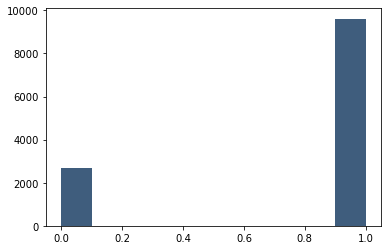

In [15]:
plt.hist(cluster_dataset.is_normal, color='#3F5D7D');

In [16]:
abnormal_dataset = cluster_dataset[cluster_dataset.is_normal == 0]
dataset = abnormal_dataset.drop(columns=["is_normal"])

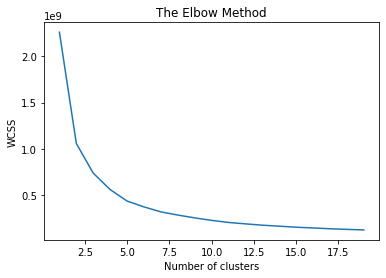

In [17]:
from sklearn.cluster import KMeans
wcss = []
total_test = 20
for i in range(1, total_test):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(dataset)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, total_test), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS');

## Training the K-Means model on the dataset

In [18]:
no_cluster = 5
kmeans = KMeans(n_clusters = no_cluster, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(dataset)

## Change to 2 dimention for ploting

In [19]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 2, kernel = 'rbf')   # we can use kerenal to improve the perfomance
test_dataset = kpca.fit_transform(dataset)

## Visualising the clusters

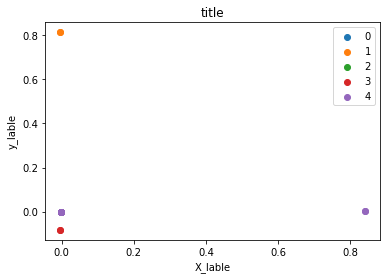

In [20]:
for i in range(no_cluster):
    plt.scatter(test_dataset[y_kmeans == i , 0] , test_dataset[y_kmeans == i , 1],  label = i)
    
plt.title('title')
plt.xlabel('X_lable')
plt.ylabel('y_lable')
plt.legend();

In [21]:
abnormal_dataset = abnormal_dataset.drop(columns=["is_normal"])
abnormal_dataset["is_normal"] = y_kmeans.tolist()

In [68]:
abnormal_dataset.head()

,T_rms_mean,T_rms_std,T_zcr_mean,F_mel_mean,F_mel_std,F_mel_rms_mean,F_mel_rms_std,F_mfcc_mean,F_mfcc_std,F_flatness_mean,F_bandwidth_mean,F_bandwidth_std,F_contrast_mean,F_rolloff_mean,F_rolloff_std,is_normal
0,0.007860,0.002074,0.102903,0.019743,0.031406,0.004779,0.001395,0.802281,0.713340,0.053673,2167.104576,229.808004,16.586721,4715.355431,904.356103,4
1,0.008078,0.002118,0.099854,0.021287,0.032543,0.004913,0.001418,0.792222,0.819079,0.050359,2075.277426,331.266060,16.140419,4427.216454,1135.671097,1
2,0.008086,0.002081,0.097779,0.021716,0.032256,0.004922,0.001387,0.754520,0.851026,0.048603,2035.549836,383.531527,16.244304,4330.945487,1236.717933,1
3,0.007584,0.002217,0.115414,0.020680,0.029519,0.004609,0.001474,0.671063,0.801823,0.068693,2124.175475,222.712141,15.834551,4717.976238,804.476273,4
4,0.007901,0.002068,0.106082,0.020375,0.031433,0.004804,0.001385,0.803645,0.741051,0.056124,2163.299179,224.286498,16.325567,4720.746805,883.855629,4


In [22]:
for i in range(no_cluster):
    print(i,": ",abnormal_dataset[abnormal_dataset.is_normal == i].shape)

0 :  (595, 16)
1 :  (449, 16)
2 :  (230, 16)
3 :  (698, 16)
4 :  (698, 16)


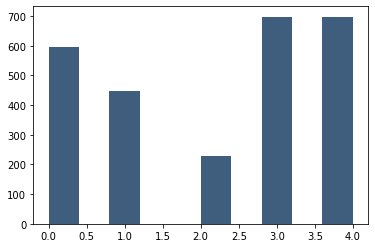

In [30]:
plt.hist(abnormal_dataset.is_normal, color='#3F5D7D');

## Split data

In [27]:
X = abnormal_dataset.drop("is_normal", axis=1)
y = abnormal_dataset.is_normal

from sklearn.model_selection import train_test_split

X_model, X_val, y_model, y_val  = train_test_split(X, y, test_size=0.1, random_state=1) # 0.25 x 0.8 = 0.2

In [28]:
print(X_model.shape)
print(y_model.shape)

(2403, 15)
(2403,)


## Resample over sample

In [29]:
from imblearn.over_sampling import BorderlineSMOTE
X_resample, y_resample = BorderlineSMOTE().fit_resample(X_model, y_model.ravel())

y_resample = pd.DataFrame(y_resample)
X_resample = pd.DataFrame(X_resample)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size=0.2, random_state=1)

[1 3 4 0 2]


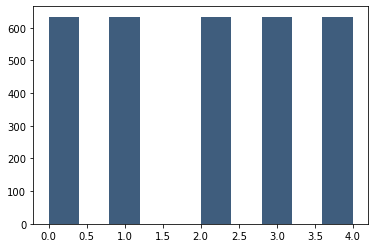

In [39]:
print(y_resample[0].unique())
plt.hist(y_resample, color='#3F5D7D');

## Feature Scaling 

In [42]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
# reassingn index and columns
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values
X_train_scaled = X_train2

X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values
X_test_scaled = X_test2

## Logical Regression (Default)

In [45]:
from sklearn.linear_model import LogisticRegression
LR_classifier = LogisticRegression(random_state = 0)
LR_classifier.fit(X_train_scaled, y_train.values.ravel())

y_pred = LR_classifier.predict(X_test_scaled)

results = perfomance_check('Logical Regression (Default)')

class_report(y_test, y_pred)

              precision    recall  f1-score   support

     class 4       0.93      0.95      0.94       124
     class 1       0.95      0.99      0.97       125
     class 0       0.96      1.00      0.98       135
     class 3       0.99      0.93      0.96       127
     class 2       0.99      0.95      0.97       123

    accuracy                           0.97       634
   macro avg       0.97      0.96      0.96       634
weighted avg       0.97      0.97      0.97       634



## Logical Regression

In [46]:
from sklearn.linear_model import LogisticRegression
LR_classifier = LogisticRegression(random_state = 0, penalty = 'l1', solver='saga')
LR_classifier.fit(X_train_scaled, y_train.values.ravel())

y_pred = LR_classifier.predict(X_test_scaled)

results = perfomance_check('Logical Regression (Lasso)')

class_report(y_test, y_pred)

              precision    recall  f1-score   support

     class 4       0.93      0.97      0.95       124
     class 1       0.97      0.99      0.98       125
     class 0       0.97      1.00      0.99       135
     class 3       1.00      0.93      0.96       127
     class 2       0.99      0.97      0.98       123

    accuracy                           0.97       634
   macro avg       0.97      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634



## KNN (K-Nearest Neighbours)

In [47]:
from sklearn.neighbors import KNeighborsClassifier
no_neighbor = 5
for i in range(2,no_neighbor+1):
    KNN_classifier = KNeighborsClassifier(n_neighbors = i, metric = 'minkowski', p = 2)
    KNN_classifier.fit(X_train_scaled, y_train.values.ravel())

    y_pred = KNN_classifier.predict(X_test_scaled)

    results = perfomance_check(f'K-Nearest Neighbours {i}')
    
    class_report(y_test, y_pred)

              precision    recall  f1-score   support

     class 4       0.86      0.98      0.92       124
     class 1       0.90      0.98      0.94       125
     class 0       0.99      1.00      0.99       135
     class 3       0.95      0.82      0.88       127
     class 2       0.96      0.88      0.92       123

    accuracy                           0.93       634
   macro avg       0.93      0.93      0.93       634
weighted avg       0.93      0.93      0.93       634

              precision    recall  f1-score   support

     class 4       0.90      0.96      0.93       124
     class 1       0.92      0.95      0.94       125
     class 0       0.98      1.00      0.99       135
     class 3       0.94      0.88      0.91       127
     class 2       0.96      0.90      0.93       123

    accuracy                           0.94       634
   macro avg       0.94      0.94      0.94       634
weighted avg       0.94      0.94      0.94       634

              precisio

## SVM

from sklearn.svm import SVC
SVML_classifier = SVC(random_state = 0, kernel = 'linear')
SVML_classifier.fit(X_train_scaled, y_train.values.ravel())

y_pred = SVML_classifier.predict(X_test_scaled)

results = perfomance_check('SVM (Linear)')

class_report(y_pred)

## Kernal SVM

In [48]:
from sklearn.svm import SVC
K_SVM_classifier = SVC(random_state=0, kernel = 'rbf')
K_SVM_classifier.fit(X_train_scaled, y_train.values.ravel())

y_pred = K_SVM_classifier.predict(X_test_scaled)

results = perfomance_check('SVM (RBF)')

class_report(y_test, y_pred)

              precision    recall  f1-score   support

     class 4       0.92      0.96      0.94       124
     class 1       0.92      0.96      0.94       125
     class 0       0.97      1.00      0.99       135
     class 3       0.96      0.91      0.94       127
     class 2       0.97      0.90      0.94       123

    accuracy                           0.95       634
   macro avg       0.95      0.95      0.95       634
weighted avg       0.95      0.95      0.95       634



## Naive Bayes

In [49]:
from sklearn.naive_bayes import GaussianNB
NB_classifier = GaussianNB()
NB_classifier.fit(X_train, y_train.values.ravel())

y_pred = NB_classifier.predict(X_test_scaled)

results = perfomance_check('Naive Bayes')

class_report(y_test, y_pred)

              precision    recall  f1-score   support

     class 4       0.67      0.05      0.09       124
     class 1       0.00      0.00      0.00       125
     class 0       0.16      0.56      0.25       135
     class 3       0.04      0.02      0.02       127
     class 2       0.51      0.44      0.47       123

    accuracy                           0.22       634
   macro avg       0.28      0.21      0.17       634
weighted avg       0.27      0.22      0.17       634



## Decision Tree Classification

In [50]:
from sklearn.tree import DecisionTreeClassifier
DTC_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DTC_classifier.fit(X_train, y_train.values.ravel())

y_pred = DTC_classifier.predict(X_test)

results = perfomance_check('Decision Tree Classification')

class_report(y_test, y_pred)

              precision    recall  f1-score   support

     class 4       0.95      0.98      0.97       124
     class 1       0.98      0.96      0.97       125
     class 0       0.99      1.00      1.00       135
     class 3       0.98      0.93      0.95       127
     class 2       0.96      0.98      0.97       123

    accuracy                           0.97       634
   macro avg       0.97      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634



## Random Forest Classification

In [51]:
from sklearn.ensemble import RandomForestClassifier

no_estimators = 100

RF_classifier = RandomForestClassifier(random_state = 0, n_estimators = no_estimators, criterion = 'entropy')
RF_classifier.fit(X_train, y_train.values.ravel())
y_pred = RF_classifier.predict(X_test)

results = perfomance_check(f'Random Forest (n={no_estimators})')

class_report(y_test, y_pred)

              precision    recall  f1-score   support

     class 4       0.98      0.99      0.98       124
     class 1       0.97      0.98      0.98       125
     class 0       0.99      1.00      1.00       135
     class 3       1.00      0.94      0.97       127
     class 2       0.97      0.98      0.98       123

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



## XGBoost Classifier

In [52]:
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train.values.ravel())

y_pred = xgb_classifier.predict(X_test)

results = perfomance_check('XGBoost ')

class_report(y_test, y_pred)

[10:02:52] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

     class 4       0.96      0.99      0.98       124
     class 1       0.97      0.98      0.98       125
     class 0       1.00      1.00      1.00       135
     class 3       0.99      0.94      0.96       127
     class 2       0.98      0.98      0.98       123

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



## CatBoost Classifier

In [53]:
from catboost import CatBoostClassifier
CB_classifier = CatBoostClassifier()
CB_classifier.fit(X_train, y_train.values.ravel())

y_pred = CB_classifier.predict(X_test)

results = perfomance_check('CatBoost')

class_report(y_test, y_pred)

Learning rate set to 0.082973
0:	learn: 1.4123717	total: 175ms	remaining: 2m 55s
1:	learn: 1.2570851	total: 213ms	remaining: 1m 46s
2:	learn: 1.1304943	total: 246ms	remaining: 1m 21s
3:	learn: 1.0281142	total: 264ms	remaining: 1m 5s
4:	learn: 0.9501102	total: 283ms	remaining: 56.3s
5:	learn: 0.8687066	total: 303ms	remaining: 50.1s
6:	learn: 0.8029186	total: 322ms	remaining: 45.7s
7:	learn: 0.7506201	total: 339ms	remaining: 42.1s
8:	learn: 0.6990621	total: 358ms	remaining: 39.5s
9:	learn: 0.6589839	total: 378ms	remaining: 37.5s
10:	learn: 0.6227253	total: 396ms	remaining: 35.6s
11:	learn: 0.5896028	total: 425ms	remaining: 35s
12:	learn: 0.5582306	total: 447ms	remaining: 33.9s
13:	learn: 0.5295082	total: 470ms	remaining: 33.1s
14:	learn: 0.5029312	total: 491ms	remaining: 32.2s
15:	learn: 0.4784040	total: 517ms	remaining: 31.8s
16:	learn: 0.4544944	total: 535ms	remaining: 31s
17:	learn: 0.4351875	total: 558ms	remaining: 30.5s
18:	learn: 0.4159541	total: 579ms	remaining: 29.9s
19:	learn: 0

166:	learn: 0.0667096	total: 4.03s	remaining: 20.1s
167:	learn: 0.0661711	total: 4.05s	remaining: 20.1s
168:	learn: 0.0657708	total: 4.09s	remaining: 20.1s
169:	learn: 0.0651300	total: 4.11s	remaining: 20.1s
170:	learn: 0.0647798	total: 4.13s	remaining: 20s
171:	learn: 0.0644445	total: 4.15s	remaining: 20s
172:	learn: 0.0641047	total: 4.17s	remaining: 19.9s
173:	learn: 0.0638388	total: 4.19s	remaining: 19.9s
174:	learn: 0.0634823	total: 4.22s	remaining: 19.9s
175:	learn: 0.0631415	total: 4.24s	remaining: 19.8s
176:	learn: 0.0629916	total: 4.26s	remaining: 19.8s
177:	learn: 0.0627872	total: 4.28s	remaining: 19.8s
178:	learn: 0.0626028	total: 4.3s	remaining: 19.7s
179:	learn: 0.0625039	total: 4.32s	remaining: 19.7s
180:	learn: 0.0622496	total: 4.34s	remaining: 19.6s
181:	learn: 0.0617733	total: 4.36s	remaining: 19.6s
182:	learn: 0.0616727	total: 4.4s	remaining: 19.6s
183:	learn: 0.0614192	total: 4.42s	remaining: 19.6s
184:	learn: 0.0612051	total: 4.45s	remaining: 19.6s
185:	learn: 0.0610

327:	learn: 0.0367246	total: 7.95s	remaining: 16.3s
328:	learn: 0.0366650	total: 7.99s	remaining: 16.3s
329:	learn: 0.0364817	total: 8.02s	remaining: 16.3s
330:	learn: 0.0364281	total: 8.04s	remaining: 16.3s
331:	learn: 0.0363192	total: 8.06s	remaining: 16.2s
332:	learn: 0.0362308	total: 8.08s	remaining: 16.2s
333:	learn: 0.0361715	total: 8.11s	remaining: 16.2s
334:	learn: 0.0359750	total: 8.14s	remaining: 16.2s
335:	learn: 0.0358496	total: 8.18s	remaining: 16.2s
336:	learn: 0.0357640	total: 8.19s	remaining: 16.1s
337:	learn: 0.0356081	total: 8.22s	remaining: 16.1s
338:	learn: 0.0355441	total: 8.24s	remaining: 16.1s
339:	learn: 0.0354928	total: 8.27s	remaining: 16s
340:	learn: 0.0354652	total: 8.29s	remaining: 16s
341:	learn: 0.0352935	total: 8.31s	remaining: 16s
342:	learn: 0.0351713	total: 8.33s	remaining: 16s
343:	learn: 0.0350715	total: 8.35s	remaining: 15.9s
344:	learn: 0.0349577	total: 8.37s	remaining: 15.9s
345:	learn: 0.0348664	total: 8.39s	remaining: 15.9s
346:	learn: 0.034833

487:	learn: 0.0248432	total: 11.9s	remaining: 12.5s
488:	learn: 0.0247508	total: 11.9s	remaining: 12.5s
489:	learn: 0.0247292	total: 11.9s	remaining: 12.4s
490:	learn: 0.0246250	total: 12s	remaining: 12.4s
491:	learn: 0.0245512	total: 12s	remaining: 12.4s
492:	learn: 0.0244940	total: 12s	remaining: 12.4s
493:	learn: 0.0244200	total: 12s	remaining: 12.3s
494:	learn: 0.0243679	total: 12.1s	remaining: 12.3s
495:	learn: 0.0243263	total: 12.1s	remaining: 12.3s
496:	learn: 0.0242211	total: 12.1s	remaining: 12.3s
497:	learn: 0.0241345	total: 12.1s	remaining: 12.2s
498:	learn: 0.0241275	total: 12.2s	remaining: 12.2s
499:	learn: 0.0240982	total: 12.2s	remaining: 12.2s
500:	learn: 0.0240278	total: 12.2s	remaining: 12.2s
501:	learn: 0.0239355	total: 12.2s	remaining: 12.1s
502:	learn: 0.0239031	total: 12.3s	remaining: 12.1s
503:	learn: 0.0238673	total: 12.3s	remaining: 12.1s
504:	learn: 0.0237958	total: 12.3s	remaining: 12.1s
505:	learn: 0.0237793	total: 12.3s	remaining: 12s
506:	learn: 0.0237182	

647:	learn: 0.0185071	total: 16.2s	remaining: 8.8s
648:	learn: 0.0184843	total: 16.2s	remaining: 8.77s
649:	learn: 0.0184455	total: 16.2s	remaining: 8.74s
650:	learn: 0.0184273	total: 16.3s	remaining: 8.72s
651:	learn: 0.0183981	total: 16.3s	remaining: 8.69s
652:	learn: 0.0183697	total: 16.3s	remaining: 8.66s
653:	learn: 0.0183376	total: 16.3s	remaining: 8.64s
654:	learn: 0.0183305	total: 16.4s	remaining: 8.61s
655:	learn: 0.0182963	total: 16.4s	remaining: 8.6s
656:	learn: 0.0182782	total: 16.4s	remaining: 8.57s
657:	learn: 0.0182494	total: 16.5s	remaining: 8.55s
658:	learn: 0.0182299	total: 16.5s	remaining: 8.53s
659:	learn: 0.0182110	total: 16.5s	remaining: 8.5s
660:	learn: 0.0181809	total: 16.5s	remaining: 8.48s
661:	learn: 0.0181649	total: 16.6s	remaining: 8.45s
662:	learn: 0.0181226	total: 16.6s	remaining: 8.43s
663:	learn: 0.0180967	total: 16.6s	remaining: 8.41s
664:	learn: 0.0180724	total: 16.6s	remaining: 8.38s
665:	learn: 0.0180253	total: 16.7s	remaining: 8.36s
666:	learn: 0.0

811:	learn: 0.0141419	total: 21s	remaining: 4.86s
812:	learn: 0.0141311	total: 21s	remaining: 4.83s
813:	learn: 0.0141269	total: 21s	remaining: 4.8s
814:	learn: 0.0141109	total: 21.1s	remaining: 4.78s
815:	learn: 0.0140957	total: 21.1s	remaining: 4.75s
816:	learn: 0.0140839	total: 21.1s	remaining: 4.73s
817:	learn: 0.0140716	total: 21.1s	remaining: 4.7s
818:	learn: 0.0140534	total: 21.2s	remaining: 4.68s
819:	learn: 0.0140274	total: 21.2s	remaining: 4.65s
820:	learn: 0.0140112	total: 21.2s	remaining: 4.62s
821:	learn: 0.0139828	total: 21.2s	remaining: 4.6s
822:	learn: 0.0139732	total: 21.3s	remaining: 4.57s
823:	learn: 0.0139321	total: 21.3s	remaining: 4.54s
824:	learn: 0.0139199	total: 21.3s	remaining: 4.52s
825:	learn: 0.0138990	total: 21.3s	remaining: 4.49s
826:	learn: 0.0138843	total: 21.3s	remaining: 4.46s
827:	learn: 0.0138606	total: 21.4s	remaining: 4.44s
828:	learn: 0.0138379	total: 21.4s	remaining: 4.41s
829:	learn: 0.0138306	total: 21.4s	remaining: 4.39s
830:	learn: 0.0138164

977:	learn: 0.0115193	total: 25.3s	remaining: 569ms
978:	learn: 0.0115075	total: 25.3s	remaining: 544ms
979:	learn: 0.0114905	total: 25.4s	remaining: 518ms
980:	learn: 0.0114740	total: 25.4s	remaining: 492ms
981:	learn: 0.0114545	total: 25.4s	remaining: 466ms
982:	learn: 0.0114436	total: 25.4s	remaining: 440ms
983:	learn: 0.0114261	total: 25.5s	remaining: 414ms
984:	learn: 0.0114074	total: 25.5s	remaining: 389ms
985:	learn: 0.0113911	total: 25.5s	remaining: 363ms
986:	learn: 0.0113714	total: 25.6s	remaining: 337ms
987:	learn: 0.0113524	total: 25.6s	remaining: 311ms
988:	learn: 0.0113379	total: 25.6s	remaining: 285ms
989:	learn: 0.0113307	total: 25.7s	remaining: 259ms
990:	learn: 0.0113264	total: 25.7s	remaining: 233ms
991:	learn: 0.0113191	total: 25.7s	remaining: 208ms
992:	learn: 0.0113073	total: 25.8s	remaining: 182ms
993:	learn: 0.0112935	total: 25.8s	remaining: 156ms
994:	learn: 0.0112825	total: 25.8s	remaining: 130ms
995:	learn: 0.0112456	total: 25.8s	remaining: 104ms
996:	learn: 

In [54]:
class_report(y_test, y_pred)

              precision    recall  f1-score   support

     class 4       0.97      1.00      0.98       124
     class 1       0.98      0.99      0.99       125
     class 0       1.00      1.00      1.00       135
     class 3       1.00      0.95      0.98       127
     class 2       0.98      0.98      0.98       123

    accuracy                           0.99       634
   macro avg       0.99      0.99      0.99       634
weighted avg       0.99      0.99      0.99       634



In [55]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logical Regression (Default),0.965300,0.965300,0.965300,0.965300
1,Logical Regression (Lasso),0.971609,0.971609,0.971609,0.971609
2,K-Nearest Neighbours 2,0.930599,0.930599,0.930599,0.930599
3,K-Nearest Neighbours 3,0.940063,0.940063,0.940063,0.940063
4,K-Nearest Neighbours 4,0.932177,0.932177,0.932177,0.932177
5,K-Nearest Neighbours 5,0.943218,0.943218,0.943218,0.943218
6,SVM (RBF),0.947950,0.947950,0.947950,0.947950
7,Naive Bayes,0.217666,0.217666,0.217666,0.217666
8,Decision Tree Classification,0.971609,0.971609,0.971609,0.971609
9,Random Forest (n=100),0.981073,0.981073,0.981073,0.981073


---
# MODEL SELECTION
---

### K-fold Cross Validation
---
* Conside which model perform the best

In [56]:
from sklearn.model_selection import cross_val_score
model_lst = [LR_classifier,    # 0
             KNN_classifier,   # 1
             K_SVM_classifier, # 2
             NB_classifier,    # 3
             DTC_classifier,   # 4
             RF_classifier,    # 5
             xgb_classifier,   # 6
             CB_classifier]    # 7
#              SVML_classifier,  # 8
msg = []
for i in range(len(model_lst)):
    accuracies = cross_val_score(estimator =model_lst[i] , X = X_train, y = y_train, cv = 10)
    msg.append(f"Model Accuracy {i}: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))
    
for i in msg:
    print(i)    

[10:03:59] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:04:02] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:04:03] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:04:05] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

114:	learn: 0.0920476	total: 2.67s	remaining: 20.5s
115:	learn: 0.0911110	total: 2.7s	remaining: 20.6s
116:	learn: 0.0905074	total: 2.72s	remaining: 20.5s
117:	learn: 0.0900619	total: 2.74s	remaining: 20.5s
118:	learn: 0.0891622	total: 2.76s	remaining: 20.4s
119:	learn: 0.0886243	total: 2.78s	remaining: 20.4s
120:	learn: 0.0883612	total: 2.8s	remaining: 20.4s
121:	learn: 0.0878602	total: 2.83s	remaining: 20.4s
122:	learn: 0.0873712	total: 2.86s	remaining: 20.4s
123:	learn: 0.0868733	total: 2.88s	remaining: 20.4s
124:	learn: 0.0862878	total: 2.91s	remaining: 20.4s
125:	learn: 0.0850582	total: 2.93s	remaining: 20.3s
126:	learn: 0.0844083	total: 2.95s	remaining: 20.3s
127:	learn: 0.0837672	total: 2.98s	remaining: 20.3s
128:	learn: 0.0829811	total: 3s	remaining: 20.3s
129:	learn: 0.0826326	total: 3.03s	remaining: 20.3s
130:	learn: 0.0824353	total: 3.05s	remaining: 20.2s
131:	learn: 0.0818555	total: 3.08s	remaining: 20.2s
132:	learn: 0.0813784	total: 3.11s	remaining: 20.3s
133:	learn: 0.080

274:	learn: 0.0433696	total: 6.49s	remaining: 17.1s
275:	learn: 0.0431878	total: 6.51s	remaining: 17.1s
276:	learn: 0.0431007	total: 6.53s	remaining: 17s
277:	learn: 0.0429611	total: 6.55s	remaining: 17s
278:	learn: 0.0427761	total: 6.57s	remaining: 17s
279:	learn: 0.0426292	total: 6.58s	remaining: 16.9s
280:	learn: 0.0423966	total: 6.6s	remaining: 16.9s
281:	learn: 0.0421932	total: 6.63s	remaining: 16.9s
282:	learn: 0.0420856	total: 6.65s	remaining: 16.9s
283:	learn: 0.0419370	total: 6.67s	remaining: 16.8s
284:	learn: 0.0417047	total: 6.7s	remaining: 16.8s
285:	learn: 0.0415669	total: 6.74s	remaining: 16.8s
286:	learn: 0.0413373	total: 6.76s	remaining: 16.8s
287:	learn: 0.0412794	total: 6.78s	remaining: 16.8s
288:	learn: 0.0411744	total: 6.8s	remaining: 16.7s
289:	learn: 0.0411309	total: 6.82s	remaining: 16.7s
290:	learn: 0.0409563	total: 6.84s	remaining: 16.7s
291:	learn: 0.0408535	total: 6.86s	remaining: 16.6s
292:	learn: 0.0406960	total: 6.88s	remaining: 16.6s
293:	learn: 0.0405099

438:	learn: 0.0277355	total: 9.89s	remaining: 12.6s
439:	learn: 0.0276457	total: 9.91s	remaining: 12.6s
440:	learn: 0.0275625	total: 9.94s	remaining: 12.6s
441:	learn: 0.0275313	total: 9.96s	remaining: 12.6s
442:	learn: 0.0274752	total: 9.98s	remaining: 12.5s
443:	learn: 0.0274021	total: 10s	remaining: 12.5s
444:	learn: 0.0273689	total: 10s	remaining: 12.5s
445:	learn: 0.0273174	total: 10s	remaining: 12.5s
446:	learn: 0.0272745	total: 10.1s	remaining: 12.4s
447:	learn: 0.0272205	total: 10.1s	remaining: 12.4s
448:	learn: 0.0271565	total: 10.1s	remaining: 12.4s
449:	learn: 0.0270704	total: 10.1s	remaining: 12.4s
450:	learn: 0.0269838	total: 10.1s	remaining: 12.3s
451:	learn: 0.0269253	total: 10.2s	remaining: 12.3s
452:	learn: 0.0268615	total: 10.2s	remaining: 12.3s
453:	learn: 0.0267903	total: 10.2s	remaining: 12.3s
454:	learn: 0.0267034	total: 10.2s	remaining: 12.2s
455:	learn: 0.0266772	total: 10.2s	remaining: 12.2s
456:	learn: 0.0266589	total: 10.2s	remaining: 12.2s
457:	learn: 0.0265

599:	learn: 0.0196428	total: 13.1s	remaining: 8.74s
600:	learn: 0.0195945	total: 13.1s	remaining: 8.72s
601:	learn: 0.0195674	total: 13.2s	remaining: 8.7s
602:	learn: 0.0195344	total: 13.2s	remaining: 8.67s
603:	learn: 0.0195180	total: 13.2s	remaining: 8.65s
604:	learn: 0.0194675	total: 13.2s	remaining: 8.63s
605:	learn: 0.0194510	total: 13.2s	remaining: 8.6s
606:	learn: 0.0194122	total: 13.3s	remaining: 8.58s
607:	learn: 0.0193915	total: 13.3s	remaining: 8.56s
608:	learn: 0.0193496	total: 13.3s	remaining: 8.53s
609:	learn: 0.0193315	total: 13.3s	remaining: 8.52s
610:	learn: 0.0193109	total: 13.3s	remaining: 8.49s
611:	learn: 0.0192842	total: 13.4s	remaining: 8.47s
612:	learn: 0.0192688	total: 13.4s	remaining: 8.47s
613:	learn: 0.0192237	total: 13.4s	remaining: 8.45s
614:	learn: 0.0191667	total: 13.5s	remaining: 8.43s
615:	learn: 0.0191557	total: 13.5s	remaining: 8.41s
616:	learn: 0.0191011	total: 13.5s	remaining: 8.38s
617:	learn: 0.0190710	total: 13.5s	remaining: 8.37s
618:	learn: 0.

758:	learn: 0.0151160	total: 16.8s	remaining: 5.34s
759:	learn: 0.0150979	total: 16.9s	remaining: 5.33s
760:	learn: 0.0150812	total: 16.9s	remaining: 5.3s
761:	learn: 0.0150691	total: 16.9s	remaining: 5.28s
762:	learn: 0.0150318	total: 16.9s	remaining: 5.26s
763:	learn: 0.0150260	total: 17s	remaining: 5.24s
764:	learn: 0.0150090	total: 17s	remaining: 5.22s
765:	learn: 0.0149829	total: 17s	remaining: 5.2s
766:	learn: 0.0149708	total: 17s	remaining: 5.18s
767:	learn: 0.0149616	total: 17.1s	remaining: 5.15s
768:	learn: 0.0149326	total: 17.1s	remaining: 5.13s
769:	learn: 0.0149066	total: 17.1s	remaining: 5.11s
770:	learn: 0.0148624	total: 17.1s	remaining: 5.09s
771:	learn: 0.0148348	total: 17.2s	remaining: 5.07s
772:	learn: 0.0148030	total: 17.2s	remaining: 5.04s
773:	learn: 0.0147861	total: 17.2s	remaining: 5.03s
774:	learn: 0.0147545	total: 17.2s	remaining: 5.01s
775:	learn: 0.0146864	total: 17.3s	remaining: 4.98s
776:	learn: 0.0146609	total: 17.3s	remaining: 4.96s
777:	learn: 0.0146378	

917:	learn: 0.0122170	total: 20.5s	remaining: 1.83s
918:	learn: 0.0122072	total: 20.5s	remaining: 1.81s
919:	learn: 0.0121907	total: 20.5s	remaining: 1.78s
920:	learn: 0.0121823	total: 20.5s	remaining: 1.76s
921:	learn: 0.0121744	total: 20.6s	remaining: 1.74s
922:	learn: 0.0121613	total: 20.6s	remaining: 1.72s
923:	learn: 0.0121440	total: 20.6s	remaining: 1.69s
924:	learn: 0.0121215	total: 20.6s	remaining: 1.67s
925:	learn: 0.0121093	total: 20.6s	remaining: 1.65s
926:	learn: 0.0120833	total: 20.6s	remaining: 1.63s
927:	learn: 0.0120305	total: 20.7s	remaining: 1.6s
928:	learn: 0.0120270	total: 20.7s	remaining: 1.58s
929:	learn: 0.0120179	total: 20.7s	remaining: 1.56s
930:	learn: 0.0119904	total: 20.7s	remaining: 1.54s
931:	learn: 0.0119830	total: 20.8s	remaining: 1.51s
932:	learn: 0.0119708	total: 20.8s	remaining: 1.49s
933:	learn: 0.0119654	total: 20.8s	remaining: 1.47s
934:	learn: 0.0119406	total: 20.8s	remaining: 1.45s
935:	learn: 0.0119266	total: 20.8s	remaining: 1.42s
936:	learn: 0

77:	learn: 0.1276397	total: 1.68s	remaining: 19.8s
78:	learn: 0.1263985	total: 1.7s	remaining: 19.8s
79:	learn: 0.1253934	total: 1.72s	remaining: 19.8s
80:	learn: 0.1245042	total: 1.74s	remaining: 19.8s
81:	learn: 0.1237105	total: 1.76s	remaining: 19.7s
82:	learn: 0.1219866	total: 1.78s	remaining: 19.7s
83:	learn: 0.1210946	total: 1.8s	remaining: 19.6s
84:	learn: 0.1203782	total: 1.82s	remaining: 19.6s
85:	learn: 0.1193210	total: 1.83s	remaining: 19.5s
86:	learn: 0.1184488	total: 1.85s	remaining: 19.4s
87:	learn: 0.1172658	total: 1.89s	remaining: 19.6s
88:	learn: 0.1160611	total: 1.91s	remaining: 19.6s
89:	learn: 0.1151106	total: 1.94s	remaining: 19.6s
90:	learn: 0.1140129	total: 1.96s	remaining: 19.6s
91:	learn: 0.1132823	total: 1.98s	remaining: 19.5s
92:	learn: 0.1122159	total: 2s	remaining: 19.5s
93:	learn: 0.1114365	total: 2.02s	remaining: 19.5s
94:	learn: 0.1104989	total: 2.04s	remaining: 19.5s
95:	learn: 0.1093860	total: 2.07s	remaining: 19.5s
96:	learn: 0.1083608	total: 2.11s	re

245:	learn: 0.0486525	total: 5.45s	remaining: 16.7s
246:	learn: 0.0485531	total: 5.46s	remaining: 16.7s
247:	learn: 0.0484363	total: 5.49s	remaining: 16.7s
248:	learn: 0.0482495	total: 5.52s	remaining: 16.6s
249:	learn: 0.0481361	total: 5.54s	remaining: 16.6s
250:	learn: 0.0480376	total: 5.57s	remaining: 16.6s
251:	learn: 0.0479083	total: 5.59s	remaining: 16.6s
252:	learn: 0.0477299	total: 5.61s	remaining: 16.6s
253:	learn: 0.0475528	total: 5.63s	remaining: 16.5s
254:	learn: 0.0473539	total: 5.66s	remaining: 16.5s
255:	learn: 0.0473317	total: 5.7s	remaining: 16.6s
256:	learn: 0.0471117	total: 5.72s	remaining: 16.5s
257:	learn: 0.0470214	total: 5.74s	remaining: 16.5s
258:	learn: 0.0467582	total: 5.76s	remaining: 16.5s
259:	learn: 0.0465945	total: 5.79s	remaining: 16.5s
260:	learn: 0.0464624	total: 5.81s	remaining: 16.4s
261:	learn: 0.0462217	total: 5.83s	remaining: 16.4s
262:	learn: 0.0461302	total: 5.85s	remaining: 16.4s
263:	learn: 0.0460522	total: 5.87s	remaining: 16.4s
264:	learn: 0

406:	learn: 0.0308047	total: 10s	remaining: 14.6s
407:	learn: 0.0307253	total: 10s	remaining: 14.5s
408:	learn: 0.0306588	total: 10.1s	remaining: 14.5s
409:	learn: 0.0305787	total: 10.1s	remaining: 14.5s
410:	learn: 0.0304431	total: 10.1s	remaining: 14.5s
411:	learn: 0.0303843	total: 10.1s	remaining: 14.5s
412:	learn: 0.0303171	total: 10.2s	remaining: 14.4s
413:	learn: 0.0302386	total: 10.2s	remaining: 14.4s
414:	learn: 0.0301935	total: 10.2s	remaining: 14.4s
415:	learn: 0.0301451	total: 10.2s	remaining: 14.4s
416:	learn: 0.0300769	total: 10.3s	remaining: 14.3s
417:	learn: 0.0299791	total: 10.3s	remaining: 14.3s
418:	learn: 0.0299455	total: 10.3s	remaining: 14.3s
419:	learn: 0.0298271	total: 10.3s	remaining: 14.3s
420:	learn: 0.0297313	total: 10.3s	remaining: 14.2s
421:	learn: 0.0296378	total: 10.4s	remaining: 14.2s
422:	learn: 0.0295504	total: 10.4s	remaining: 14.2s
423:	learn: 0.0294749	total: 10.4s	remaining: 14.1s
424:	learn: 0.0294073	total: 10.5s	remaining: 14.1s
425:	learn: 0.02

566:	learn: 0.0217718	total: 13.9s	remaining: 10.6s
567:	learn: 0.0217171	total: 13.9s	remaining: 10.6s
568:	learn: 0.0216746	total: 13.9s	remaining: 10.5s
569:	learn: 0.0216412	total: 13.9s	remaining: 10.5s
570:	learn: 0.0216140	total: 14s	remaining: 10.5s
571:	learn: 0.0215854	total: 14s	remaining: 10.5s
572:	learn: 0.0215623	total: 14s	remaining: 10.4s
573:	learn: 0.0215325	total: 14s	remaining: 10.4s
574:	learn: 0.0215008	total: 14s	remaining: 10.4s
575:	learn: 0.0214885	total: 14.1s	remaining: 10.3s
576:	learn: 0.0214776	total: 14.1s	remaining: 10.3s
577:	learn: 0.0214411	total: 14.1s	remaining: 10.3s
578:	learn: 0.0214069	total: 14.1s	remaining: 10.3s
579:	learn: 0.0213774	total: 14.1s	remaining: 10.2s
580:	learn: 0.0213319	total: 14.2s	remaining: 10.2s
581:	learn: 0.0213185	total: 14.2s	remaining: 10.2s
582:	learn: 0.0213013	total: 14.2s	remaining: 10.2s
583:	learn: 0.0212479	total: 14.2s	remaining: 10.1s
584:	learn: 0.0212019	total: 14.2s	remaining: 10.1s
585:	learn: 0.0211548	

727:	learn: 0.0167237	total: 17.5s	remaining: 6.53s
728:	learn: 0.0166962	total: 17.5s	remaining: 6.5s
729:	learn: 0.0166707	total: 17.5s	remaining: 6.48s
730:	learn: 0.0166507	total: 17.5s	remaining: 6.45s
731:	learn: 0.0166182	total: 17.6s	remaining: 6.43s
732:	learn: 0.0166048	total: 17.6s	remaining: 6.41s
733:	learn: 0.0165713	total: 17.6s	remaining: 6.38s
734:	learn: 0.0165502	total: 17.6s	remaining: 6.35s
735:	learn: 0.0165171	total: 17.6s	remaining: 6.33s
736:	learn: 0.0164900	total: 17.7s	remaining: 6.3s
737:	learn: 0.0164651	total: 17.7s	remaining: 6.28s
738:	learn: 0.0164419	total: 17.7s	remaining: 6.26s
739:	learn: 0.0164256	total: 17.8s	remaining: 6.24s
740:	learn: 0.0164061	total: 17.8s	remaining: 6.21s
741:	learn: 0.0163846	total: 17.8s	remaining: 6.19s
742:	learn: 0.0163627	total: 17.8s	remaining: 6.16s
743:	learn: 0.0163461	total: 17.8s	remaining: 6.14s
744:	learn: 0.0163262	total: 17.9s	remaining: 6.12s
745:	learn: 0.0163000	total: 17.9s	remaining: 6.09s
746:	learn: 0.

890:	learn: 0.0132493	total: 21.2s	remaining: 2.6s
891:	learn: 0.0132333	total: 21.3s	remaining: 2.58s
892:	learn: 0.0132089	total: 21.3s	remaining: 2.55s
893:	learn: 0.0132011	total: 21.3s	remaining: 2.53s
894:	learn: 0.0131914	total: 21.4s	remaining: 2.5s
895:	learn: 0.0131707	total: 21.4s	remaining: 2.48s
896:	learn: 0.0131624	total: 21.4s	remaining: 2.46s
897:	learn: 0.0131568	total: 21.4s	remaining: 2.43s
898:	learn: 0.0131343	total: 21.4s	remaining: 2.41s
899:	learn: 0.0131199	total: 21.4s	remaining: 2.38s
900:	learn: 0.0131013	total: 21.5s	remaining: 2.36s
901:	learn: 0.0130844	total: 21.5s	remaining: 2.34s
902:	learn: 0.0130709	total: 21.5s	remaining: 2.31s
903:	learn: 0.0130459	total: 21.6s	remaining: 2.29s
904:	learn: 0.0130103	total: 21.6s	remaining: 2.26s
905:	learn: 0.0130045	total: 21.6s	remaining: 2.24s
906:	learn: 0.0129706	total: 21.6s	remaining: 2.22s
907:	learn: 0.0129443	total: 21.7s	remaining: 2.19s
908:	learn: 0.0129320	total: 21.7s	remaining: 2.17s
909:	learn: 0.

51:	learn: 0.1696880	total: 1.34s	remaining: 24.5s
52:	learn: 0.1674711	total: 1.37s	remaining: 24.5s
53:	learn: 0.1657387	total: 1.39s	remaining: 24.4s
54:	learn: 0.1632666	total: 1.41s	remaining: 24.2s
55:	learn: 0.1603448	total: 1.44s	remaining: 24.2s
56:	learn: 0.1583168	total: 1.46s	remaining: 24.1s
57:	learn: 0.1562348	total: 1.49s	remaining: 24.3s
58:	learn: 0.1539595	total: 1.51s	remaining: 24.2s
59:	learn: 0.1521047	total: 1.56s	remaining: 24.5s
60:	learn: 0.1501907	total: 1.58s	remaining: 24.4s
61:	learn: 0.1488500	total: 1.6s	remaining: 24.2s
62:	learn: 0.1467268	total: 1.63s	remaining: 24.3s
63:	learn: 0.1451428	total: 1.65s	remaining: 24.2s
64:	learn: 0.1430605	total: 1.68s	remaining: 24.1s
65:	learn: 0.1412372	total: 1.71s	remaining: 24.2s
66:	learn: 0.1390183	total: 1.74s	remaining: 24.2s
67:	learn: 0.1376805	total: 1.76s	remaining: 24.1s
68:	learn: 0.1363662	total: 1.78s	remaining: 24.1s
69:	learn: 0.1350535	total: 1.82s	remaining: 24.1s
70:	learn: 0.1340454	total: 1.85

211:	learn: 0.0538567	total: 5.01s	remaining: 18.6s
212:	learn: 0.0537164	total: 5.03s	remaining: 18.6s
213:	learn: 0.0535529	total: 5.06s	remaining: 18.6s
214:	learn: 0.0533231	total: 5.08s	remaining: 18.6s
215:	learn: 0.0529416	total: 5.11s	remaining: 18.5s
216:	learn: 0.0527529	total: 5.13s	remaining: 18.5s
217:	learn: 0.0524893	total: 5.15s	remaining: 18.5s
218:	learn: 0.0522490	total: 5.18s	remaining: 18.5s
219:	learn: 0.0519173	total: 5.2s	remaining: 18.4s
220:	learn: 0.0516242	total: 5.23s	remaining: 18.4s
221:	learn: 0.0514041	total: 5.25s	remaining: 18.4s
222:	learn: 0.0512023	total: 5.27s	remaining: 18.4s
223:	learn: 0.0511209	total: 5.29s	remaining: 18.3s
224:	learn: 0.0509615	total: 5.31s	remaining: 18.3s
225:	learn: 0.0507330	total: 5.33s	remaining: 18.2s
226:	learn: 0.0504766	total: 5.35s	remaining: 18.2s
227:	learn: 0.0502727	total: 5.37s	remaining: 18.2s
228:	learn: 0.0500668	total: 5.39s	remaining: 18.2s
229:	learn: 0.0499495	total: 5.41s	remaining: 18.1s
230:	learn: 0

372:	learn: 0.0328863	total: 8.43s	remaining: 14.2s
373:	learn: 0.0327798	total: 8.46s	remaining: 14.2s
374:	learn: 0.0326478	total: 8.47s	remaining: 14.1s
375:	learn: 0.0325920	total: 8.5s	remaining: 14.1s
376:	learn: 0.0324378	total: 8.54s	remaining: 14.1s
377:	learn: 0.0323238	total: 8.56s	remaining: 14.1s
378:	learn: 0.0322361	total: 8.58s	remaining: 14.1s
379:	learn: 0.0321488	total: 8.6s	remaining: 14s
380:	learn: 0.0319934	total: 8.63s	remaining: 14s
381:	learn: 0.0319321	total: 8.66s	remaining: 14s
382:	learn: 0.0319181	total: 8.69s	remaining: 14s
383:	learn: 0.0318259	total: 8.71s	remaining: 14s
384:	learn: 0.0317862	total: 8.73s	remaining: 13.9s
385:	learn: 0.0316914	total: 8.76s	remaining: 13.9s
386:	learn: 0.0315660	total: 8.78s	remaining: 13.9s
387:	learn: 0.0314913	total: 8.81s	remaining: 13.9s
388:	learn: 0.0313749	total: 8.84s	remaining: 13.9s
389:	learn: 0.0312946	total: 8.86s	remaining: 13.8s
390:	learn: 0.0311803	total: 8.88s	remaining: 13.8s
391:	learn: 0.0311116	to

535:	learn: 0.0225300	total: 12s	remaining: 10.4s
536:	learn: 0.0224588	total: 12s	remaining: 10.4s
537:	learn: 0.0224391	total: 12.1s	remaining: 10.4s
538:	learn: 0.0224078	total: 12.1s	remaining: 10.4s
539:	learn: 0.0222862	total: 12.1s	remaining: 10.3s
540:	learn: 0.0222632	total: 12.1s	remaining: 10.3s
541:	learn: 0.0222516	total: 12.2s	remaining: 10.3s
542:	learn: 0.0222128	total: 12.2s	remaining: 10.3s
543:	learn: 0.0221349	total: 12.2s	remaining: 10.2s
544:	learn: 0.0220888	total: 12.2s	remaining: 10.2s
545:	learn: 0.0220540	total: 12.2s	remaining: 10.2s
546:	learn: 0.0220222	total: 12.3s	remaining: 10.2s
547:	learn: 0.0219977	total: 12.3s	remaining: 10.1s
548:	learn: 0.0219661	total: 12.3s	remaining: 10.1s
549:	learn: 0.0219226	total: 12.3s	remaining: 10.1s
550:	learn: 0.0218765	total: 12.3s	remaining: 10.1s
551:	learn: 0.0218399	total: 12.4s	remaining: 10s
552:	learn: 0.0217977	total: 12.4s	remaining: 10s
553:	learn: 0.0217387	total: 12.4s	remaining: 9.98s
554:	learn: 0.021695

703:	learn: 0.0171458	total: 16.1s	remaining: 6.76s
704:	learn: 0.0171048	total: 16.1s	remaining: 6.75s
705:	learn: 0.0170828	total: 16.1s	remaining: 6.72s
706:	learn: 0.0170762	total: 16.2s	remaining: 6.7s
707:	learn: 0.0170561	total: 16.2s	remaining: 6.67s
708:	learn: 0.0170162	total: 16.2s	remaining: 6.65s
709:	learn: 0.0169993	total: 16.2s	remaining: 6.62s
710:	learn: 0.0169658	total: 16.2s	remaining: 6.6s
711:	learn: 0.0169241	total: 16.3s	remaining: 6.58s
712:	learn: 0.0169064	total: 16.3s	remaining: 6.57s
713:	learn: 0.0168734	total: 16.3s	remaining: 6.54s
714:	learn: 0.0168414	total: 16.3s	remaining: 6.52s
715:	learn: 0.0168226	total: 16.4s	remaining: 6.49s
716:	learn: 0.0168032	total: 16.4s	remaining: 6.47s
717:	learn: 0.0167844	total: 16.4s	remaining: 6.44s
718:	learn: 0.0167737	total: 16.4s	remaining: 6.42s
719:	learn: 0.0167507	total: 16.4s	remaining: 6.4s
720:	learn: 0.0167335	total: 16.5s	remaining: 6.37s
721:	learn: 0.0167170	total: 16.5s	remaining: 6.35s
722:	learn: 0.0

867:	learn: 0.0136133	total: 20.4s	remaining: 3.1s
868:	learn: 0.0136043	total: 20.4s	remaining: 3.07s
869:	learn: 0.0135789	total: 20.4s	remaining: 3.05s
870:	learn: 0.0135624	total: 20.4s	remaining: 3.02s
871:	learn: 0.0135411	total: 20.4s	remaining: 3s
872:	learn: 0.0135278	total: 20.5s	remaining: 2.98s
873:	learn: 0.0135064	total: 20.5s	remaining: 2.95s
874:	learn: 0.0134852	total: 20.5s	remaining: 2.93s
875:	learn: 0.0134593	total: 20.5s	remaining: 2.91s
876:	learn: 0.0134421	total: 20.5s	remaining: 2.88s
877:	learn: 0.0134288	total: 20.6s	remaining: 2.86s
878:	learn: 0.0134100	total: 20.6s	remaining: 2.84s
879:	learn: 0.0133888	total: 20.6s	remaining: 2.81s
880:	learn: 0.0133726	total: 20.7s	remaining: 2.79s
881:	learn: 0.0133612	total: 20.7s	remaining: 2.77s
882:	learn: 0.0133487	total: 20.7s	remaining: 2.74s
883:	learn: 0.0133274	total: 20.7s	remaining: 2.72s
884:	learn: 0.0133055	total: 20.7s	remaining: 2.69s
885:	learn: 0.0132921	total: 20.8s	remaining: 2.67s
886:	learn: 0.01

29:	learn: 0.2826142	total: 670ms	remaining: 21.7s
30:	learn: 0.2752585	total: 693ms	remaining: 21.6s
31:	learn: 0.2663151	total: 712ms	remaining: 21.6s
32:	learn: 0.2591045	total: 733ms	remaining: 21.5s
33:	learn: 0.2514877	total: 751ms	remaining: 21.3s
34:	learn: 0.2437035	total: 778ms	remaining: 21.4s
35:	learn: 0.2372528	total: 796ms	remaining: 21.3s
36:	learn: 0.2322128	total: 815ms	remaining: 21.2s
37:	learn: 0.2262843	total: 844ms	remaining: 21.4s
38:	learn: 0.2226596	total: 870ms	remaining: 21.4s
39:	learn: 0.2175770	total: 895ms	remaining: 21.5s
40:	learn: 0.2132952	total: 919ms	remaining: 21.5s
41:	learn: 0.2094907	total: 939ms	remaining: 21.4s
42:	learn: 0.2053614	total: 959ms	remaining: 21.3s
43:	learn: 0.2023216	total: 979ms	remaining: 21.3s
44:	learn: 0.1979939	total: 1.01s	remaining: 21.4s
45:	learn: 0.1941365	total: 1.03s	remaining: 21.4s
46:	learn: 0.1909977	total: 1.05s	remaining: 21.3s
47:	learn: 0.1873415	total: 1.08s	remaining: 21.5s
48:	learn: 0.1842322	total: 1.1

190:	learn: 0.0605707	total: 4.26s	remaining: 18.1s
191:	learn: 0.0602475	total: 4.29s	remaining: 18.1s
192:	learn: 0.0600049	total: 4.31s	remaining: 18s
193:	learn: 0.0595122	total: 4.33s	remaining: 18s
194:	learn: 0.0591674	total: 4.36s	remaining: 18s
195:	learn: 0.0590136	total: 4.38s	remaining: 18s
196:	learn: 0.0588406	total: 4.4s	remaining: 17.9s
197:	learn: 0.0583563	total: 4.42s	remaining: 17.9s
198:	learn: 0.0581274	total: 4.44s	remaining: 17.9s
199:	learn: 0.0579704	total: 4.47s	remaining: 17.9s
200:	learn: 0.0575439	total: 4.49s	remaining: 17.8s
201:	learn: 0.0573145	total: 4.5s	remaining: 17.8s
202:	learn: 0.0571549	total: 4.53s	remaining: 17.8s
203:	learn: 0.0569011	total: 4.55s	remaining: 17.8s
204:	learn: 0.0568187	total: 4.58s	remaining: 17.8s
205:	learn: 0.0565750	total: 4.6s	remaining: 17.7s
206:	learn: 0.0563864	total: 4.63s	remaining: 17.7s
207:	learn: 0.0562674	total: 4.64s	remaining: 17.7s
208:	learn: 0.0558559	total: 4.67s	remaining: 17.7s
209:	learn: 0.0557343	t

352:	learn: 0.0355009	total: 8.37s	remaining: 15.3s
353:	learn: 0.0354433	total: 8.41s	remaining: 15.4s
354:	learn: 0.0353890	total: 8.44s	remaining: 15.3s
355:	learn: 0.0353351	total: 8.46s	remaining: 15.3s
356:	learn: 0.0351923	total: 8.5s	remaining: 15.3s
357:	learn: 0.0351067	total: 8.52s	remaining: 15.3s
358:	learn: 0.0350688	total: 8.54s	remaining: 15.2s
359:	learn: 0.0350156	total: 8.57s	remaining: 15.2s
360:	learn: 0.0348698	total: 8.61s	remaining: 15.2s
361:	learn: 0.0347681	total: 8.64s	remaining: 15.2s
362:	learn: 0.0347090	total: 8.68s	remaining: 15.2s
363:	learn: 0.0345498	total: 8.7s	remaining: 15.2s
364:	learn: 0.0344083	total: 8.72s	remaining: 15.2s
365:	learn: 0.0343475	total: 8.75s	remaining: 15.2s
366:	learn: 0.0343032	total: 8.77s	remaining: 15.1s
367:	learn: 0.0342385	total: 8.8s	remaining: 15.1s
368:	learn: 0.0341865	total: 8.84s	remaining: 15.1s
369:	learn: 0.0341236	total: 8.87s	remaining: 15.1s
370:	learn: 0.0340848	total: 8.88s	remaining: 15.1s
371:	learn: 0.0

512:	learn: 0.0243195	total: 12.7s	remaining: 12.1s
513:	learn: 0.0242869	total: 12.8s	remaining: 12.1s
514:	learn: 0.0242167	total: 12.8s	remaining: 12s
515:	learn: 0.0241161	total: 12.8s	remaining: 12s
516:	learn: 0.0240515	total: 12.8s	remaining: 12s
517:	learn: 0.0240338	total: 12.8s	remaining: 12s
518:	learn: 0.0240160	total: 12.9s	remaining: 11.9s
519:	learn: 0.0239989	total: 12.9s	remaining: 11.9s
520:	learn: 0.0239764	total: 12.9s	remaining: 11.9s
521:	learn: 0.0239104	total: 12.9s	remaining: 11.8s
522:	learn: 0.0238731	total: 13s	remaining: 11.8s
523:	learn: 0.0238119	total: 13s	remaining: 11.8s
524:	learn: 0.0237405	total: 13s	remaining: 11.8s
525:	learn: 0.0236881	total: 13s	remaining: 11.7s
526:	learn: 0.0236485	total: 13s	remaining: 11.7s
527:	learn: 0.0235937	total: 13.1s	remaining: 11.7s
528:	learn: 0.0235772	total: 13.1s	remaining: 11.7s
529:	learn: 0.0235664	total: 13.1s	remaining: 11.6s
530:	learn: 0.0235263	total: 13.1s	remaining: 11.6s
531:	learn: 0.0235058	total: 1

673:	learn: 0.0183506	total: 16.5s	remaining: 7.98s
674:	learn: 0.0183052	total: 16.5s	remaining: 7.95s
675:	learn: 0.0182678	total: 16.5s	remaining: 7.93s
676:	learn: 0.0182482	total: 16.6s	remaining: 7.91s
677:	learn: 0.0182193	total: 16.6s	remaining: 7.88s
678:	learn: 0.0181930	total: 16.6s	remaining: 7.86s
679:	learn: 0.0181635	total: 16.6s	remaining: 7.83s
680:	learn: 0.0181567	total: 16.7s	remaining: 7.8s
681:	learn: 0.0181167	total: 16.7s	remaining: 7.78s
682:	learn: 0.0180947	total: 16.7s	remaining: 7.75s
683:	learn: 0.0180780	total: 16.7s	remaining: 7.73s
684:	learn: 0.0180494	total: 16.8s	remaining: 7.7s
685:	learn: 0.0180151	total: 16.8s	remaining: 7.68s
686:	learn: 0.0179788	total: 16.8s	remaining: 7.65s
687:	learn: 0.0179486	total: 16.8s	remaining: 7.63s
688:	learn: 0.0178994	total: 16.9s	remaining: 7.62s
689:	learn: 0.0178699	total: 16.9s	remaining: 7.59s
690:	learn: 0.0178509	total: 16.9s	remaining: 7.56s
691:	learn: 0.0178104	total: 16.9s	remaining: 7.54s
692:	learn: 0.

832:	learn: 0.0144685	total: 20.3s	remaining: 4.07s
833:	learn: 0.0144493	total: 20.3s	remaining: 4.05s
834:	learn: 0.0144210	total: 20.4s	remaining: 4.02s
835:	learn: 0.0143950	total: 20.4s	remaining: 4s
836:	learn: 0.0143734	total: 20.4s	remaining: 3.97s
837:	learn: 0.0143622	total: 20.4s	remaining: 3.95s
838:	learn: 0.0143568	total: 20.5s	remaining: 3.92s
839:	learn: 0.0143281	total: 20.5s	remaining: 3.9s
840:	learn: 0.0143113	total: 20.5s	remaining: 3.88s
841:	learn: 0.0142988	total: 20.5s	remaining: 3.85s
842:	learn: 0.0142759	total: 20.6s	remaining: 3.83s
843:	learn: 0.0142549	total: 20.6s	remaining: 3.8s
844:	learn: 0.0142399	total: 20.6s	remaining: 3.78s
845:	learn: 0.0142124	total: 20.6s	remaining: 3.75s
846:	learn: 0.0141930	total: 20.6s	remaining: 3.73s
847:	learn: 0.0141560	total: 20.7s	remaining: 3.71s
848:	learn: 0.0141413	total: 20.7s	remaining: 3.68s
849:	learn: 0.0141281	total: 20.7s	remaining: 3.66s
850:	learn: 0.0141051	total: 20.8s	remaining: 3.63s
851:	learn: 0.014

993:	learn: 0.0116946	total: 25.1s	remaining: 152ms
994:	learn: 0.0116807	total: 25.2s	remaining: 126ms
995:	learn: 0.0116620	total: 25.2s	remaining: 101ms
996:	learn: 0.0116524	total: 25.2s	remaining: 75.9ms
997:	learn: 0.0116231	total: 25.2s	remaining: 50.6ms
998:	learn: 0.0116114	total: 25.3s	remaining: 25.3ms
999:	learn: 0.0116088	total: 25.3s	remaining: 0us
Learning rate set to 0.082527
0:	learn: 1.3986665	total: 31.7ms	remaining: 31.7s
1:	learn: 1.2442730	total: 84.2ms	remaining: 42s
2:	learn: 1.1293267	total: 115ms	remaining: 38.2s
3:	learn: 1.0263733	total: 141ms	remaining: 35.1s
4:	learn: 0.9512026	total: 160ms	remaining: 31.8s
5:	learn: 0.8697296	total: 185ms	remaining: 30.6s
6:	learn: 0.8041959	total: 214ms	remaining: 30.4s
7:	learn: 0.7522638	total: 242ms	remaining: 30s
8:	learn: 0.7033106	total: 261ms	remaining: 28.7s
9:	learn: 0.6612662	total: 324ms	remaining: 32.1s
10:	learn: 0.6241765	total: 381ms	remaining: 34.3s
11:	learn: 0.5925580	total: 402ms	remaining: 33.1s
12:	l

163:	learn: 0.0667023	total: 3.94s	remaining: 20.1s
164:	learn: 0.0663792	total: 3.98s	remaining: 20.1s
165:	learn: 0.0661393	total: 4s	remaining: 20.1s
166:	learn: 0.0659544	total: 4.03s	remaining: 20.1s
167:	learn: 0.0657019	total: 4.04s	remaining: 20s
168:	learn: 0.0652883	total: 4.06s	remaining: 20s
169:	learn: 0.0649691	total: 4.08s	remaining: 19.9s
170:	learn: 0.0646926	total: 4.1s	remaining: 19.9s
171:	learn: 0.0644940	total: 4.12s	remaining: 19.8s
172:	learn: 0.0641970	total: 4.15s	remaining: 19.8s
173:	learn: 0.0638253	total: 4.17s	remaining: 19.8s
174:	learn: 0.0635937	total: 4.19s	remaining: 19.7s
175:	learn: 0.0632616	total: 4.21s	remaining: 19.7s
176:	learn: 0.0629029	total: 4.22s	remaining: 19.6s
177:	learn: 0.0626282	total: 4.24s	remaining: 19.6s
178:	learn: 0.0624262	total: 4.26s	remaining: 19.6s
179:	learn: 0.0622472	total: 4.28s	remaining: 19.5s
180:	learn: 0.0619390	total: 4.3s	remaining: 19.5s
181:	learn: 0.0616675	total: 4.32s	remaining: 19.4s
182:	learn: 0.0611925

327:	learn: 0.0368429	total: 7.64s	remaining: 15.6s
328:	learn: 0.0367796	total: 7.66s	remaining: 15.6s
329:	learn: 0.0366944	total: 7.68s	remaining: 15.6s
330:	learn: 0.0365563	total: 7.7s	remaining: 15.6s
331:	learn: 0.0364811	total: 7.72s	remaining: 15.5s
332:	learn: 0.0364449	total: 7.73s	remaining: 15.5s
333:	learn: 0.0363458	total: 7.75s	remaining: 15.5s
334:	learn: 0.0362221	total: 7.77s	remaining: 15.4s
335:	learn: 0.0361370	total: 7.78s	remaining: 15.4s
336:	learn: 0.0360573	total: 7.8s	remaining: 15.4s
337:	learn: 0.0358852	total: 7.82s	remaining: 15.3s
338:	learn: 0.0358565	total: 7.84s	remaining: 15.3s
339:	learn: 0.0357043	total: 7.87s	remaining: 15.3s
340:	learn: 0.0356310	total: 7.89s	remaining: 15.3s
341:	learn: 0.0355959	total: 7.92s	remaining: 15.2s
342:	learn: 0.0354668	total: 7.95s	remaining: 15.2s
343:	learn: 0.0353706	total: 7.97s	remaining: 15.2s
344:	learn: 0.0352906	total: 7.98s	remaining: 15.2s
345:	learn: 0.0351799	total: 8s	remaining: 15.1s
346:	learn: 0.035

490:	learn: 0.0246426	total: 11.2s	remaining: 11.6s
491:	learn: 0.0246004	total: 11.2s	remaining: 11.6s
492:	learn: 0.0245671	total: 11.3s	remaining: 11.6s
493:	learn: 0.0245004	total: 11.3s	remaining: 11.6s
494:	learn: 0.0244578	total: 11.3s	remaining: 11.5s
495:	learn: 0.0244029	total: 11.3s	remaining: 11.5s
496:	learn: 0.0243687	total: 11.4s	remaining: 11.5s
497:	learn: 0.0243328	total: 11.4s	remaining: 11.5s
498:	learn: 0.0242568	total: 11.4s	remaining: 11.4s
499:	learn: 0.0242292	total: 11.4s	remaining: 11.4s
500:	learn: 0.0241805	total: 11.5s	remaining: 11.4s
501:	learn: 0.0241336	total: 11.5s	remaining: 11.4s
502:	learn: 0.0240481	total: 11.5s	remaining: 11.4s
503:	learn: 0.0239874	total: 11.5s	remaining: 11.3s
504:	learn: 0.0239542	total: 11.5s	remaining: 11.3s
505:	learn: 0.0239228	total: 11.6s	remaining: 11.3s
506:	learn: 0.0238793	total: 11.6s	remaining: 11.3s
507:	learn: 0.0238346	total: 11.7s	remaining: 11.3s
508:	learn: 0.0238149	total: 11.7s	remaining: 11.3s
509:	learn: 

655:	learn: 0.0181214	total: 16.7s	remaining: 8.77s
656:	learn: 0.0181057	total: 16.8s	remaining: 8.75s
657:	learn: 0.0180676	total: 16.8s	remaining: 8.73s
658:	learn: 0.0180348	total: 16.8s	remaining: 8.71s
659:	learn: 0.0179755	total: 16.9s	remaining: 8.69s
660:	learn: 0.0179516	total: 16.9s	remaining: 8.67s
661:	learn: 0.0179174	total: 16.9s	remaining: 8.64s
662:	learn: 0.0178807	total: 16.9s	remaining: 8.61s
663:	learn: 0.0178419	total: 17s	remaining: 8.6s
664:	learn: 0.0177838	total: 17s	remaining: 8.58s
665:	learn: 0.0177549	total: 17.1s	remaining: 8.55s
666:	learn: 0.0177121	total: 17.1s	remaining: 8.53s
667:	learn: 0.0176856	total: 17.1s	remaining: 8.5s
668:	learn: 0.0176729	total: 17.1s	remaining: 8.47s
669:	learn: 0.0176147	total: 17.1s	remaining: 8.44s
670:	learn: 0.0175990	total: 17.2s	remaining: 8.42s
671:	learn: 0.0175915	total: 17.2s	remaining: 8.4s
672:	learn: 0.0175561	total: 17.2s	remaining: 8.37s
673:	learn: 0.0175260	total: 17.3s	remaining: 8.37s
674:	learn: 0.01748

814:	learn: 0.0140337	total: 20.4s	remaining: 4.63s
815:	learn: 0.0140141	total: 20.4s	remaining: 4.6s
816:	learn: 0.0139989	total: 20.4s	remaining: 4.58s
817:	learn: 0.0139912	total: 20.5s	remaining: 4.55s
818:	learn: 0.0139744	total: 20.5s	remaining: 4.53s
819:	learn: 0.0139505	total: 20.5s	remaining: 4.5s
820:	learn: 0.0139349	total: 20.5s	remaining: 4.47s
821:	learn: 0.0139176	total: 20.5s	remaining: 4.45s
822:	learn: 0.0139050	total: 20.6s	remaining: 4.42s
823:	learn: 0.0138823	total: 20.6s	remaining: 4.4s
824:	learn: 0.0138763	total: 20.6s	remaining: 4.37s
825:	learn: 0.0138515	total: 20.6s	remaining: 4.35s
826:	learn: 0.0138430	total: 20.7s	remaining: 4.32s
827:	learn: 0.0138269	total: 20.7s	remaining: 4.29s
828:	learn: 0.0138082	total: 20.7s	remaining: 4.27s
829:	learn: 0.0137833	total: 20.7s	remaining: 4.24s
830:	learn: 0.0137644	total: 20.7s	remaining: 4.22s
831:	learn: 0.0137521	total: 20.8s	remaining: 4.19s
832:	learn: 0.0137359	total: 20.8s	remaining: 4.16s
833:	learn: 0.0

978:	learn: 0.0113515	total: 23.8s	remaining: 511ms
979:	learn: 0.0113424	total: 23.8s	remaining: 487ms
980:	learn: 0.0113279	total: 23.9s	remaining: 462ms
981:	learn: 0.0113050	total: 23.9s	remaining: 438ms
982:	learn: 0.0112882	total: 23.9s	remaining: 414ms
983:	learn: 0.0112765	total: 23.9s	remaining: 389ms
984:	learn: 0.0112532	total: 23.9s	remaining: 365ms
985:	learn: 0.0112380	total: 24s	remaining: 340ms
986:	learn: 0.0112027	total: 24s	remaining: 316ms
987:	learn: 0.0111917	total: 24s	remaining: 292ms
988:	learn: 0.0111793	total: 24s	remaining: 267ms
989:	learn: 0.0111620	total: 24.1s	remaining: 243ms
990:	learn: 0.0111472	total: 24.1s	remaining: 219ms
991:	learn: 0.0111413	total: 24.1s	remaining: 194ms
992:	learn: 0.0111234	total: 24.1s	remaining: 170ms
993:	learn: 0.0111120	total: 24.1s	remaining: 146ms
994:	learn: 0.0110952	total: 24.2s	remaining: 121ms
995:	learn: 0.0110778	total: 24.2s	remaining: 97.1ms
996:	learn: 0.0110675	total: 24.2s	remaining: 72.8ms
997:	learn: 0.0110

142:	learn: 0.0778177	total: 3.29s	remaining: 19.7s
143:	learn: 0.0776680	total: 3.3s	remaining: 19.6s
144:	learn: 0.0770606	total: 3.34s	remaining: 19.7s
145:	learn: 0.0768793	total: 3.37s	remaining: 19.7s
146:	learn: 0.0765129	total: 3.4s	remaining: 19.7s
147:	learn: 0.0757479	total: 3.44s	remaining: 19.8s
148:	learn: 0.0755704	total: 3.46s	remaining: 19.8s
149:	learn: 0.0753198	total: 3.5s	remaining: 19.8s
150:	learn: 0.0749845	total: 3.54s	remaining: 19.9s
151:	learn: 0.0745428	total: 3.56s	remaining: 19.9s
152:	learn: 0.0740706	total: 3.58s	remaining: 19.8s
153:	learn: 0.0737336	total: 3.6s	remaining: 19.8s
154:	learn: 0.0732520	total: 3.63s	remaining: 19.8s
155:	learn: 0.0726547	total: 3.65s	remaining: 19.8s
156:	learn: 0.0726070	total: 3.69s	remaining: 19.8s
157:	learn: 0.0720888	total: 3.73s	remaining: 19.9s
158:	learn: 0.0719871	total: 3.74s	remaining: 19.8s
159:	learn: 0.0716142	total: 3.77s	remaining: 19.8s
160:	learn: 0.0712142	total: 3.8s	remaining: 19.8s
161:	learn: 0.070

308:	learn: 0.0397601	total: 8.29s	remaining: 18.5s
309:	learn: 0.0395525	total: 8.3s	remaining: 18.5s
310:	learn: 0.0394028	total: 8.32s	remaining: 18.4s
311:	learn: 0.0393579	total: 8.35s	remaining: 18.4s
312:	learn: 0.0392667	total: 8.37s	remaining: 18.4s
313:	learn: 0.0391532	total: 8.39s	remaining: 18.3s
314:	learn: 0.0390358	total: 8.42s	remaining: 18.3s
315:	learn: 0.0389215	total: 8.45s	remaining: 18.3s
316:	learn: 0.0388202	total: 8.47s	remaining: 18.3s
317:	learn: 0.0387695	total: 8.49s	remaining: 18.2s
318:	learn: 0.0386356	total: 8.52s	remaining: 18.2s
319:	learn: 0.0385241	total: 8.54s	remaining: 18.1s
320:	learn: 0.0384297	total: 8.57s	remaining: 18.1s
321:	learn: 0.0382010	total: 8.61s	remaining: 18.1s
322:	learn: 0.0380479	total: 8.63s	remaining: 18.1s
323:	learn: 0.0380086	total: 8.65s	remaining: 18.1s
324:	learn: 0.0378709	total: 8.67s	remaining: 18s
325:	learn: 0.0377843	total: 8.71s	remaining: 18s
326:	learn: 0.0377269	total: 8.72s	remaining: 18s
327:	learn: 0.03767

467:	learn: 0.0269591	total: 12.1s	remaining: 13.7s
468:	learn: 0.0269101	total: 12.1s	remaining: 13.7s
469:	learn: 0.0268686	total: 12.1s	remaining: 13.7s
470:	learn: 0.0267848	total: 12.1s	remaining: 13.6s
471:	learn: 0.0266965	total: 12.2s	remaining: 13.6s
472:	learn: 0.0266510	total: 12.2s	remaining: 13.6s
473:	learn: 0.0266173	total: 12.2s	remaining: 13.5s
474:	learn: 0.0265537	total: 12.2s	remaining: 13.5s
475:	learn: 0.0264864	total: 12.2s	remaining: 13.5s
476:	learn: 0.0264469	total: 12.3s	remaining: 13.4s
477:	learn: 0.0263811	total: 12.3s	remaining: 13.4s
478:	learn: 0.0263175	total: 12.3s	remaining: 13.4s
479:	learn: 0.0262434	total: 12.3s	remaining: 13.4s
480:	learn: 0.0261977	total: 12.4s	remaining: 13.3s
481:	learn: 0.0261927	total: 12.4s	remaining: 13.3s
482:	learn: 0.0261302	total: 12.4s	remaining: 13.3s
483:	learn: 0.0260556	total: 12.4s	remaining: 13.2s
484:	learn: 0.0259762	total: 12.4s	remaining: 13.2s
485:	learn: 0.0259673	total: 12.4s	remaining: 13.2s
486:	learn: 

628:	learn: 0.0193169	total: 15.4s	remaining: 9.09s
629:	learn: 0.0192850	total: 15.4s	remaining: 9.07s
630:	learn: 0.0192544	total: 15.5s	remaining: 9.04s
631:	learn: 0.0192050	total: 15.5s	remaining: 9.01s
632:	learn: 0.0191749	total: 15.5s	remaining: 8.98s
633:	learn: 0.0191499	total: 15.5s	remaining: 8.96s
634:	learn: 0.0191295	total: 15.5s	remaining: 8.93s
635:	learn: 0.0191153	total: 15.6s	remaining: 8.9s
636:	learn: 0.0190799	total: 15.6s	remaining: 8.88s
637:	learn: 0.0190428	total: 15.6s	remaining: 8.85s
638:	learn: 0.0189962	total: 15.6s	remaining: 8.82s
639:	learn: 0.0189829	total: 15.6s	remaining: 8.8s
640:	learn: 0.0189596	total: 15.7s	remaining: 8.77s
641:	learn: 0.0189255	total: 15.7s	remaining: 8.74s
642:	learn: 0.0188997	total: 15.7s	remaining: 8.72s
643:	learn: 0.0188839	total: 15.7s	remaining: 8.7s
644:	learn: 0.0188402	total: 15.8s	remaining: 8.68s
645:	learn: 0.0188201	total: 15.8s	remaining: 8.65s
646:	learn: 0.0187933	total: 15.8s	remaining: 8.63s
647:	learn: 0.0

793:	learn: 0.0147755	total: 19.3s	remaining: 5s
794:	learn: 0.0147492	total: 19.3s	remaining: 4.97s
795:	learn: 0.0147160	total: 19.3s	remaining: 4.95s
796:	learn: 0.0146918	total: 19.3s	remaining: 4.92s
797:	learn: 0.0146809	total: 19.4s	remaining: 4.9s
798:	learn: 0.0146728	total: 19.4s	remaining: 4.88s
799:	learn: 0.0146316	total: 19.4s	remaining: 4.85s
800:	learn: 0.0146297	total: 19.4s	remaining: 4.83s
801:	learn: 0.0146069	total: 19.4s	remaining: 4.8s
802:	learn: 0.0145980	total: 19.5s	remaining: 4.78s
803:	learn: 0.0145704	total: 19.5s	remaining: 4.75s
804:	learn: 0.0145470	total: 19.5s	remaining: 4.73s
805:	learn: 0.0145190	total: 19.6s	remaining: 4.71s
806:	learn: 0.0144900	total: 19.6s	remaining: 4.68s
807:	learn: 0.0144382	total: 19.6s	remaining: 4.66s
808:	learn: 0.0144254	total: 19.6s	remaining: 4.63s
809:	learn: 0.0144022	total: 19.6s	remaining: 4.61s
810:	learn: 0.0143803	total: 19.7s	remaining: 4.59s
811:	learn: 0.0143624	total: 19.7s	remaining: 4.57s
812:	learn: 0.014

952:	learn: 0.0119971	total: 23.4s	remaining: 1.15s
953:	learn: 0.0119797	total: 23.4s	remaining: 1.13s
954:	learn: 0.0119699	total: 23.5s	remaining: 1.1s
955:	learn: 0.0119579	total: 23.5s	remaining: 1.08s
956:	learn: 0.0119443	total: 23.5s	remaining: 1.06s
957:	learn: 0.0119033	total: 23.6s	remaining: 1.03s
958:	learn: 0.0118882	total: 23.6s	remaining: 1.01s
959:	learn: 0.0118702	total: 23.6s	remaining: 984ms
960:	learn: 0.0118541	total: 23.6s	remaining: 960ms
961:	learn: 0.0118313	total: 23.7s	remaining: 935ms
962:	learn: 0.0118128	total: 23.7s	remaining: 910ms
963:	learn: 0.0117929	total: 23.7s	remaining: 886ms
964:	learn: 0.0117804	total: 23.8s	remaining: 863ms
965:	learn: 0.0117653	total: 23.8s	remaining: 838ms
966:	learn: 0.0117591	total: 23.9s	remaining: 815ms
967:	learn: 0.0117434	total: 23.9s	remaining: 790ms
968:	learn: 0.0117223	total: 23.9s	remaining: 766ms
969:	learn: 0.0117076	total: 24s	remaining: 741ms
970:	learn: 0.0116995	total: 24s	remaining: 717ms
971:	learn: 0.011

116:	learn: 0.0848911	total: 2.71s	remaining: 20.5s
117:	learn: 0.0844148	total: 2.73s	remaining: 20.4s
118:	learn: 0.0839506	total: 2.76s	remaining: 20.4s
119:	learn: 0.0833400	total: 2.77s	remaining: 20.4s
120:	learn: 0.0829249	total: 2.8s	remaining: 20.3s
121:	learn: 0.0825569	total: 2.82s	remaining: 20.3s
122:	learn: 0.0818994	total: 2.84s	remaining: 20.2s
123:	learn: 0.0813718	total: 2.86s	remaining: 20.2s
124:	learn: 0.0809499	total: 2.89s	remaining: 20.2s
125:	learn: 0.0805514	total: 2.92s	remaining: 20.2s
126:	learn: 0.0800487	total: 2.94s	remaining: 20.2s
127:	learn: 0.0797606	total: 2.96s	remaining: 20.2s
128:	learn: 0.0794482	total: 2.99s	remaining: 20.2s
129:	learn: 0.0790954	total: 3.01s	remaining: 20.1s
130:	learn: 0.0784716	total: 3.03s	remaining: 20.1s
131:	learn: 0.0776202	total: 3.05s	remaining: 20.1s
132:	learn: 0.0768204	total: 3.07s	remaining: 20s
133:	learn: 0.0763118	total: 3.09s	remaining: 20s
134:	learn: 0.0759080	total: 3.11s	remaining: 19.9s
135:	learn: 0.075

281:	learn: 0.0405552	total: 6.28s	remaining: 16s
282:	learn: 0.0404364	total: 6.3s	remaining: 16s
283:	learn: 0.0402611	total: 6.33s	remaining: 16s
284:	learn: 0.0400895	total: 6.35s	remaining: 15.9s
285:	learn: 0.0400328	total: 6.37s	remaining: 15.9s
286:	learn: 0.0398315	total: 6.39s	remaining: 15.9s
287:	learn: 0.0397515	total: 6.41s	remaining: 15.8s
288:	learn: 0.0395820	total: 6.43s	remaining: 15.8s
289:	learn: 0.0395290	total: 6.45s	remaining: 15.8s
290:	learn: 0.0394139	total: 6.48s	remaining: 15.8s
291:	learn: 0.0392722	total: 6.51s	remaining: 15.8s
292:	learn: 0.0390635	total: 6.53s	remaining: 15.8s
293:	learn: 0.0389500	total: 6.54s	remaining: 15.7s
294:	learn: 0.0388336	total: 6.56s	remaining: 15.7s
295:	learn: 0.0386976	total: 6.58s	remaining: 15.7s
296:	learn: 0.0385590	total: 6.6s	remaining: 15.6s
297:	learn: 0.0383517	total: 6.62s	remaining: 15.6s
298:	learn: 0.0381495	total: 6.64s	remaining: 15.6s
299:	learn: 0.0380809	total: 6.66s	remaining: 15.5s
300:	learn: 0.037995

448:	learn: 0.0256248	total: 10.1s	remaining: 12.4s
449:	learn: 0.0256080	total: 10.1s	remaining: 12.4s
450:	learn: 0.0255541	total: 10.2s	remaining: 12.4s
451:	learn: 0.0255005	total: 10.2s	remaining: 12.4s
452:	learn: 0.0254625	total: 10.2s	remaining: 12.3s
453:	learn: 0.0253972	total: 10.2s	remaining: 12.3s
454:	learn: 0.0253293	total: 10.3s	remaining: 12.3s
455:	learn: 0.0252744	total: 10.3s	remaining: 12.3s
456:	learn: 0.0252172	total: 10.3s	remaining: 12.3s
457:	learn: 0.0251838	total: 10.4s	remaining: 12.3s
458:	learn: 0.0251368	total: 10.4s	remaining: 12.2s
459:	learn: 0.0250704	total: 10.4s	remaining: 12.2s
460:	learn: 0.0250428	total: 10.4s	remaining: 12.2s
461:	learn: 0.0250159	total: 10.5s	remaining: 12.2s
462:	learn: 0.0249915	total: 10.5s	remaining: 12.1s
463:	learn: 0.0249556	total: 10.5s	remaining: 12.1s
464:	learn: 0.0248862	total: 10.5s	remaining: 12.1s
465:	learn: 0.0248061	total: 10.5s	remaining: 12.1s
466:	learn: 0.0247681	total: 10.6s	remaining: 12.1s
467:	learn: 

609:	learn: 0.0182951	total: 15.2s	remaining: 9.7s
610:	learn: 0.0182604	total: 15.2s	remaining: 9.68s
611:	learn: 0.0182444	total: 15.2s	remaining: 9.66s
612:	learn: 0.0182302	total: 15.3s	remaining: 9.64s
613:	learn: 0.0182027	total: 15.3s	remaining: 9.61s
614:	learn: 0.0181588	total: 15.3s	remaining: 9.59s
615:	learn: 0.0181425	total: 15.3s	remaining: 9.56s
616:	learn: 0.0180572	total: 15.4s	remaining: 9.53s
617:	learn: 0.0180336	total: 15.4s	remaining: 9.5s
618:	learn: 0.0180028	total: 15.4s	remaining: 9.48s
619:	learn: 0.0179653	total: 15.4s	remaining: 9.45s
620:	learn: 0.0179348	total: 15.4s	remaining: 9.42s
621:	learn: 0.0179048	total: 15.5s	remaining: 9.39s
622:	learn: 0.0178969	total: 15.5s	remaining: 9.37s
623:	learn: 0.0178700	total: 15.5s	remaining: 9.34s
624:	learn: 0.0178508	total: 15.5s	remaining: 9.31s
625:	learn: 0.0178354	total: 15.5s	remaining: 9.29s
626:	learn: 0.0178162	total: 15.6s	remaining: 9.26s
627:	learn: 0.0177907	total: 15.6s	remaining: 9.24s
628:	learn: 0.

778:	learn: 0.0139148	total: 18.8s	remaining: 5.33s
779:	learn: 0.0139012	total: 18.8s	remaining: 5.3s
780:	learn: 0.0138727	total: 18.8s	remaining: 5.28s
781:	learn: 0.0138589	total: 18.8s	remaining: 5.25s
782:	learn: 0.0138266	total: 18.9s	remaining: 5.22s
783:	learn: 0.0138091	total: 18.9s	remaining: 5.2s
784:	learn: 0.0137919	total: 18.9s	remaining: 5.17s
785:	learn: 0.0137653	total: 18.9s	remaining: 5.15s
786:	learn: 0.0137435	total: 18.9s	remaining: 5.12s
787:	learn: 0.0137255	total: 18.9s	remaining: 5.1s
788:	learn: 0.0136993	total: 19s	remaining: 5.07s
789:	learn: 0.0136854	total: 19s	remaining: 5.05s
790:	learn: 0.0136769	total: 19s	remaining: 5.02s
791:	learn: 0.0136595	total: 19s	remaining: 5s
792:	learn: 0.0136275	total: 19.1s	remaining: 4.97s
793:	learn: 0.0136163	total: 19.1s	remaining: 4.95s
794:	learn: 0.0135864	total: 19.1s	remaining: 4.92s
795:	learn: 0.0135629	total: 19.1s	remaining: 4.9s
796:	learn: 0.0135483	total: 19.1s	remaining: 4.87s
797:	learn: 0.0135214	total

944:	learn: 0.0110591	total: 22.3s	remaining: 1.3s
945:	learn: 0.0110439	total: 22.3s	remaining: 1.27s
946:	learn: 0.0110367	total: 22.3s	remaining: 1.25s
947:	learn: 0.0110224	total: 22.4s	remaining: 1.23s
948:	learn: 0.0110138	total: 22.4s	remaining: 1.2s
949:	learn: 0.0110071	total: 22.4s	remaining: 1.18s
950:	learn: 0.0109881	total: 22.4s	remaining: 1.16s
951:	learn: 0.0109762	total: 22.4s	remaining: 1.13s
952:	learn: 0.0109729	total: 22.5s	remaining: 1.11s
953:	learn: 0.0109668	total: 22.5s	remaining: 1.08s
954:	learn: 0.0109582	total: 22.5s	remaining: 1.06s
955:	learn: 0.0109463	total: 22.5s	remaining: 1.04s
956:	learn: 0.0109352	total: 22.6s	remaining: 1.01s
957:	learn: 0.0109232	total: 22.6s	remaining: 990ms
958:	learn: 0.0108988	total: 22.6s	remaining: 966ms
959:	learn: 0.0108812	total: 22.6s	remaining: 942ms
960:	learn: 0.0108707	total: 22.6s	remaining: 919ms
961:	learn: 0.0108546	total: 22.7s	remaining: 895ms
962:	learn: 0.0108433	total: 22.7s	remaining: 871ms
963:	learn: 0.

106:	learn: 0.0960621	total: 2.59s	remaining: 21.6s
107:	learn: 0.0954349	total: 2.61s	remaining: 21.6s
108:	learn: 0.0948990	total: 2.63s	remaining: 21.5s
109:	learn: 0.0941186	total: 2.66s	remaining: 21.5s
110:	learn: 0.0936110	total: 2.68s	remaining: 21.5s
111:	learn: 0.0931902	total: 2.7s	remaining: 21.4s
112:	learn: 0.0926048	total: 2.72s	remaining: 21.3s
113:	learn: 0.0918497	total: 2.74s	remaining: 21.3s
114:	learn: 0.0909194	total: 2.75s	remaining: 21.2s
115:	learn: 0.0902067	total: 2.79s	remaining: 21.3s
116:	learn: 0.0891560	total: 2.83s	remaining: 21.4s
117:	learn: 0.0883715	total: 2.86s	remaining: 21.4s
118:	learn: 0.0879333	total: 2.88s	remaining: 21.3s
119:	learn: 0.0872536	total: 2.9s	remaining: 21.3s
120:	learn: 0.0865977	total: 2.92s	remaining: 21.2s
121:	learn: 0.0858894	total: 2.95s	remaining: 21.2s
122:	learn: 0.0852820	total: 2.97s	remaining: 21.2s
123:	learn: 0.0846723	total: 2.99s	remaining: 21.1s
124:	learn: 0.0845308	total: 3.02s	remaining: 21.1s
125:	learn: 0.

272:	learn: 0.0423414	total: 6.85s	remaining: 18.2s
273:	learn: 0.0422890	total: 6.87s	remaining: 18.2s
274:	learn: 0.0420988	total: 6.89s	remaining: 18.2s
275:	learn: 0.0418998	total: 6.91s	remaining: 18.1s
276:	learn: 0.0418283	total: 6.93s	remaining: 18.1s
277:	learn: 0.0417417	total: 6.95s	remaining: 18s
278:	learn: 0.0415709	total: 6.97s	remaining: 18s
279:	learn: 0.0414292	total: 6.99s	remaining: 18s
280:	learn: 0.0411865	total: 7.01s	remaining: 17.9s
281:	learn: 0.0410005	total: 7.03s	remaining: 17.9s
282:	learn: 0.0408537	total: 7.07s	remaining: 17.9s
283:	learn: 0.0407397	total: 7.09s	remaining: 17.9s
284:	learn: 0.0406193	total: 7.11s	remaining: 17.8s
285:	learn: 0.0405435	total: 7.13s	remaining: 17.8s
286:	learn: 0.0404425	total: 7.15s	remaining: 17.8s
287:	learn: 0.0403739	total: 7.17s	remaining: 17.7s
288:	learn: 0.0402265	total: 7.19s	remaining: 17.7s
289:	learn: 0.0401283	total: 7.21s	remaining: 17.6s
290:	learn: 0.0399324	total: 7.23s	remaining: 17.6s
291:	learn: 0.0398

433:	learn: 0.0273383	total: 10.2s	remaining: 13.3s
434:	learn: 0.0272903	total: 10.2s	remaining: 13.3s
435:	learn: 0.0272155	total: 10.3s	remaining: 13.3s
436:	learn: 0.0271127	total: 10.3s	remaining: 13.3s
437:	learn: 0.0270333	total: 10.3s	remaining: 13.2s
438:	learn: 0.0269558	total: 10.3s	remaining: 13.2s
439:	learn: 0.0269318	total: 10.4s	remaining: 13.2s
440:	learn: 0.0268765	total: 10.4s	remaining: 13.1s
441:	learn: 0.0268521	total: 10.4s	remaining: 13.1s
442:	learn: 0.0267749	total: 10.4s	remaining: 13.1s
443:	learn: 0.0267041	total: 10.4s	remaining: 13.1s
444:	learn: 0.0266488	total: 10.4s	remaining: 13s
445:	learn: 0.0265971	total: 10.5s	remaining: 13s
446:	learn: 0.0265498	total: 10.5s	remaining: 13s
447:	learn: 0.0264859	total: 10.5s	remaining: 13s
448:	learn: 0.0264375	total: 10.5s	remaining: 12.9s
449:	learn: 0.0263706	total: 10.6s	remaining: 12.9s
450:	learn: 0.0263303	total: 10.6s	remaining: 12.9s
451:	learn: 0.0262877	total: 10.6s	remaining: 12.8s
452:	learn: 0.026268

596:	learn: 0.0198365	total: 13.6s	remaining: 9.21s
597:	learn: 0.0197800	total: 13.7s	remaining: 9.18s
598:	learn: 0.0197415	total: 13.7s	remaining: 9.16s
599:	learn: 0.0197220	total: 13.7s	remaining: 9.14s
600:	learn: 0.0197073	total: 13.7s	remaining: 9.11s
601:	learn: 0.0196774	total: 13.7s	remaining: 9.09s
602:	learn: 0.0196136	total: 13.8s	remaining: 9.06s
603:	learn: 0.0195778	total: 13.8s	remaining: 9.03s
604:	learn: 0.0195136	total: 13.8s	remaining: 9.01s
605:	learn: 0.0194579	total: 13.8s	remaining: 8.98s
606:	learn: 0.0194389	total: 13.8s	remaining: 8.96s
607:	learn: 0.0193964	total: 13.9s	remaining: 8.94s
608:	learn: 0.0193441	total: 13.9s	remaining: 8.92s
609:	learn: 0.0193264	total: 13.9s	remaining: 8.89s
610:	learn: 0.0192810	total: 13.9s	remaining: 8.87s
611:	learn: 0.0192591	total: 14s	remaining: 8.85s
612:	learn: 0.0192267	total: 14s	remaining: 8.83s
613:	learn: 0.0191494	total: 14s	remaining: 8.8s
614:	learn: 0.0190841	total: 14s	remaining: 8.78s
615:	learn: 0.0190722

756:	learn: 0.0151054	total: 17.1s	remaining: 5.48s
757:	learn: 0.0150816	total: 17.1s	remaining: 5.46s
758:	learn: 0.0150570	total: 17.1s	remaining: 5.43s
759:	learn: 0.0150337	total: 17.1s	remaining: 5.41s
760:	learn: 0.0150243	total: 17.1s	remaining: 5.39s
761:	learn: 0.0150114	total: 17.2s	remaining: 5.36s
762:	learn: 0.0149922	total: 17.2s	remaining: 5.34s
763:	learn: 0.0149760	total: 17.2s	remaining: 5.31s
764:	learn: 0.0149637	total: 17.2s	remaining: 5.29s
765:	learn: 0.0149462	total: 17.3s	remaining: 5.27s
766:	learn: 0.0149153	total: 17.3s	remaining: 5.25s
767:	learn: 0.0148936	total: 17.3s	remaining: 5.23s
768:	learn: 0.0148687	total: 17.3s	remaining: 5.2s
769:	learn: 0.0148432	total: 17.3s	remaining: 5.18s
770:	learn: 0.0148278	total: 17.4s	remaining: 5.16s
771:	learn: 0.0148094	total: 17.4s	remaining: 5.13s
772:	learn: 0.0147897	total: 17.4s	remaining: 5.11s
773:	learn: 0.0147511	total: 17.4s	remaining: 5.09s
774:	learn: 0.0147341	total: 17.5s	remaining: 5.07s
775:	learn: 0

918:	learn: 0.0120678	total: 21.1s	remaining: 1.86s
919:	learn: 0.0120590	total: 21.1s	remaining: 1.84s
920:	learn: 0.0120541	total: 21.2s	remaining: 1.82s
921:	learn: 0.0120301	total: 21.2s	remaining: 1.79s
922:	learn: 0.0120110	total: 21.2s	remaining: 1.77s
923:	learn: 0.0120037	total: 21.3s	remaining: 1.75s
924:	learn: 0.0119900	total: 21.3s	remaining: 1.73s
925:	learn: 0.0119695	total: 21.3s	remaining: 1.7s
926:	learn: 0.0119555	total: 21.3s	remaining: 1.68s
927:	learn: 0.0119374	total: 21.4s	remaining: 1.66s
928:	learn: 0.0119283	total: 21.4s	remaining: 1.64s
929:	learn: 0.0119200	total: 21.4s	remaining: 1.61s
930:	learn: 0.0119013	total: 21.4s	remaining: 1.59s
931:	learn: 0.0118917	total: 21.5s	remaining: 1.57s
932:	learn: 0.0118743	total: 21.5s	remaining: 1.54s
933:	learn: 0.0118515	total: 21.5s	remaining: 1.52s
934:	learn: 0.0118355	total: 21.5s	remaining: 1.5s
935:	learn: 0.0118093	total: 21.6s	remaining: 1.47s
936:	learn: 0.0117916	total: 21.6s	remaining: 1.45s
937:	learn: 0.

79:	learn: 0.1253751	total: 1.71s	remaining: 19.6s
80:	learn: 0.1238972	total: 1.73s	remaining: 19.6s
81:	learn: 0.1221401	total: 1.75s	remaining: 19.6s
82:	learn: 0.1208903	total: 1.77s	remaining: 19.6s
83:	learn: 0.1202170	total: 1.79s	remaining: 19.5s
84:	learn: 0.1192649	total: 1.81s	remaining: 19.5s
85:	learn: 0.1186801	total: 1.83s	remaining: 19.4s
86:	learn: 0.1174443	total: 1.85s	remaining: 19.4s
87:	learn: 0.1165836	total: 1.87s	remaining: 19.4s
88:	learn: 0.1160829	total: 1.89s	remaining: 19.3s
89:	learn: 0.1150679	total: 1.91s	remaining: 19.4s
90:	learn: 0.1140964	total: 1.94s	remaining: 19.4s
91:	learn: 0.1130429	total: 1.97s	remaining: 19.4s
92:	learn: 0.1119078	total: 1.99s	remaining: 19.4s
93:	learn: 0.1108955	total: 2.01s	remaining: 19.3s
94:	learn: 0.1102990	total: 2.03s	remaining: 19.3s
95:	learn: 0.1092682	total: 2.05s	remaining: 19.3s
96:	learn: 0.1082330	total: 2.07s	remaining: 19.3s
97:	learn: 0.1074664	total: 2.09s	remaining: 19.2s
98:	learn: 0.1063021	total: 2.1

242:	learn: 0.0489286	total: 5.12s	remaining: 15.9s
243:	learn: 0.0487201	total: 5.14s	remaining: 15.9s
244:	learn: 0.0485491	total: 5.16s	remaining: 15.9s
245:	learn: 0.0484635	total: 5.18s	remaining: 15.9s
246:	learn: 0.0484064	total: 5.2s	remaining: 15.8s
247:	learn: 0.0483219	total: 5.22s	remaining: 15.8s
248:	learn: 0.0482310	total: 5.24s	remaining: 15.8s
249:	learn: 0.0480957	total: 5.25s	remaining: 15.8s
250:	learn: 0.0479300	total: 5.27s	remaining: 15.7s
251:	learn: 0.0478483	total: 5.29s	remaining: 15.7s
252:	learn: 0.0477050	total: 5.31s	remaining: 15.7s
253:	learn: 0.0475956	total: 5.35s	remaining: 15.7s
254:	learn: 0.0473716	total: 5.38s	remaining: 15.7s
255:	learn: 0.0472435	total: 5.39s	remaining: 15.7s
256:	learn: 0.0471356	total: 5.42s	remaining: 15.7s
257:	learn: 0.0469571	total: 5.43s	remaining: 15.6s
258:	learn: 0.0464541	total: 5.45s	remaining: 15.6s
259:	learn: 0.0463692	total: 5.47s	remaining: 15.6s
260:	learn: 0.0462086	total: 5.49s	remaining: 15.6s
261:	learn: 0

403:	learn: 0.0310761	total: 8.49s	remaining: 12.5s
404:	learn: 0.0310016	total: 8.52s	remaining: 12.5s
405:	learn: 0.0309235	total: 8.54s	remaining: 12.5s
406:	learn: 0.0307404	total: 8.56s	remaining: 12.5s
407:	learn: 0.0306858	total: 8.58s	remaining: 12.4s
408:	learn: 0.0305461	total: 8.6s	remaining: 12.4s
409:	learn: 0.0304950	total: 8.62s	remaining: 12.4s
410:	learn: 0.0303962	total: 8.64s	remaining: 12.4s
411:	learn: 0.0303455	total: 8.66s	remaining: 12.4s
412:	learn: 0.0301987	total: 8.69s	remaining: 12.3s
413:	learn: 0.0301627	total: 8.73s	remaining: 12.4s
414:	learn: 0.0301107	total: 8.74s	remaining: 12.3s
415:	learn: 0.0299551	total: 8.76s	remaining: 12.3s
416:	learn: 0.0299413	total: 8.78s	remaining: 12.3s
417:	learn: 0.0298095	total: 8.8s	remaining: 12.2s
418:	learn: 0.0297302	total: 8.81s	remaining: 12.2s
419:	learn: 0.0296802	total: 8.84s	remaining: 12.2s
420:	learn: 0.0296597	total: 8.86s	remaining: 12.2s
421:	learn: 0.0296230	total: 8.87s	remaining: 12.2s
422:	learn: 0.

568:	learn: 0.0213894	total: 12.4s	remaining: 9.39s
569:	learn: 0.0213250	total: 12.4s	remaining: 9.37s
570:	learn: 0.0213086	total: 12.4s	remaining: 9.35s
571:	learn: 0.0212711	total: 12.5s	remaining: 9.33s
572:	learn: 0.0212333	total: 12.5s	remaining: 9.31s
573:	learn: 0.0212104	total: 12.5s	remaining: 9.29s
574:	learn: 0.0211974	total: 12.5s	remaining: 9.26s
575:	learn: 0.0210703	total: 12.6s	remaining: 9.24s
576:	learn: 0.0210377	total: 12.6s	remaining: 9.22s
577:	learn: 0.0210190	total: 12.6s	remaining: 9.21s
578:	learn: 0.0209900	total: 12.6s	remaining: 9.19s
579:	learn: 0.0209362	total: 12.7s	remaining: 9.17s
580:	learn: 0.0209231	total: 12.7s	remaining: 9.16s
581:	learn: 0.0208897	total: 12.7s	remaining: 9.13s
582:	learn: 0.0208647	total: 12.7s	remaining: 9.12s
583:	learn: 0.0208172	total: 12.8s	remaining: 9.09s
584:	learn: 0.0207818	total: 12.8s	remaining: 9.07s
585:	learn: 0.0207708	total: 12.8s	remaining: 9.05s
586:	learn: 0.0207058	total: 12.9s	remaining: 9.04s
587:	learn: 

732:	learn: 0.0163196	total: 16.3s	remaining: 5.94s
733:	learn: 0.0163010	total: 16.3s	remaining: 5.92s
734:	learn: 0.0162655	total: 16.4s	remaining: 5.89s
735:	learn: 0.0162400	total: 16.4s	remaining: 5.87s
736:	learn: 0.0162125	total: 16.4s	remaining: 5.85s
737:	learn: 0.0161908	total: 16.4s	remaining: 5.83s
738:	learn: 0.0161530	total: 16.4s	remaining: 5.8s
739:	learn: 0.0161298	total: 16.4s	remaining: 5.78s
740:	learn: 0.0161056	total: 16.5s	remaining: 5.76s
741:	learn: 0.0160640	total: 16.5s	remaining: 5.74s
742:	learn: 0.0160321	total: 16.5s	remaining: 5.71s
743:	learn: 0.0160028	total: 16.6s	remaining: 5.7s
744:	learn: 0.0159847	total: 16.6s	remaining: 5.67s
745:	learn: 0.0159386	total: 16.6s	remaining: 5.65s
746:	learn: 0.0158931	total: 16.6s	remaining: 5.62s
747:	learn: 0.0158786	total: 16.6s	remaining: 5.6s
748:	learn: 0.0158635	total: 16.6s	remaining: 5.58s
749:	learn: 0.0158303	total: 16.7s	remaining: 5.55s
750:	learn: 0.0157923	total: 16.7s	remaining: 5.53s
751:	learn: 0.0

893:	learn: 0.0129551	total: 19.7s	remaining: 2.33s
894:	learn: 0.0129350	total: 19.7s	remaining: 2.31s
895:	learn: 0.0129162	total: 19.7s	remaining: 2.29s
896:	learn: 0.0129003	total: 19.8s	remaining: 2.27s
897:	learn: 0.0128583	total: 19.8s	remaining: 2.25s
898:	learn: 0.0128521	total: 19.8s	remaining: 2.22s
899:	learn: 0.0128230	total: 19.8s	remaining: 2.2s
900:	learn: 0.0128037	total: 19.8s	remaining: 2.18s
901:	learn: 0.0127821	total: 19.9s	remaining: 2.16s
902:	learn: 0.0127696	total: 19.9s	remaining: 2.13s
903:	learn: 0.0127549	total: 19.9s	remaining: 2.11s
904:	learn: 0.0127245	total: 19.9s	remaining: 2.09s
905:	learn: 0.0127163	total: 19.9s	remaining: 2.07s
906:	learn: 0.0126983	total: 20s	remaining: 2.05s
907:	learn: 0.0126899	total: 20s	remaining: 2.02s
908:	learn: 0.0126801	total: 20s	remaining: 2s
909:	learn: 0.0126662	total: 20s	remaining: 1.98s
910:	learn: 0.0126513	total: 20s	remaining: 1.96s
911:	learn: 0.0126317	total: 20.1s	remaining: 1.94s
912:	learn: 0.0126219	tota

58:	learn: 0.1553668	total: 1.26s	remaining: 20.1s
59:	learn: 0.1534332	total: 1.29s	remaining: 20.2s
60:	learn: 0.1505129	total: 1.3s	remaining: 20.1s
61:	learn: 0.1488319	total: 1.32s	remaining: 20s
62:	learn: 0.1462600	total: 1.34s	remaining: 19.9s
63:	learn: 0.1450258	total: 1.36s	remaining: 19.9s
64:	learn: 0.1431680	total: 1.38s	remaining: 19.8s
65:	learn: 0.1407611	total: 1.4s	remaining: 19.8s
66:	learn: 0.1392312	total: 1.41s	remaining: 19.7s
67:	learn: 0.1378280	total: 1.43s	remaining: 19.6s
68:	learn: 0.1361196	total: 1.45s	remaining: 19.5s
69:	learn: 0.1349606	total: 1.48s	remaining: 19.6s
70:	learn: 0.1333979	total: 1.5s	remaining: 19.6s
71:	learn: 0.1318375	total: 1.52s	remaining: 19.6s
72:	learn: 0.1302957	total: 1.53s	remaining: 19.5s
73:	learn: 0.1283961	total: 1.55s	remaining: 19.4s
74:	learn: 0.1271681	total: 1.57s	remaining: 19.4s
75:	learn: 0.1259888	total: 1.59s	remaining: 19.3s
76:	learn: 0.1246929	total: 1.61s	remaining: 19.3s
77:	learn: 0.1230272	total: 1.63s	re

226:	learn: 0.0512588	total: 5.01s	remaining: 17.1s
227:	learn: 0.0511930	total: 5.04s	remaining: 17.1s
228:	learn: 0.0509440	total: 5.07s	remaining: 17.1s
229:	learn: 0.0508122	total: 5.1s	remaining: 17.1s
230:	learn: 0.0506815	total: 5.12s	remaining: 17s
231:	learn: 0.0505066	total: 5.16s	remaining: 17.1s
232:	learn: 0.0501601	total: 5.18s	remaining: 17s
233:	learn: 0.0498459	total: 5.21s	remaining: 17.1s
234:	learn: 0.0496638	total: 5.24s	remaining: 17.1s
235:	learn: 0.0494903	total: 5.26s	remaining: 17s
236:	learn: 0.0492596	total: 5.28s	remaining: 17s
237:	learn: 0.0491817	total: 5.3s	remaining: 17s
238:	learn: 0.0490346	total: 5.32s	remaining: 16.9s
239:	learn: 0.0488607	total: 5.34s	remaining: 16.9s
240:	learn: 0.0486989	total: 5.37s	remaining: 16.9s
241:	learn: 0.0485899	total: 5.4s	remaining: 16.9s
242:	learn: 0.0484030	total: 5.42s	remaining: 16.9s
243:	learn: 0.0482118	total: 5.45s	remaining: 16.9s
244:	learn: 0.0481243	total: 5.46s	remaining: 16.8s
245:	learn: 0.0478714	tot

388:	learn: 0.0303294	total: 8.93s	remaining: 14s
389:	learn: 0.0301893	total: 8.96s	remaining: 14s
390:	learn: 0.0300980	total: 8.98s	remaining: 14s
391:	learn: 0.0300305	total: 8.99s	remaining: 14s
392:	learn: 0.0299473	total: 9.02s	remaining: 13.9s
393:	learn: 0.0298300	total: 9.05s	remaining: 13.9s
394:	learn: 0.0297570	total: 9.07s	remaining: 13.9s
395:	learn: 0.0295547	total: 9.09s	remaining: 13.9s
396:	learn: 0.0295151	total: 9.11s	remaining: 13.8s
397:	learn: 0.0293999	total: 9.14s	remaining: 13.8s
398:	learn: 0.0293523	total: 9.16s	remaining: 13.8s
399:	learn: 0.0292885	total: 9.18s	remaining: 13.8s
400:	learn: 0.0291851	total: 9.2s	remaining: 13.7s
401:	learn: 0.0291012	total: 9.22s	remaining: 13.7s
402:	learn: 0.0290247	total: 9.23s	remaining: 13.7s
403:	learn: 0.0289806	total: 9.25s	remaining: 13.7s
404:	learn: 0.0289227	total: 9.27s	remaining: 13.6s
405:	learn: 0.0288476	total: 9.29s	remaining: 13.6s
406:	learn: 0.0287642	total: 9.31s	remaining: 13.6s
407:	learn: 0.0286707

554:	learn: 0.0213635	total: 12.6s	remaining: 10.1s
555:	learn: 0.0213356	total: 12.6s	remaining: 10.1s
556:	learn: 0.0213040	total: 12.7s	remaining: 10.1s
557:	learn: 0.0212321	total: 12.7s	remaining: 10s
558:	learn: 0.0211897	total: 12.7s	remaining: 10s
559:	learn: 0.0211647	total: 12.7s	remaining: 9.98s
560:	learn: 0.0211148	total: 12.7s	remaining: 9.96s
561:	learn: 0.0210577	total: 12.7s	remaining: 9.93s
562:	learn: 0.0210395	total: 12.8s	remaining: 9.9s
563:	learn: 0.0209865	total: 12.8s	remaining: 9.88s
564:	learn: 0.0209307	total: 12.8s	remaining: 9.85s
565:	learn: 0.0208743	total: 12.8s	remaining: 9.83s
566:	learn: 0.0208278	total: 12.8s	remaining: 9.81s
567:	learn: 0.0208027	total: 12.9s	remaining: 9.79s
568:	learn: 0.0207776	total: 12.9s	remaining: 9.76s
569:	learn: 0.0207330	total: 12.9s	remaining: 9.73s
570:	learn: 0.0207066	total: 12.9s	remaining: 9.72s
571:	learn: 0.0206954	total: 13s	remaining: 9.69s
572:	learn: 0.0206764	total: 13s	remaining: 9.67s
573:	learn: 0.0206358

717:	learn: 0.0161986	total: 15.9s	remaining: 6.26s
718:	learn: 0.0161858	total: 16s	remaining: 6.25s
719:	learn: 0.0161602	total: 16s	remaining: 6.22s
720:	learn: 0.0161487	total: 16s	remaining: 6.2s
721:	learn: 0.0161361	total: 16s	remaining: 6.18s
722:	learn: 0.0160830	total: 16.1s	remaining: 6.15s
723:	learn: 0.0160362	total: 16.1s	remaining: 6.13s
724:	learn: 0.0160329	total: 16.1s	remaining: 6.1s
725:	learn: 0.0160176	total: 16.1s	remaining: 6.08s
726:	learn: 0.0159909	total: 16.1s	remaining: 6.06s
727:	learn: 0.0159714	total: 16.2s	remaining: 6.04s
728:	learn: 0.0159507	total: 16.2s	remaining: 6.01s
729:	learn: 0.0159169	total: 16.2s	remaining: 5.99s
730:	learn: 0.0158716	total: 16.2s	remaining: 5.97s
731:	learn: 0.0158610	total: 16.2s	remaining: 5.94s
732:	learn: 0.0158426	total: 16.3s	remaining: 5.92s
733:	learn: 0.0158168	total: 16.3s	remaining: 5.9s
734:	learn: 0.0157813	total: 16.3s	remaining: 5.87s
735:	learn: 0.0157562	total: 16.3s	remaining: 5.85s
736:	learn: 0.0157337	t

879:	learn: 0.0127297	total: 19.5s	remaining: 2.66s
880:	learn: 0.0127055	total: 19.6s	remaining: 2.64s
881:	learn: 0.0126998	total: 19.6s	remaining: 2.62s
882:	learn: 0.0126968	total: 19.6s	remaining: 2.6s
883:	learn: 0.0126789	total: 19.6s	remaining: 2.58s
884:	learn: 0.0126715	total: 19.6s	remaining: 2.55s
885:	learn: 0.0126533	total: 19.7s	remaining: 2.53s
886:	learn: 0.0126447	total: 19.7s	remaining: 2.51s
887:	learn: 0.0126411	total: 19.7s	remaining: 2.49s
888:	learn: 0.0126336	total: 19.8s	remaining: 2.47s
889:	learn: 0.0126239	total: 19.8s	remaining: 2.44s
890:	learn: 0.0126020	total: 19.8s	remaining: 2.42s
891:	learn: 0.0125906	total: 19.8s	remaining: 2.4s
892:	learn: 0.0125777	total: 19.9s	remaining: 2.38s
893:	learn: 0.0125691	total: 19.9s	remaining: 2.36s
894:	learn: 0.0125590	total: 19.9s	remaining: 2.33s
895:	learn: 0.0125468	total: 19.9s	remaining: 2.31s
896:	learn: 0.0125324	total: 20s	remaining: 2.29s
897:	learn: 0.0125144	total: 20s	remaining: 2.27s
898:	learn: 0.0125

In [57]:
for i in msg:
    print(i)

Model Accuracy 0: 0.835 (+/- 0.028)
Model Accuracy 1: 0.979 (+/- 0.016)
Model Accuracy 2: 0.942 (+/- 0.020)
Model Accuracy 3: 0.885 (+/- 0.016)
Model Accuracy 4: 0.965 (+/- 0.019)
Model Accuracy 5: 0.969 (+/- 0.019)
Model Accuracy 6: 0.980 (+/- 0.016)
Model Accuracy 7: 0.979 (+/- 0.013)


## validation 
---
* use the model with highest k-fold model accuracy 

In [69]:
y_pred = xgb_classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

results = pd.DataFrame(columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, pos_label='positive',
                                       average='micro')
rec = recall_score(y_test, y_pred, pos_label='positive',
                                       average='micro')
f1 = f1_score(y_test, y_pred, pos_label='positive',
                                       average='micro')

print(f'Model: Random Forest validation (n={no_estimators})', 
                          f'\nAccuracy: {acc}', 
                          f'\nPrecision: {prec}', 
                          f'\nRecall: {rec}', 
                          f'\nF1 Score: {f1}\n')

class_report(y_test, y_pred)

Model: Random Forest validation (n=100) 
Accuracy: 0.9794952681388013 
Precision: 0.9794952681388013 
Recall: 0.9794952681388013 
F1 Score: 0.9794952681388013

              precision    recall  f1-score   support

     class 4       0.96      0.99      0.98       124
     class 1       0.97      0.98      0.98       125
     class 0       1.00      1.00      1.00       135
     class 3       0.99      0.94      0.96       127
     class 2       0.98      0.98      0.98       123

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



In [70]:
y_valid_pred = xgb_classifier.predict(X_val)

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

results = pd.DataFrame(columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
acc = accuracy_score(y_val, y_valid_pred)
prec = precision_score(y_val, y_valid_pred, pos_label='positive',
                                       average='micro')
rec = recall_score(y_val, y_valid_pred, pos_label='positive',
                                       average='micro')
f1 = f1_score(y_val, y_valid_pred, pos_label='positive',
                                       average='micro')

print(f'Model: Random Forest validation (n={no_estimators})', 
                          f'\nAccuracy: {acc}', 
                          f'\nPrecision: {prec}', 
                          f'\nRecall: {rec}', 
                          f'\nF1 Score: {f1}\n')

class_report(y_val, y_valid_pred)

Model: Random Forest validation (n=100) 
Accuracy: 0.9625468164794008 
Precision: 0.9625468164794008 
Recall: 0.9625468164794008 
F1 Score: 0.9625468164794008

              precision    recall  f1-score   support

     class 4       0.95      0.95      0.95        55
     class 1       0.93      1.00      0.96        54
     class 0       0.92      1.00      0.96        22
     class 3       0.99      0.94      0.96        72
     class 2       1.00      0.95      0.98        64

    accuracy                           0.96       267
   macro avg       0.96      0.97      0.96       267
weighted avg       0.96      0.96      0.96       267

